# Ditributed Lag Plots

Overall not too much usefull -> mainly showing that autoregressive models would not be good in our case

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
orig_df.bilance

month  year  kraj
1      2009  HKK     -2.730
             JHC     -2.730
             JHM     -2.730
             KVK     -2.730
             LBK     -2.730
                      ...  
9      2023  PLK     11.874
             STC     11.874
             ULK     11.874
             VYS     11.874
             ZLK     11.874
Name: bilance, Length: 2478, dtype: float64

In [99]:
orig_df = pd.read_csv("../dataset/team_A_dataset.csv", index_col=["month", "year", "kraj"])
orig_df.head()

general_thefts  break_in_thefts  avg_monthly_salary  celkem  \
month year kraj                                                                
1     2009 HKK            271.0            174.0             19132.0     NaN   
           JHC            275.0            181.0             19576.0     NaN   
           JHM            909.0            286.0             21065.0     NaN   
           KVK            198.0             96.0             18652.0     NaN   
           LBK            343.0            130.0             19653.0     NaN   

                 m_do_65  z_do_65  celkem_w2  celkem_w3  celkem_w4  celkem_w5  \
month year kraj                                                                 
1     2009 HKK       NaN      NaN        NaN        NaN        NaN        NaN   
           JHC       NaN      NaN        NaN        NaN        NaN        NaN   
           JHM       NaN      NaN        NaN        NaN        NaN        NaN   
           KVK       NaN      NaN        NaN        NaN        NaN        NaN   
           LBK       NaN      NaN        NaN        NaN        NaN        NaN   

                 ...   reer  bilance  avg_energy_price  avg_gasoline_price  \
month year kraj  ...                                                         
1     2009 HKK   ...  89.45    -2.73            70.209              1.1317   
           JHC   ...  89.45    -2.73            70.209              1.1317   
           JHM   ...  89.45    -2.73            70.209              1.1317   
           KVK   ...  89.45    -2.73            70.209              1.1317   
           LBK   ...  89.45    -2.73            70.209              1.1317   

                 avg_natural_gas_price  uchazeciOZamestnaniUoZ  \
month year kraj                                                  
1     2009 HKK                  5.0707                   17240   
           JHC                  5.0707                   20611   
           JHM                  5.0707                   48155   
           KVK                  5.0707                   15399   
           LBK                  5.0707                   19266   

                 noveHlaseniUchazeci  noveHlasenaAUvolnenaVPM  \
month year kraj                                                 
1     2009 HKK                  4781                     1417   
           JHC                  5538                     1053   
           JHM                  9824                     3140   
           KVK                  3325                      496   
           LBK                  4814                     1134   

                 obsazenaAZrusenaVPM  absolventiSkolAMladistvi  
month year kraj                                                 
1     2009 HKK                  2948                      1221  
           JHC                  2289                      1512  
           JHM                  4985                      3078  
           KVK                  1050                       960  
           LBK                  1665                      1126  

[5 rows x 72 columns]

In [102]:
avg_cols =  ['avg_monthly_salary', 'monthly_min_wage', 'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance', 'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price']

avg_df = orig_df.groupby(['month', 'year'])[avg_cols].mean()

#sum_cols = ['general_thefts', 'break_in_thefts', 'uchazeciOZamestnaniUoZ', 'noveHlaseniUchazeci', 'noveHlasenaAUvolnenaVPM', 'obsazenaAZrusenaVPM', 'absolventiSkolAMladistvi', 'z_do_65_w19', 'm_do_65_w19', 'celkem_w19']
sum_cols = list(set(orig_df.columns) - set(avg_cols))
sum_df = orig_df.groupby(['month', 'year'])[sum_cols].sum()

df = pd.concat([avg_df, sum_df], axis=1)

df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
df.set_index(keys=["date"], inplace=True)

df = df.sort_index()

#df = df.drop(columns=['month', 'year'])

display(df)

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2009-01-01      1  2009        20517.428571            8000.0   
2009-02-01      2  2009        20517.428571            8000.0   
2009-03-01      3  2009        20517.428571            8000.0   
2009-04-01      4  2009        21267.000000            8000.0   
2009-05-01      5  2009        21267.000000            8000.0   
...           ...   ...                 ...               ...   
2023-05-01      5  2023        40930.142857           17300.0   
2023-06-01      6  2023        40930.142857           17300.0   
2023-07-01      7  2023        40473.285714           17300.0   
2023-08-01      8  2023        40473.285714           17300.0   
2023-09-01      9  2023        40473.285714           17300.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2009-01-01                                   2.2   89.45   -2.730   
2009-02-01                                   2.0   89.45  -74.000   
2009-03-01                                   2.3   89.45    9.819   
2009-04-01                                   1.8   91.81    2.739   
2009-05-01                                   1.3   91.81    2.499   
...                                          ...     ...      ...   
2023-05-01                                  11.1  117.36    9.370   
2023-06-01                                   9.7  117.36   19.236   
2023-07-01                                   8.8  115.41   -6.421   
2023-08-01                                   8.5  115.41   -5.628   
2023-09-01                                   6.9  115.41   11.874   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2009-01-01            70.209              1.1317                 5.0707  ...   
2009-02-01            58.751              1.1088                 4.3675  ...   
2009-03-01            59.799              1.2130                 4.0125  ...   
2009-04-01            66.909              1.2754                 3.5603  ...   
2009-05-01            71.239              1.3651                 3.9148  ...   
...                      ...                 ...                    ...  ...   
2023-05-01           150.590              1.6911                 2.3395  ...   
2023-06-01           150.190              1.6982                 2.4959  ...   
2023-07-01           156.260              1.7325                 2.6531  ...   
2023-08-01           152.260              1.7791                 2.6613  ...   
2023-09-01           138.980              1.7623                 2.7372  ...   

            celkem_w8  m_do_65_w16  m_do_65_w14  m_do_65_w9  m_do_65_w17  \
date                                                                       
2009-01-01        0.0          0.0          0.0         0.0          0.0   
2009-02-01        0.0          0.0          0.0         0.0          0.0   
2009-03-01        0.0          0.0          0.0         0.0          0.0   
2009-04-01        0.0          0.0          0.0         0.0          0.0   
2009-05-01        0.0          0.0          0.0         0.0          0.0   
...               ...          ...          ...         ...          ...   
2023-05-01   -68386.0      82353.0      54232.0      9708.0      82353.0   
2023-06-01   -71166.0      84692.0      37585.0      8249.0      84692.0   
2023-07-01   -67780.0      59599.0      29269.0      7289.0      87720.0   
2023-08-01   -65768.0      42891.0      26240.0      6663.0      61877.0   
2023-09-01   -49276.0      33984.0      24168.0      7314.0      45328.0   

            celkem_w2  z_do_65_w18  z_do_65_w16  celkem_w15  z_do_65_w7  
date                                                                     
2009-01-01        0.0          0.0          0.0         0.0         0.0  
2009-02-01      

## Refugees Data

drop rows before refugees

In [103]:
df_refugees = df.iloc[-19:, :]
df_refugees

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   
2022-08-01      8  2022        37790.571429           16200.0   
2022-09-01      9  2022        37790.571429           16200.0   
2022-10-01     10  2022        41179.142857           16200.0   
2022-11-01     11  2022        41179.142857           16200.0   
2022-12-01     12  2022        41179.142857           16200.0   
2023-01-01      1  2023        38696.928571           17300.0   
2023-02-01      2  2023        38696.928571           17300.0   
2023-03-01      3  2023        38696.928571           17300.0   
2023-04-01      4  2023        40930.142857           17300.0   
2023-05-01      5  2023        40930.142857           17300.0   
2023-06-01      6  2023        40930.142857           17300.0   
2023-07-01      7  2023        40473.285714           17300.0   
2023-08-01      8  2023        40473.285714           17300.0   
2023-09-01      9  2023        40473.285714           17300.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   
2022-08-01                                  17.2  110.11  -29.259   
2022-09-01                                  18.0  110.11  -12.571   
2022-10-01                                  15.1  112.41  -25.785   
2022-11-01                                  16.2  112.41  -26.426   
2022-12-01                                  15.8  112.41   -2.428   
2023-01-01                                  17.5  116.30    7.888   
2023-02-01                                  16.7  116.30   14.275   
2023-03-01                                  15.0  116.30   16.831   
2023-04-01                                  12.7  117.36    8.744   
2023-05-01                                  11.1  117.36    9.370   
2023-06-01                                   9.7  117.36   19.236   
2023-07-01                                   8.8  115.41   -6.421   
2023-08-01                                   8.5  115.41   -5.628   
2023-09-01                                   6.9  115.41   11.874   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   
2022-08-01            541.39              1.7149                 8.7705  ...   
2022-09-01            487.53              1.5767                 7.8527  ...   
2022-10-01            392.53              1.6652                 6.1939  ...   
2022-11-01            346.67              1.7302                 6.5922  ...   
2022-12-01            331.30              1.6169                 5.7334  ...   
2023-01-01            197.35              1.6441                 3.4429  ...   
2023-02-01            175.35              1.7003                 2.4691  ...   
2023-03-01            149.29              1.6786                 2.4463  ...

### Plots of lags of celkem

In [161]:
display(df_refugees.celkem)
display(df_refugees.celkem_w19)

date
2022-03-01    242105.0
2022-04-01     67679.0
2022-05-01     39087.0
2022-06-01     21517.0
2022-07-01     15435.0
2022-08-01     10766.0
2022-09-01     10594.0
2022-10-01     11204.0
2022-11-01      6598.0
2022-12-01      4683.0
2023-01-01     -9368.0
2023-02-01     25083.0
2023-03-01      5805.0
2023-04-01   -119544.0
2023-05-01      7153.0
2023-06-01      8424.0
2023-07-01      9984.0
2023-08-01      6695.0
2023-09-01      7124.0
Name: celkem, dtype: float64

date
2022-03-01    242105.0
2022-04-01    309784.0
2022-05-01    348871.0
2022-06-01    370388.0
2022-07-01    385823.0
2022-08-01    396589.0
2022-09-01    407183.0
2022-10-01    418387.0
2022-11-01    424985.0
2022-12-01    429668.0
2023-01-01    420300.0
2023-02-01    445383.0
2023-03-01    451188.0
2023-04-01    331644.0
2023-05-01    338797.0
2023-06-01    347221.0
2023-07-01    357205.0
2023-08-01    363900.0
2023-09-01    371024.0
Name: celkem_w19, dtype: float64

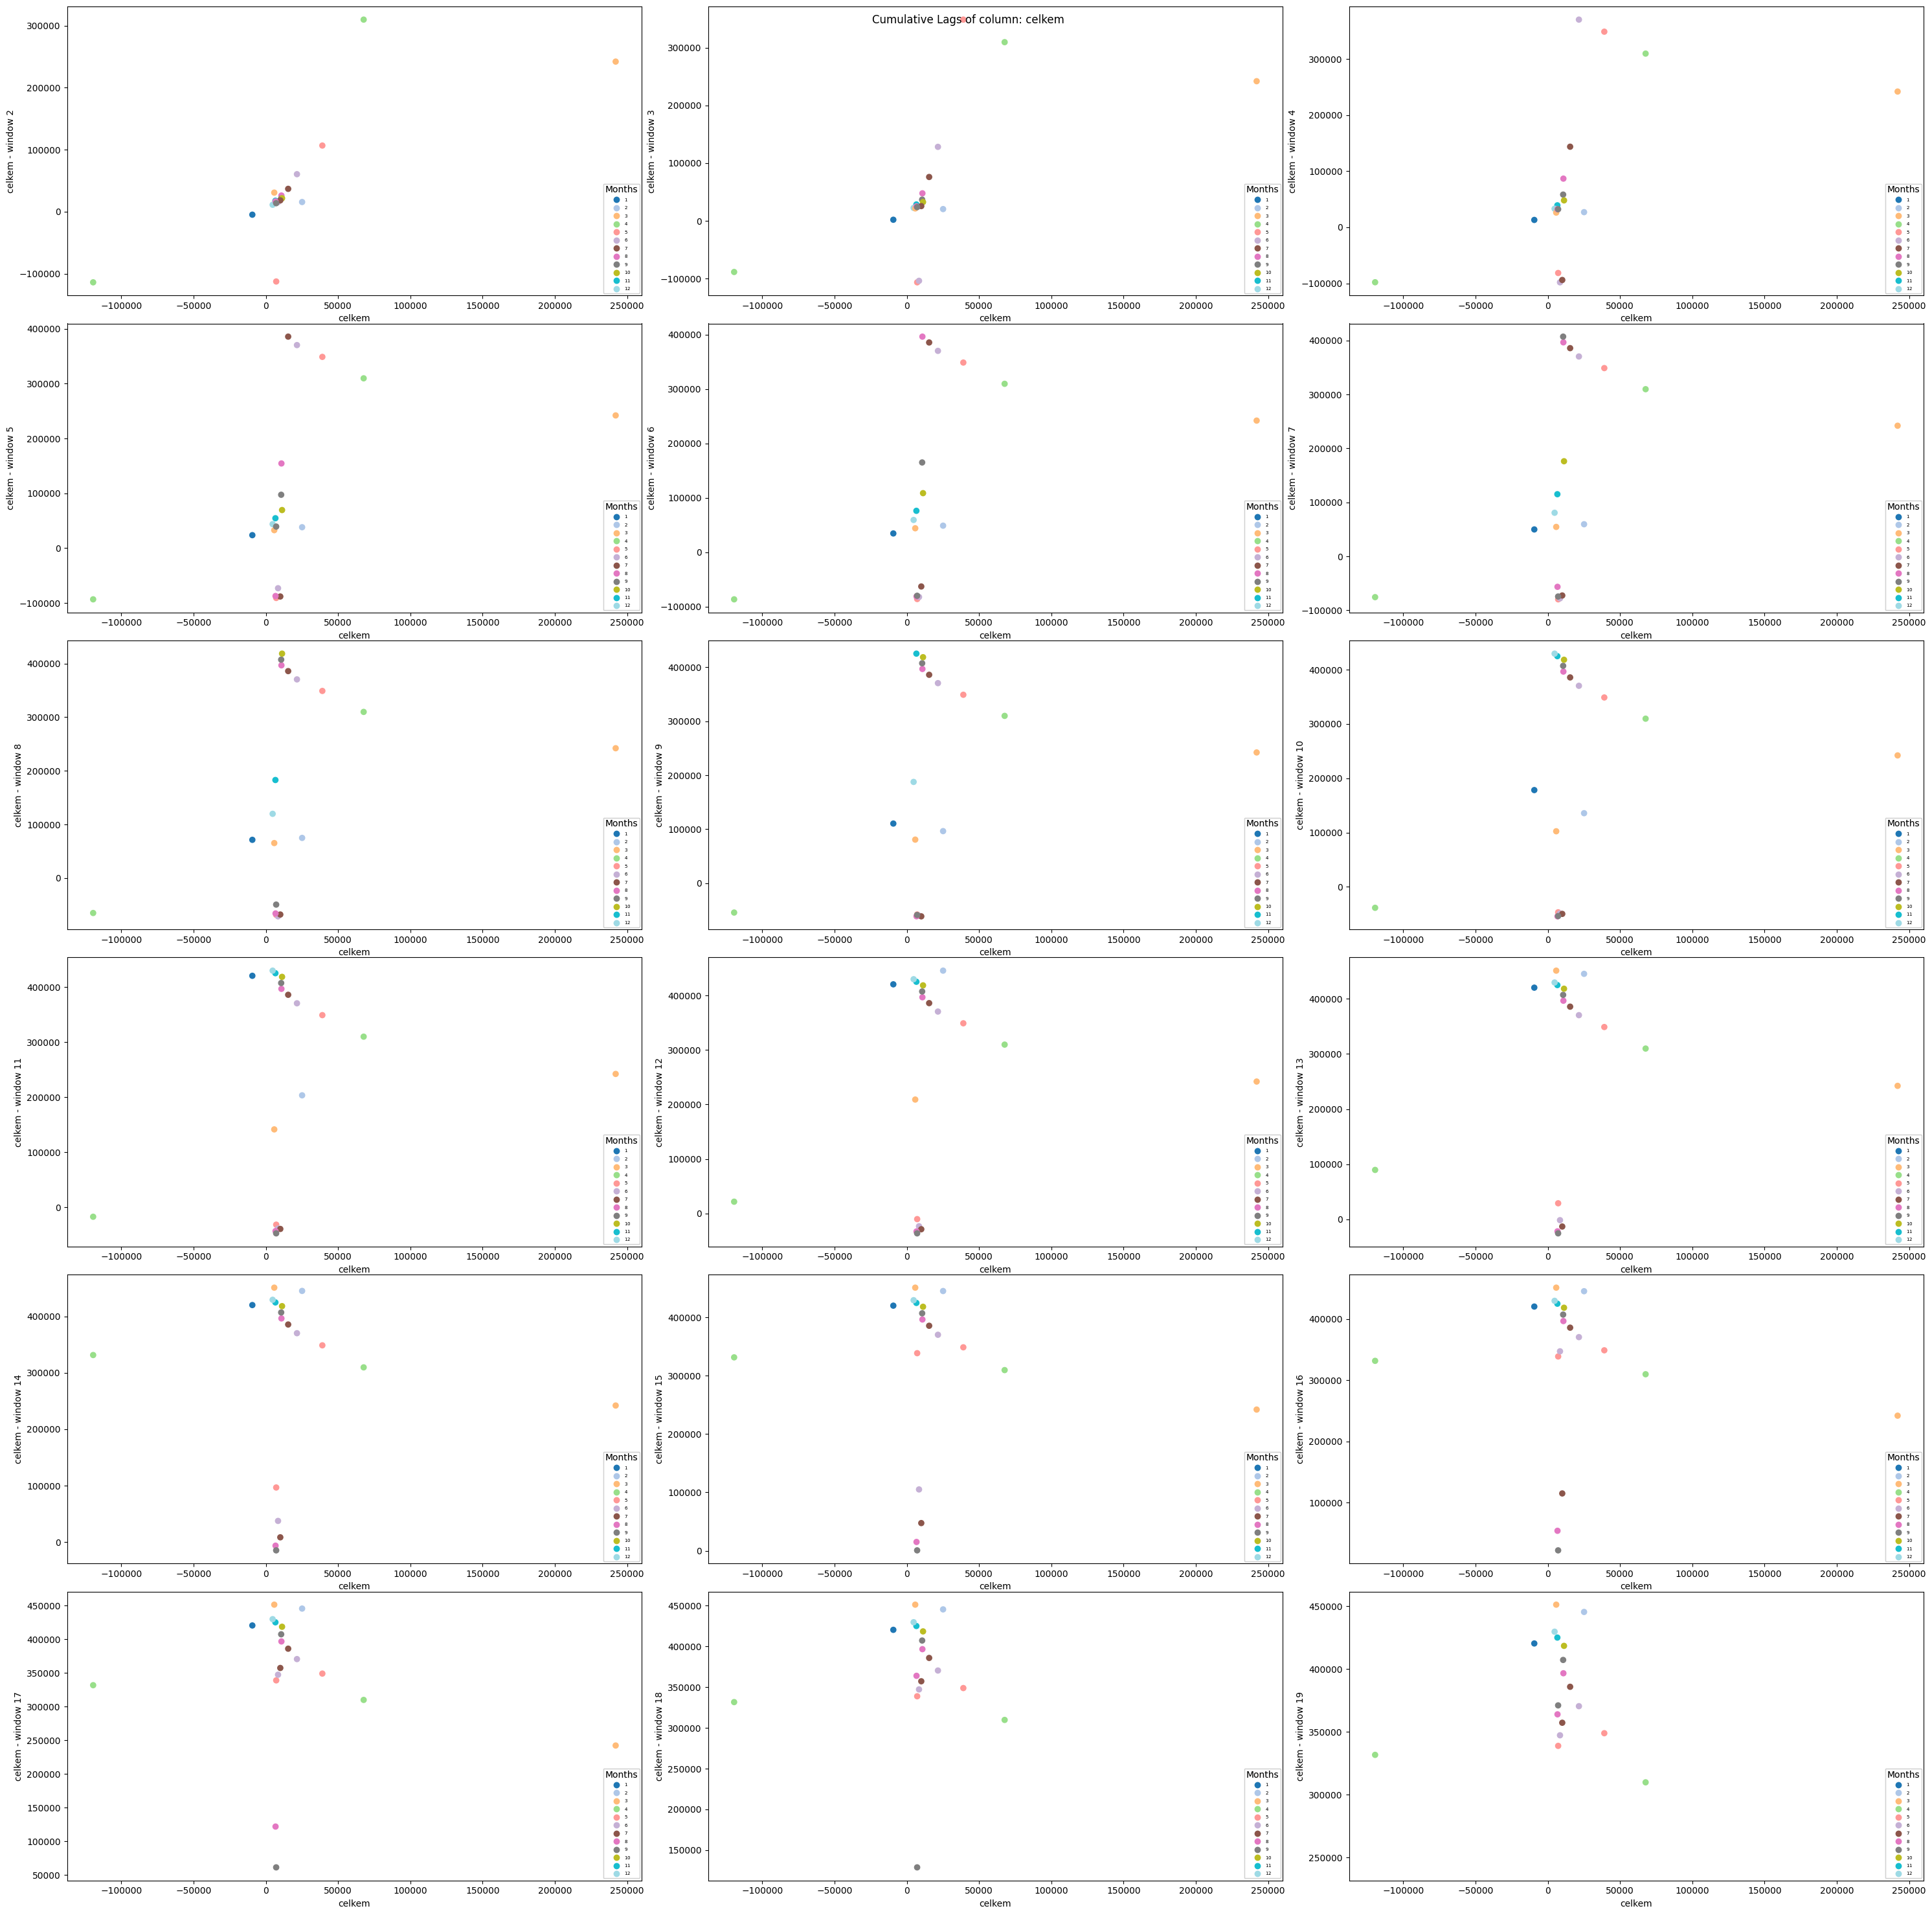

In [164]:
def plot_cumulative_lags(column: str, df: pd.DataFrame, n_cols: int = 3, cmap="tab20", color_col: str = "month"):
    fig, axs = plt.subplots(6, n_cols, figsize=(30, 30))

    for window in range(2, 20, 1):
        xpos = (window-2)//n_cols
        ypos = (window-2) % n_cols
        scatter = axs[xpos, ypos].scatter(df[column],
                                          df[f"{column}_w{window}"], c=df[color_col], cmap=cmap)
        legend1 = axs[xpos, ypos].legend(*scatter.legend_elements(),
                                         loc="lower right", title="Months", fontsize="5")
        axs[xpos, ypos].add_artist(legend1)
        axs[xpos, ypos].set_xlabel(f"{column}")
        axs[xpos, ypos].set_ylabel(f"{column} - window {window}")

    fig.suptitle(f"Cumulative Lags of column: {column}")
    fig.tight_layout(w_pad=0, h_pad=0)

    return fig


fig = plot_cumulative_lags("celkem", df_refugees)

- strong positive correlation - with window 2, 3 and lowering
- weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

<Figure size 100000x12000 with 0 Axes>

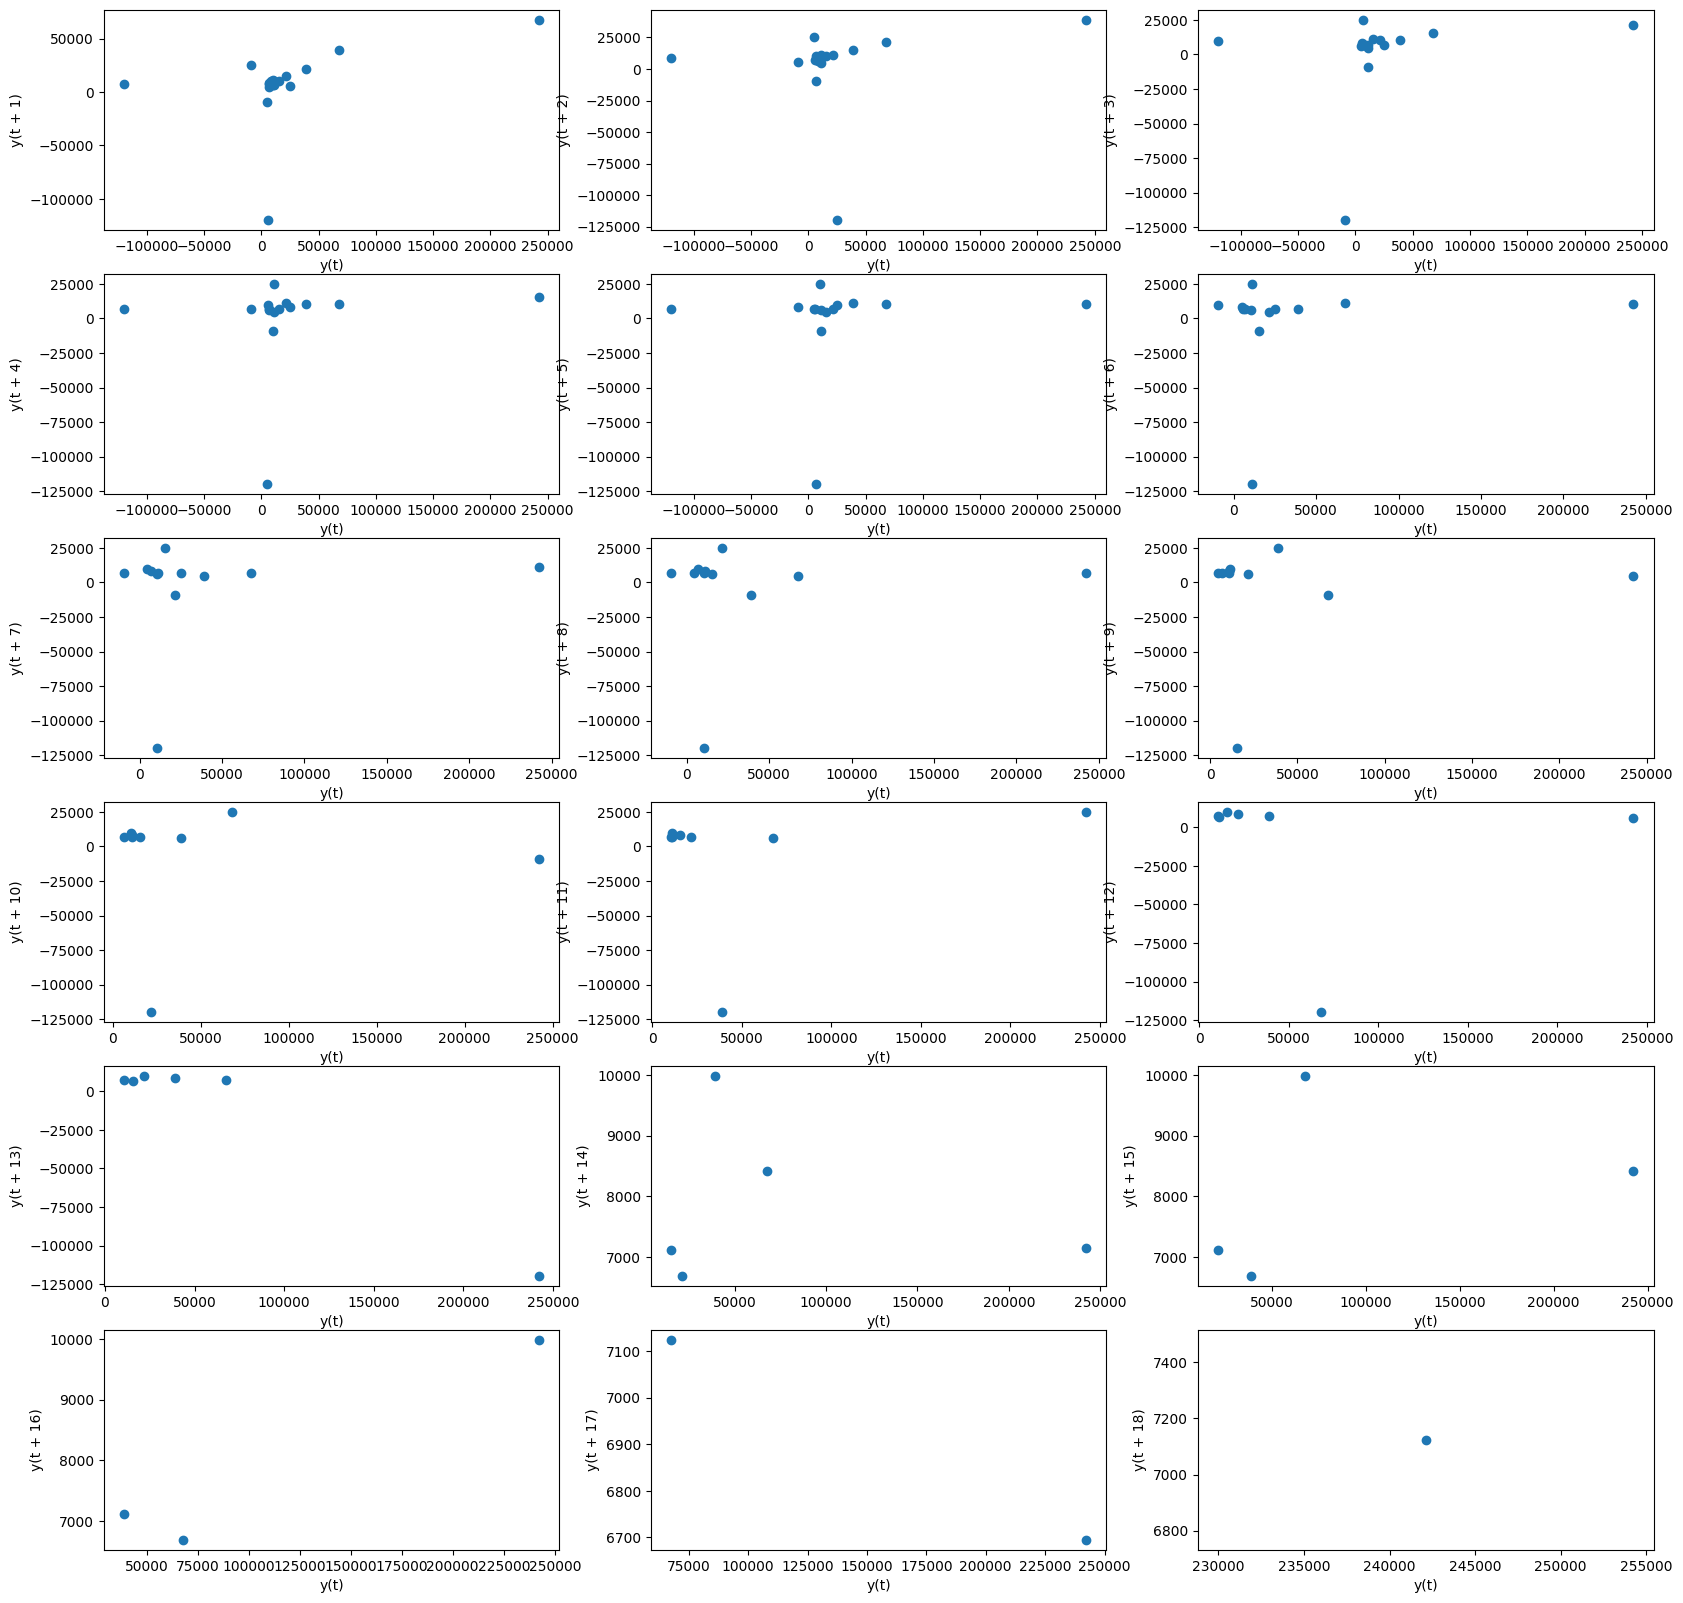

In [291]:
def plot_pd_lag_plots(df, column, max_lag:int = 19, n_cols:int = 3, lag_step:int = 1):
    plt.figure(figsize=(1000,120), layout="tight")
    fig, axs = plt.subplots(int((max_lag/lag_step)/n_cols),n_cols, figsize=(20,20))

    idx_col = 0
    idx_row = -1
    for lag in range(1, max_lag, lag_step):
        if(idx_col % n_cols == 0):
            idx_col = 0
            idx_row += 1

        pd.plotting.lag_plot(df[column], lag=lag, ax=axs[idx_row,idx_col])
        idx_col += 1

        

    plt.show()

plot_pd_lag_plots(df_refugees, "celkem")

- another kind of plot (not cumulative) - better for seasonality, however, no strong seasonality is present(as expected)

## Plots of lags of m_do_65

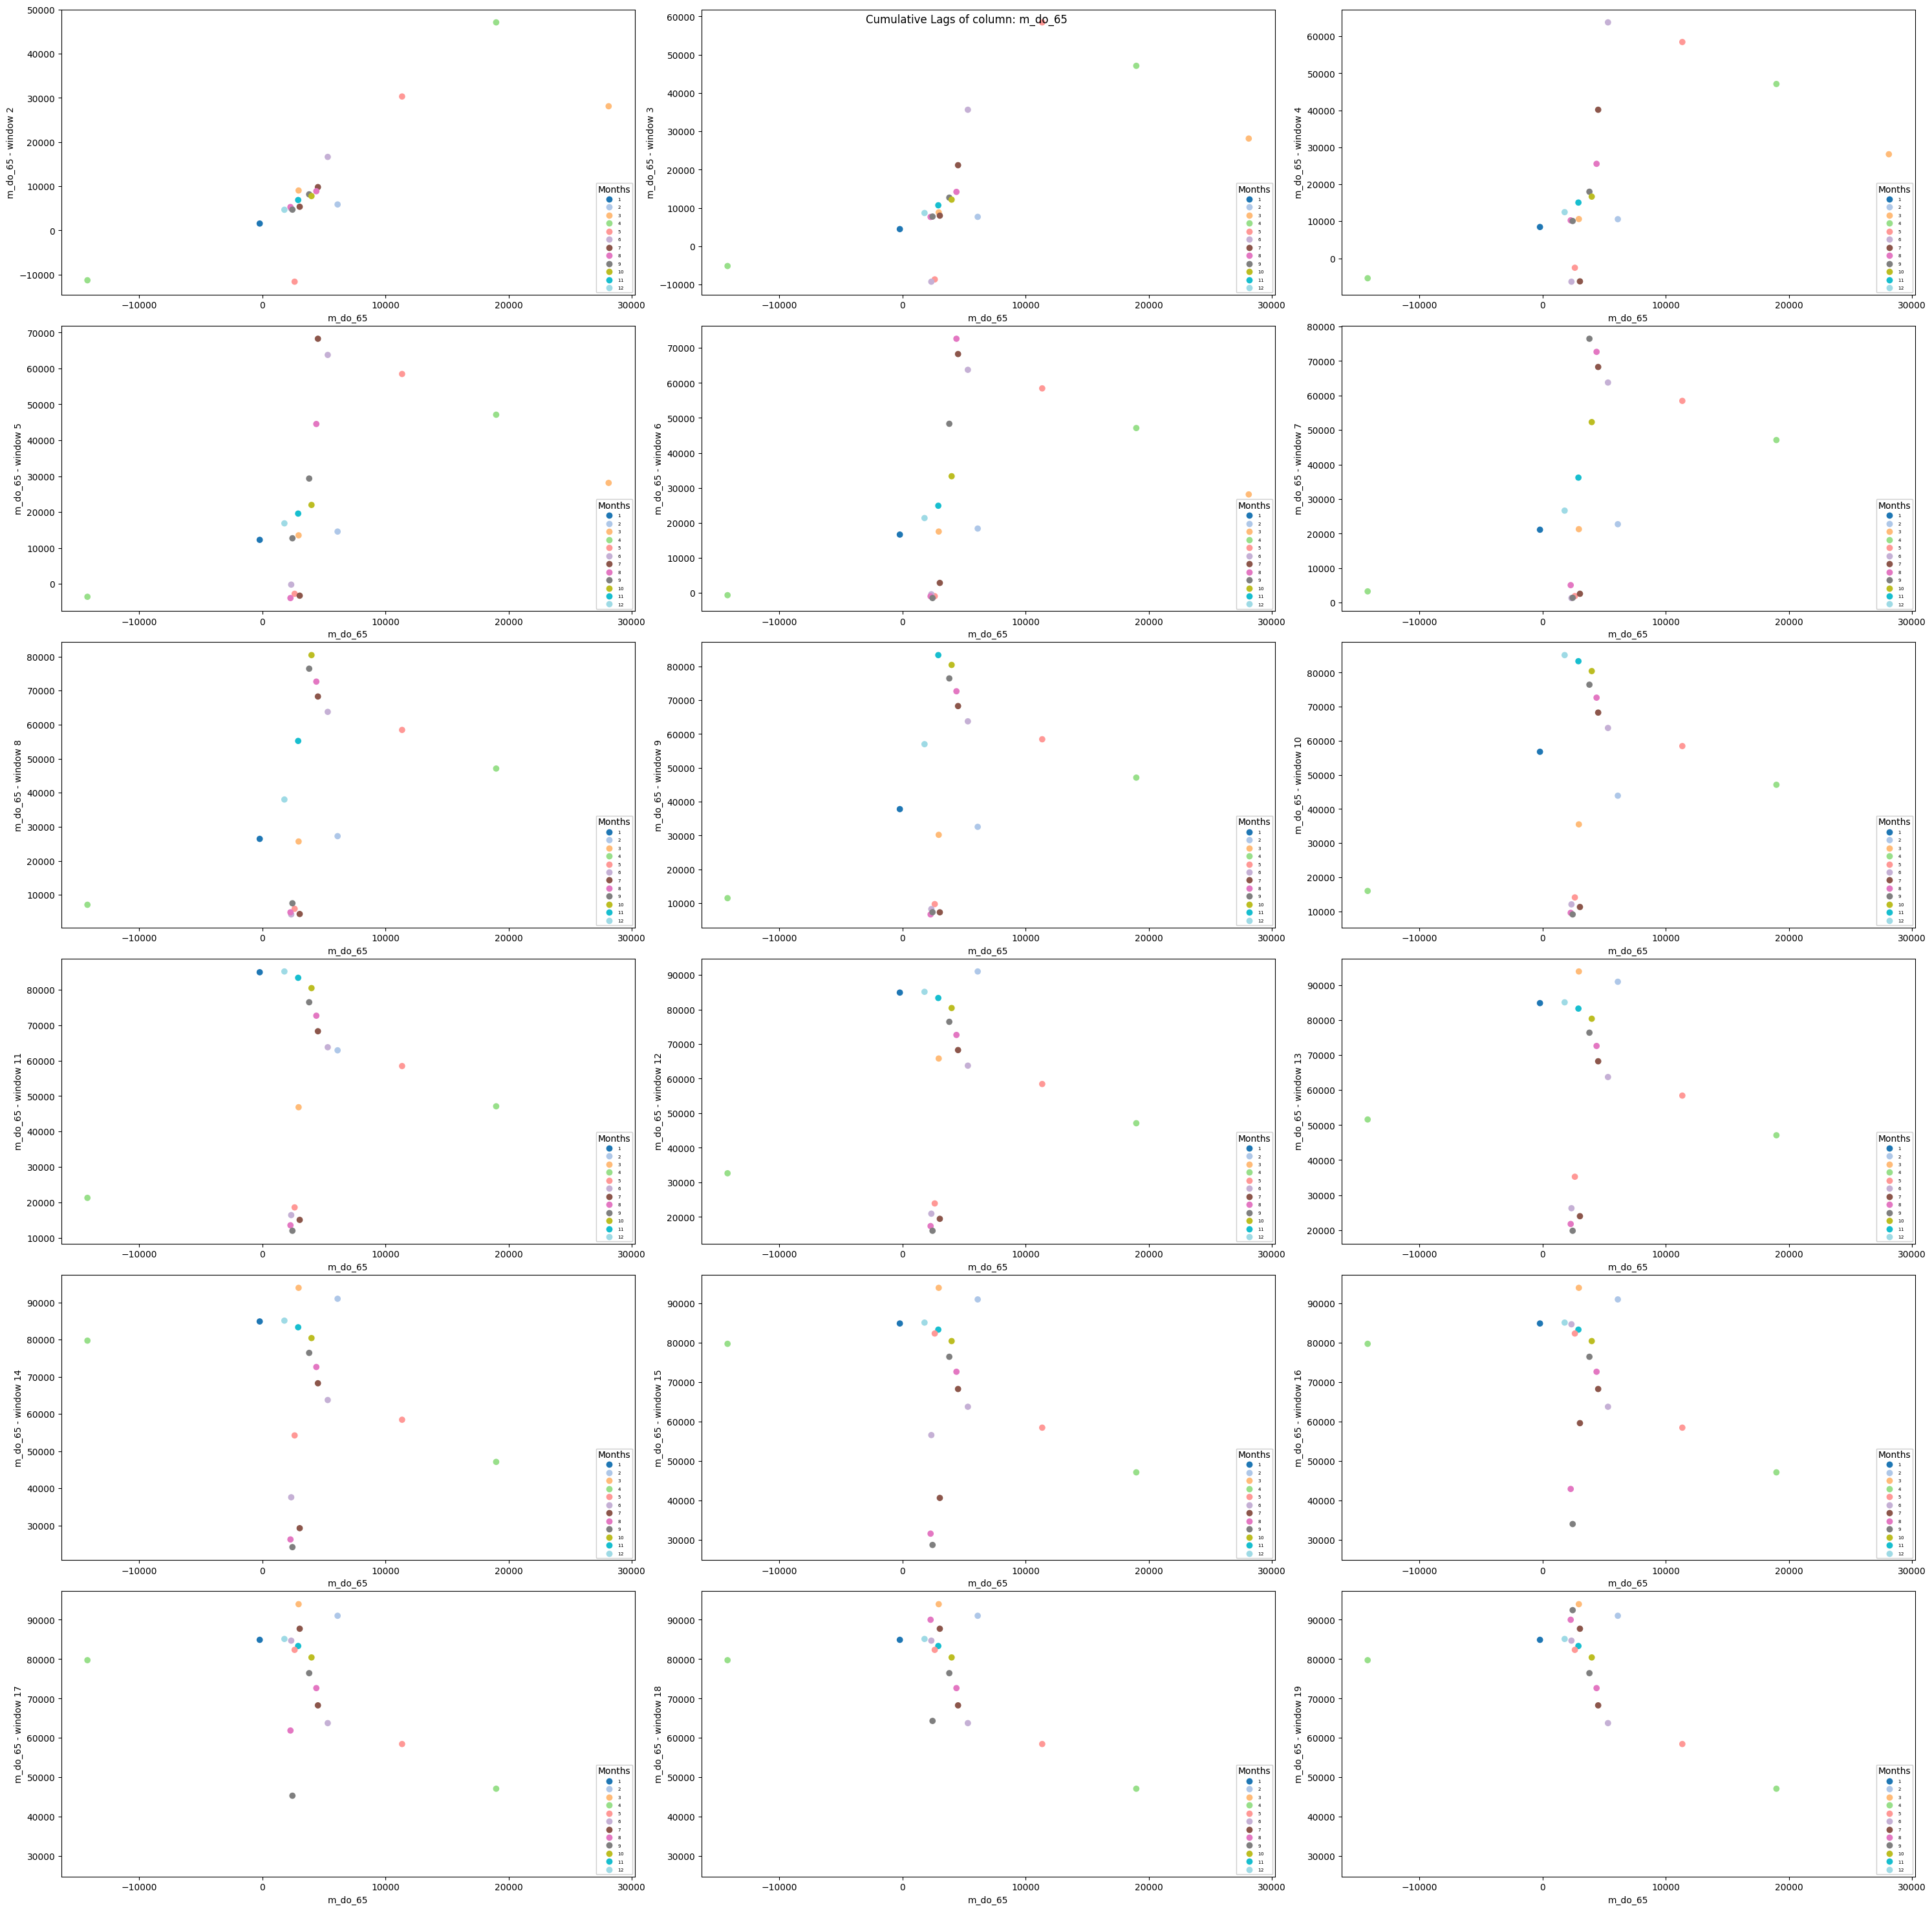

In [165]:
fig = plot_cumulative_lags("m_do_65", df_refugees)

- stronger positive correlation (than in celkem) - with window 2, 3 and lowering
- strong weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

<Figure size 6000x6000 with 0 Axes>

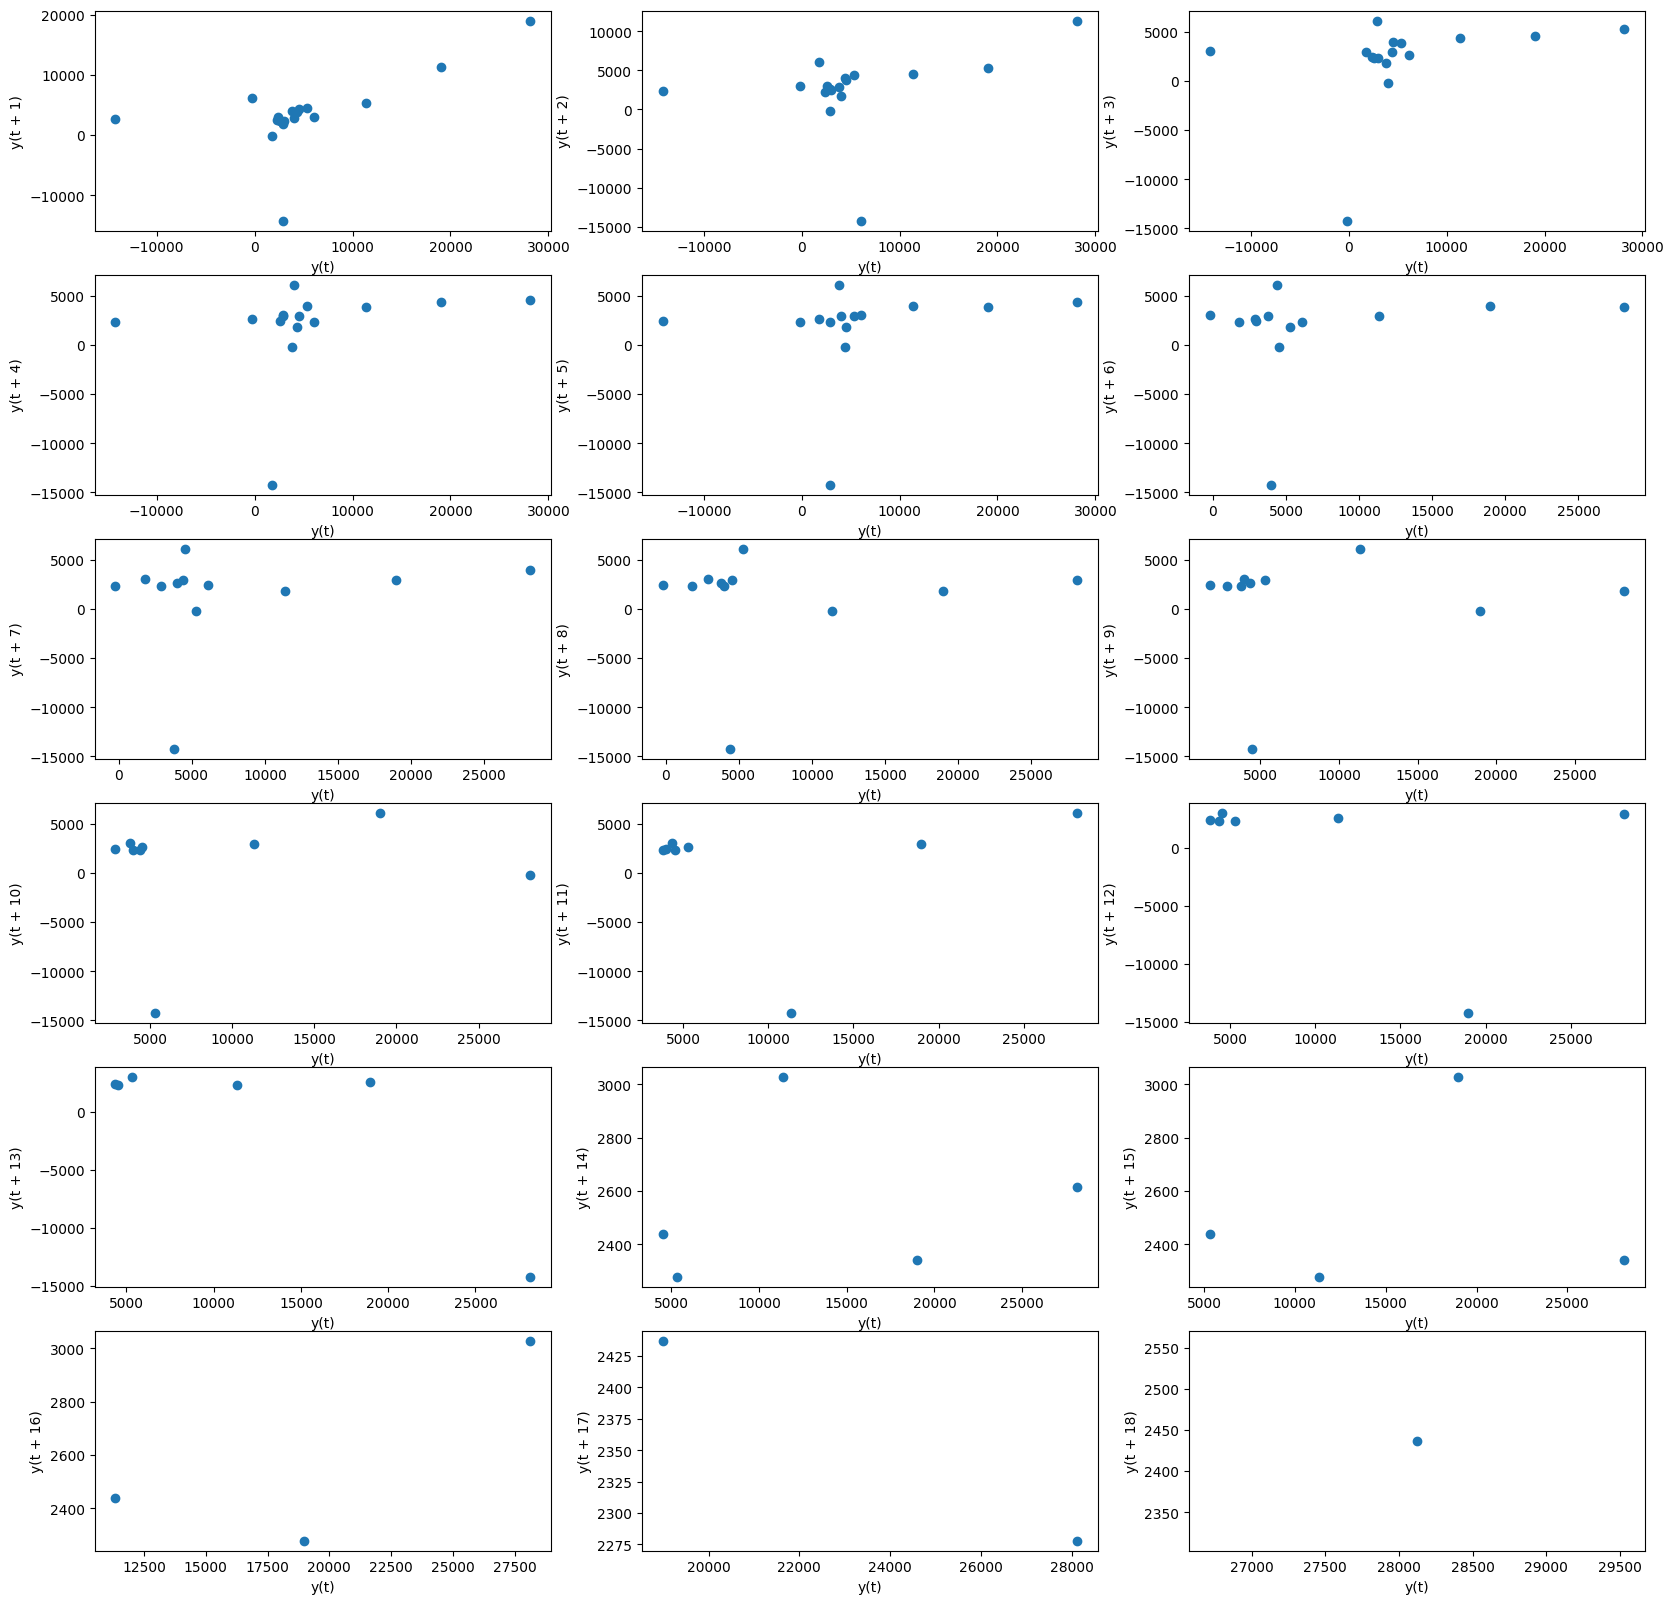

In [166]:
plot_pd_lag_plots(df_refugees, "m_do_65")

- no strong seasonality

### Plots of lags of z_do_65

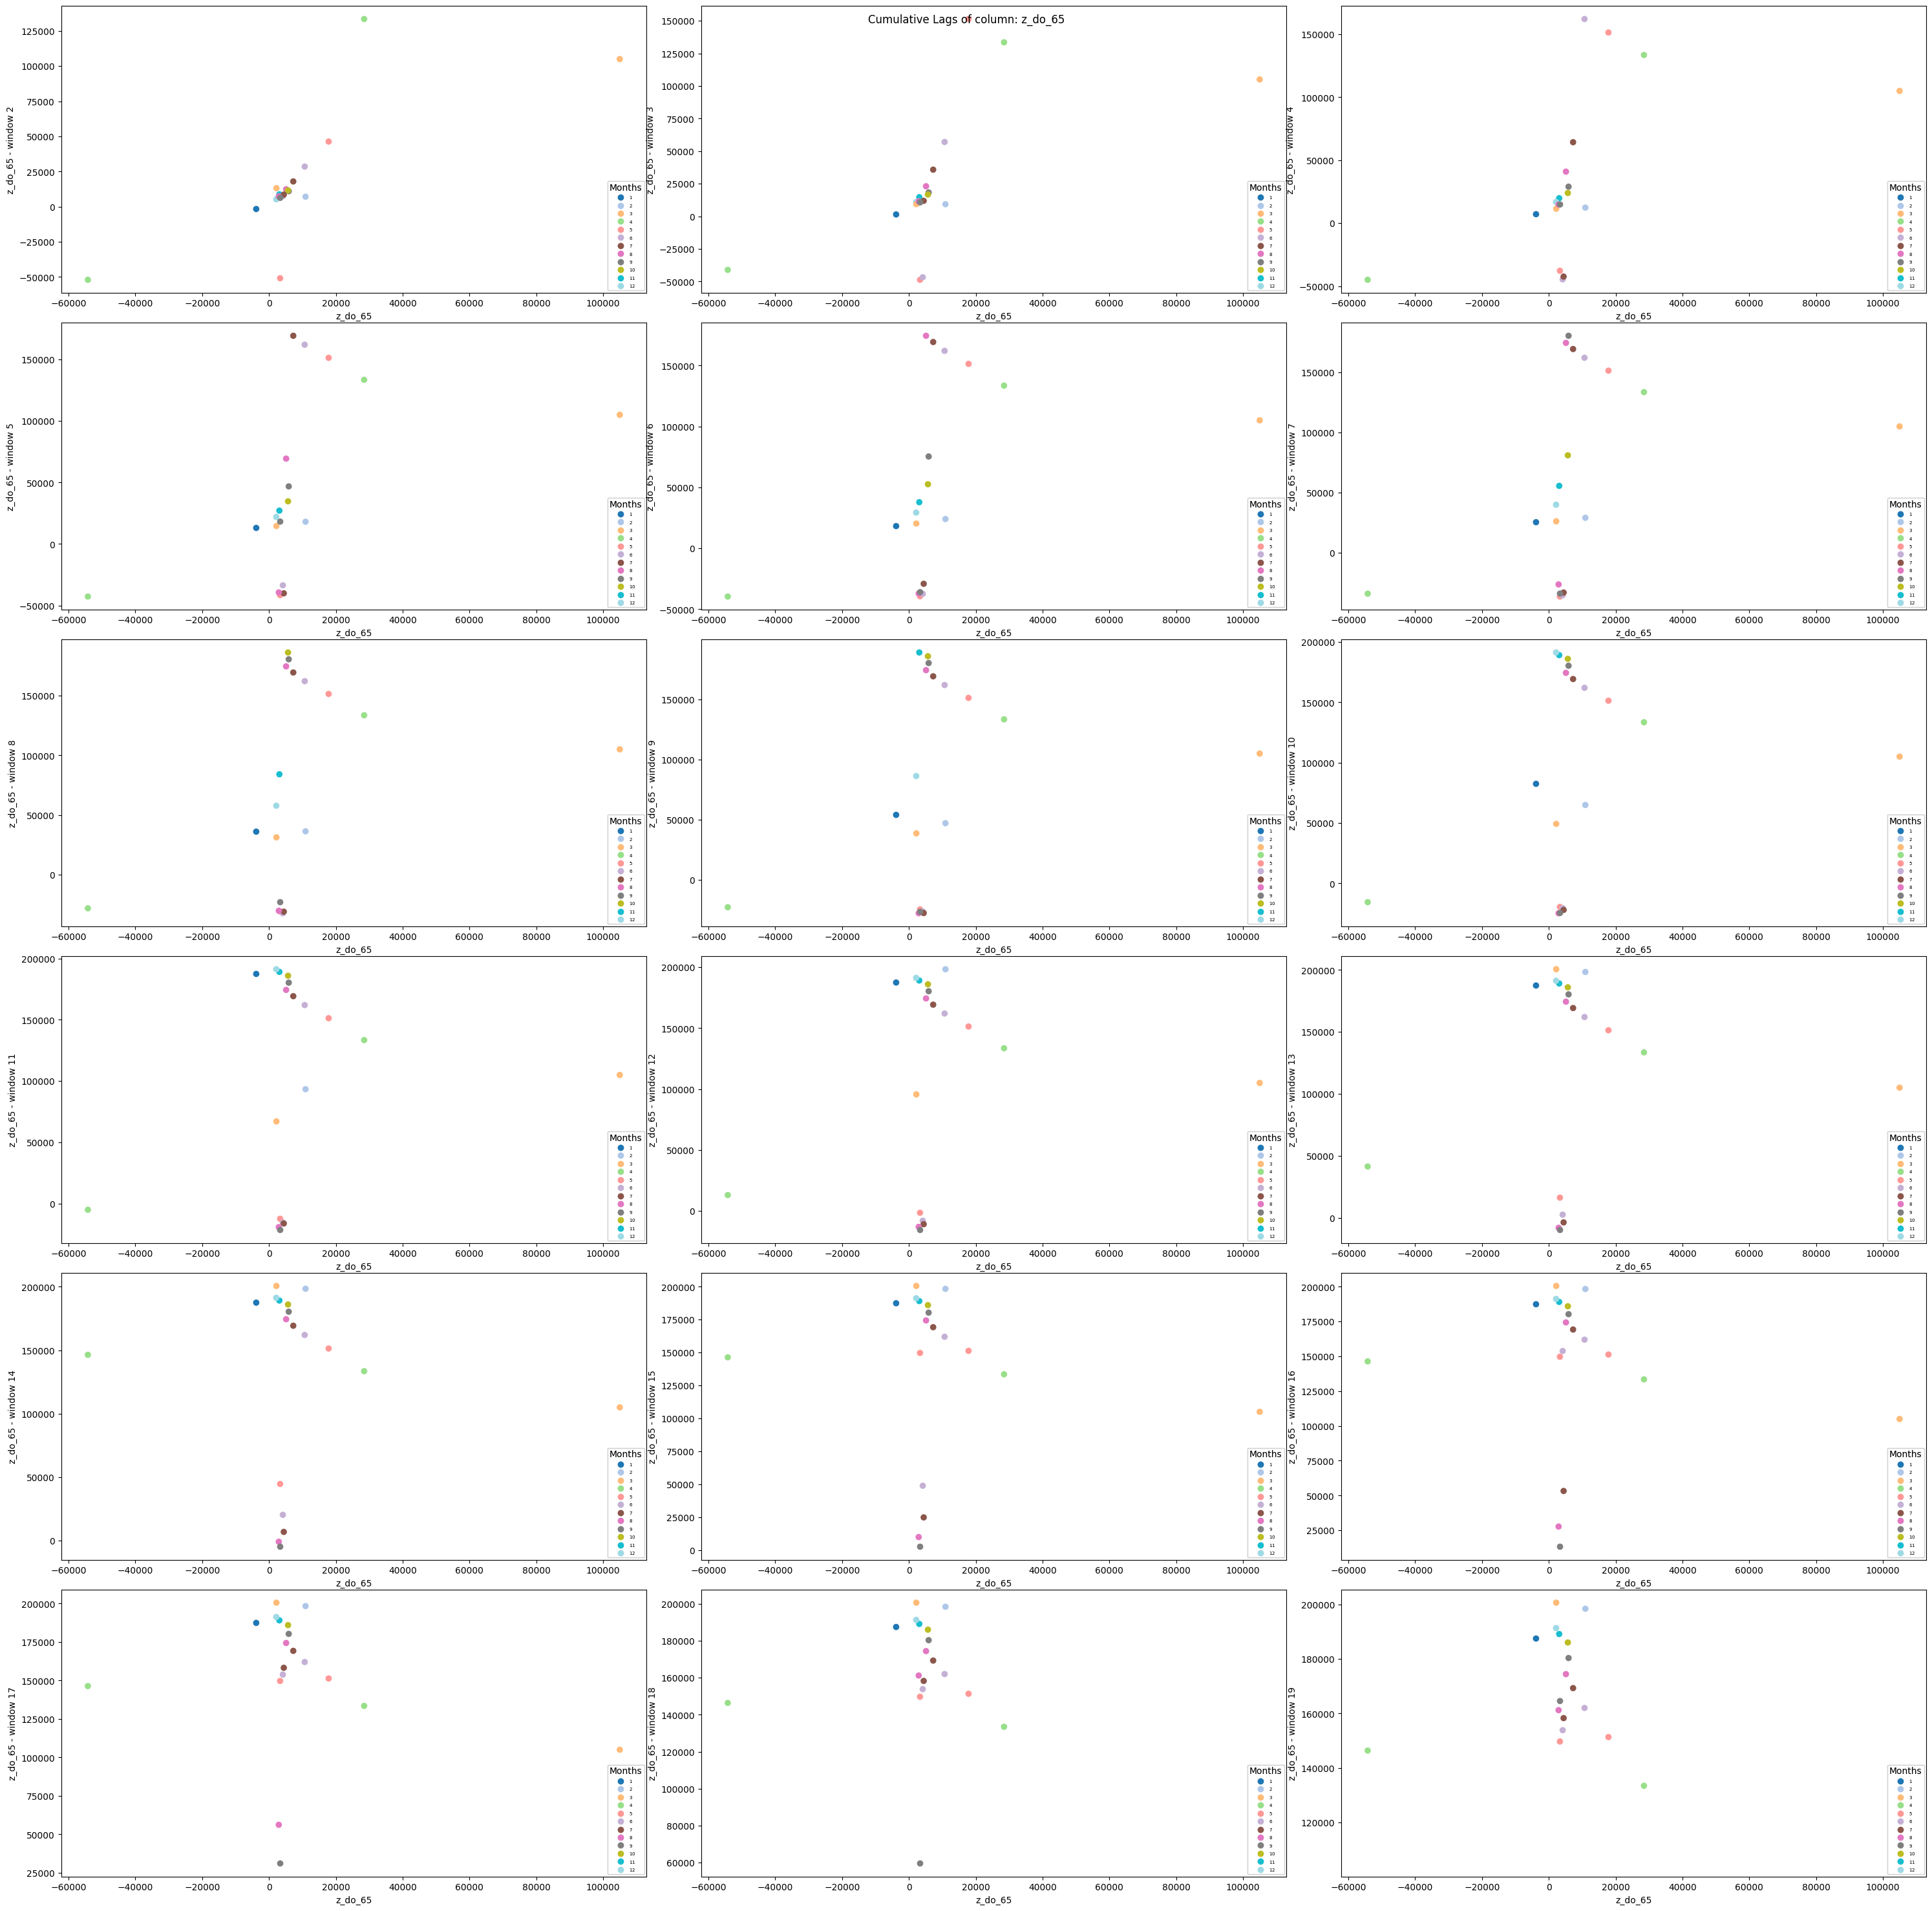

In [169]:
fig = plot_cumulative_lags("z_do_65", df_refugees)

- approx same positive correlation as celkem - with window 2, 3 and lowering -> theory majority are women
- approx same weak negarive correleation in month 19 -> good predictor?
- other ones seem random -> possibly uncorrelated predictors
- very strong outlier in april (we do not know why)
- very strong outlier in march -> the start of war (and the arrival of refugees)
- also outlier in the other april (in the first plots) (caused by march in the window)
- no seasonality occurs

<Figure size 6000x6000 with 0 Axes>

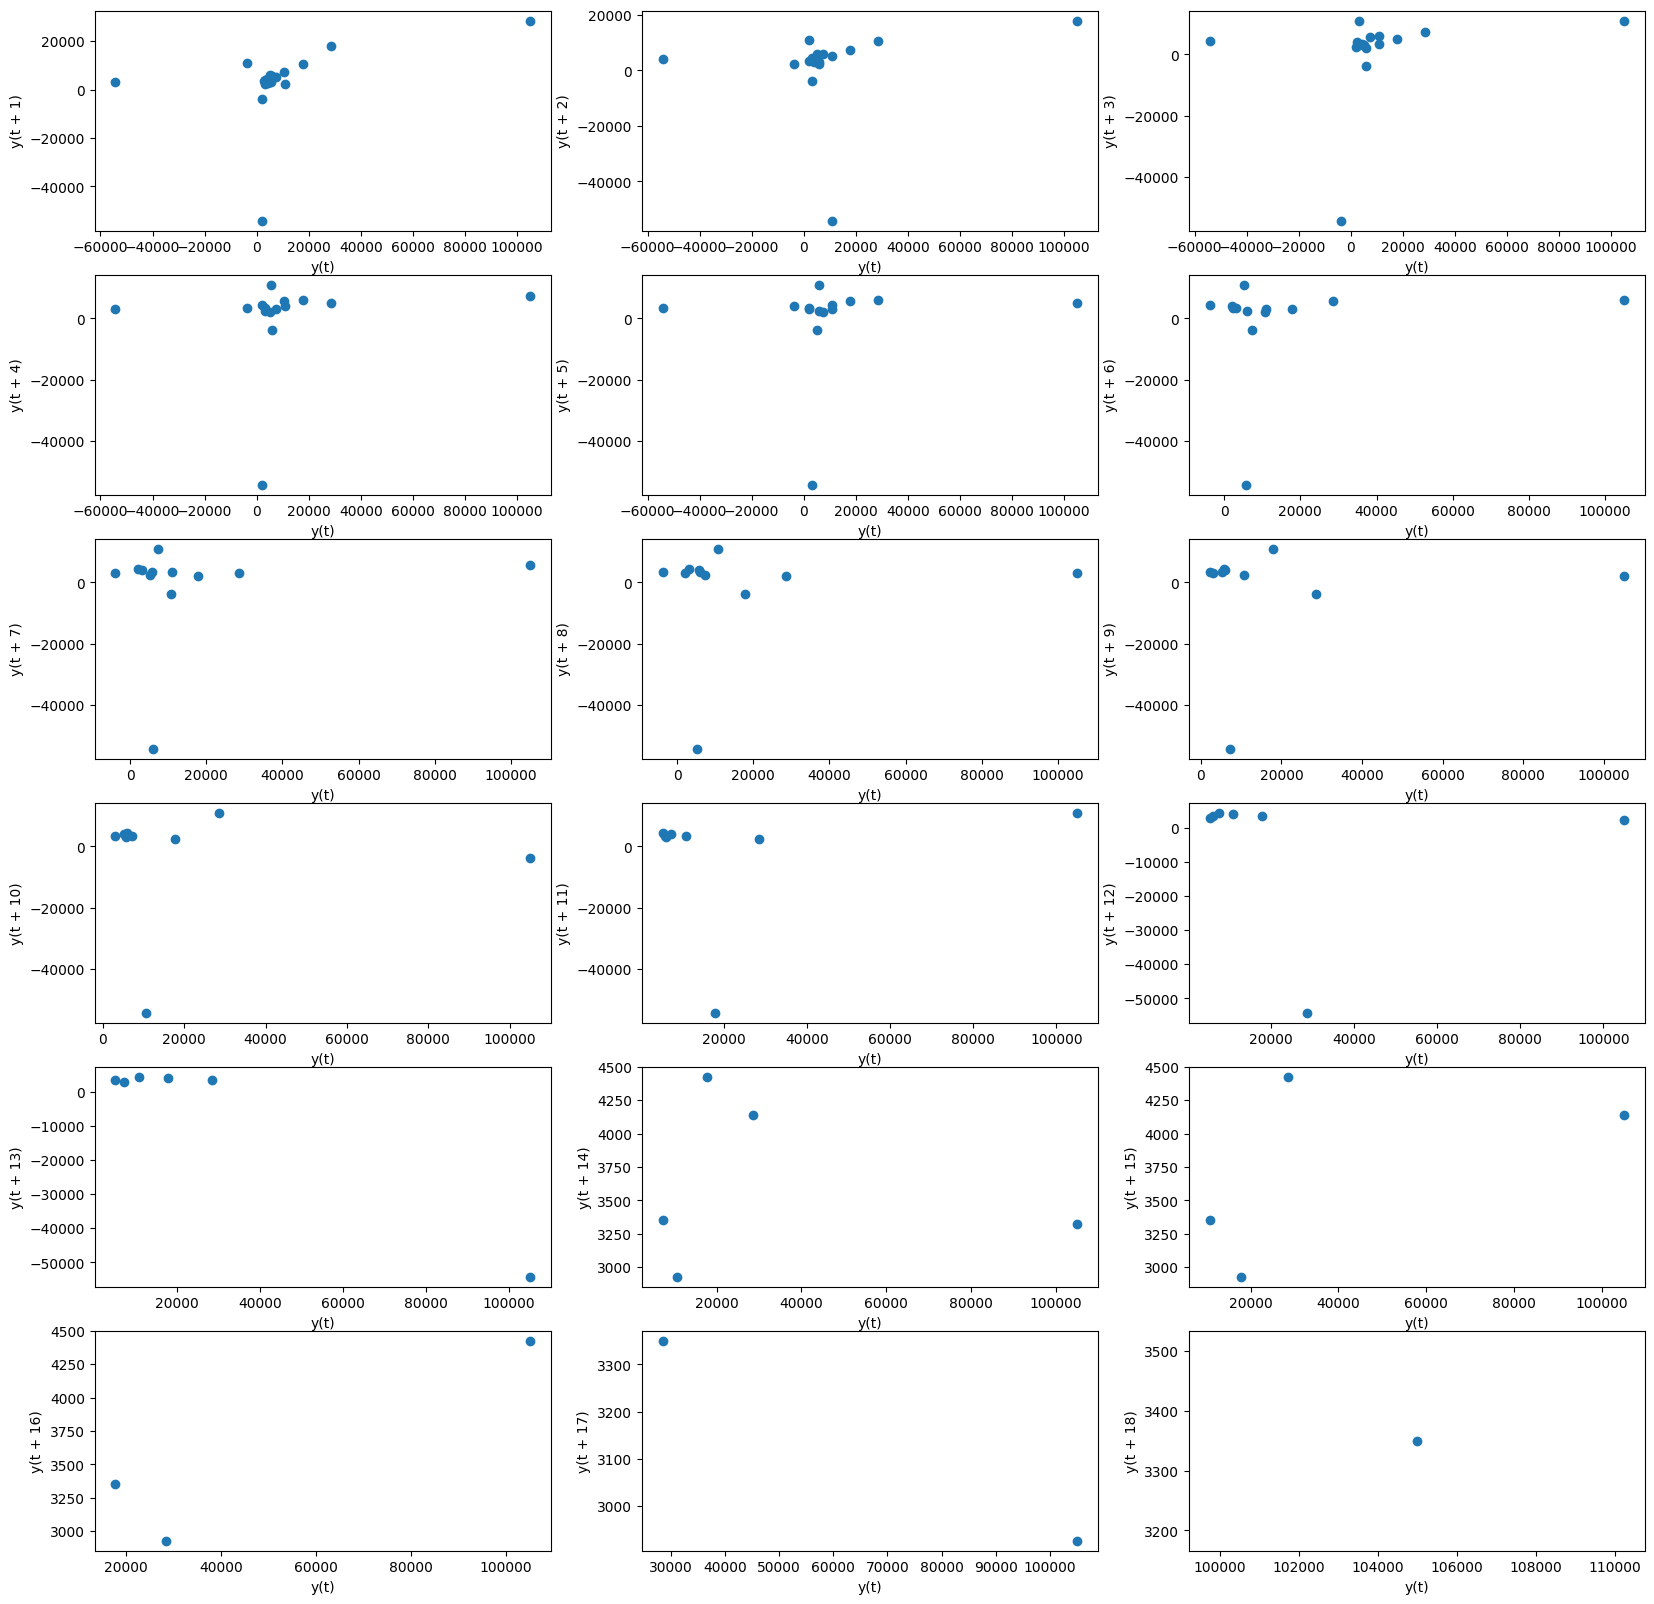

In [170]:
plot_pd_lag_plots(df_refugees, "z_do_65")

- no strong seasonality

### Plots of lags of m_do_65/celkem

In [233]:
def add_ratios(df, dividend_col, divisor_col) -> pd.DataFrame:
    res_df = df.copy()
    res_df[f"{dividend_col}_ratio"] = res_df[dividend_col] / \
        res_df[divisor_col]
    for window in range(2, 20, 1):
        res_df[f"{dividend_col}_ratio_w{window}"] = abs(res_df[f"{dividend_col}_w{window}"].to_numpy() / res_df[f"{divisor_col}_w{window}"].to_numpy())
    return res_df

In [228]:
df_refugees_ratio = add_ratios(df_refugees, "m_do_65", "celkem")
display(df_refugees_ratio.head())

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   

            m_do_65_ratio_w10  m_do_65_ratio_w11  m_do_65_ratio_w12  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w13  m_do_65_ratio_w14  m_do_65_ratio_w15  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w16  m_do_65_ratio_w17  m_do_65_ratio_w18  \
date                                                                  
2022-03-01           0.116152           0.116152           0.116152   
2022-04-01           0.152064           0.152064           0.152064   
2022-05-01           0.167543           0.167543           0.167543   
2022-06-01           0.172138           0.172138           0.172138   
2022-07-01           0.176939           0.176939           0.176939   

            m_do_65_ratio_w19  
date                           
2022-03-01           0.116152  
2022-04-01           0.152064  
2022-05-01           0.167543  
2022-06-01           0.172138  
2022-07-01           0.176939  

[5 rows x 93 columns]

In [222]:
df_refugees["m_do_65"]

date
2022-03-01    28121.0
2022-04-01    18986.0
2022-05-01    11344.0
2022-06-01     5307.0
2022-07-01     4509.0
2022-08-01     4378.0
2022-09-01     3798.0
2022-10-01     3988.0
2022-11-01     2904.0
2022-12-01     1786.0
2023-01-01     -219.0
2023-02-01     6107.0
2023-03-01     2940.0
2023-04-01   -14212.0
2023-05-01     2616.0
2023-06-01     2339.0
2023-07-01     3028.0
2023-08-01     2278.0
2023-09-01     2437.0
Name: m_do_65, dtype: float64

In [221]:
df_refugees["celkem"]

date
2022-03-01    242105.0
2022-04-01     67679.0
2022-05-01     39087.0
2022-06-01     21517.0
2022-07-01     15435.0
2022-08-01     10766.0
2022-09-01     10594.0
2022-10-01     11204.0
2022-11-01      6598.0
2022-12-01      4683.0
2023-01-01     -9368.0
2023-02-01     25083.0
2023-03-01      5805.0
2023-04-01   -119544.0
2023-05-01      7153.0
2023-06-01      8424.0
2023-07-01      9984.0
2023-08-01      6695.0
2023-09-01      7124.0
Name: celkem, dtype: float64

In [213]:
df_refugees_ratio["m_do_65_ratio_w3"]

date
2022-03-01    0.116152
2022-04-01    0.152064
2022-05-01    0.167543
2022-06-01    0.277800
2022-07-01    0.278278
2022-08-01    0.297456
2022-09-01    0.344748
2022-10-01    0.373541
2022-11-01    0.376461
2022-12-01    0.385946
2023-01-01    2.337167
2023-02-01    0.376213
2023-03-01    0.410223
2023-04-01    0.058259
2023-05-01    0.081211
2023-06-01    0.089038
2023-07-01    0.312312
2023-08-01    0.304545
2023-09-01    0.325295
Name: m_do_65_ratio_w3, dtype: float64

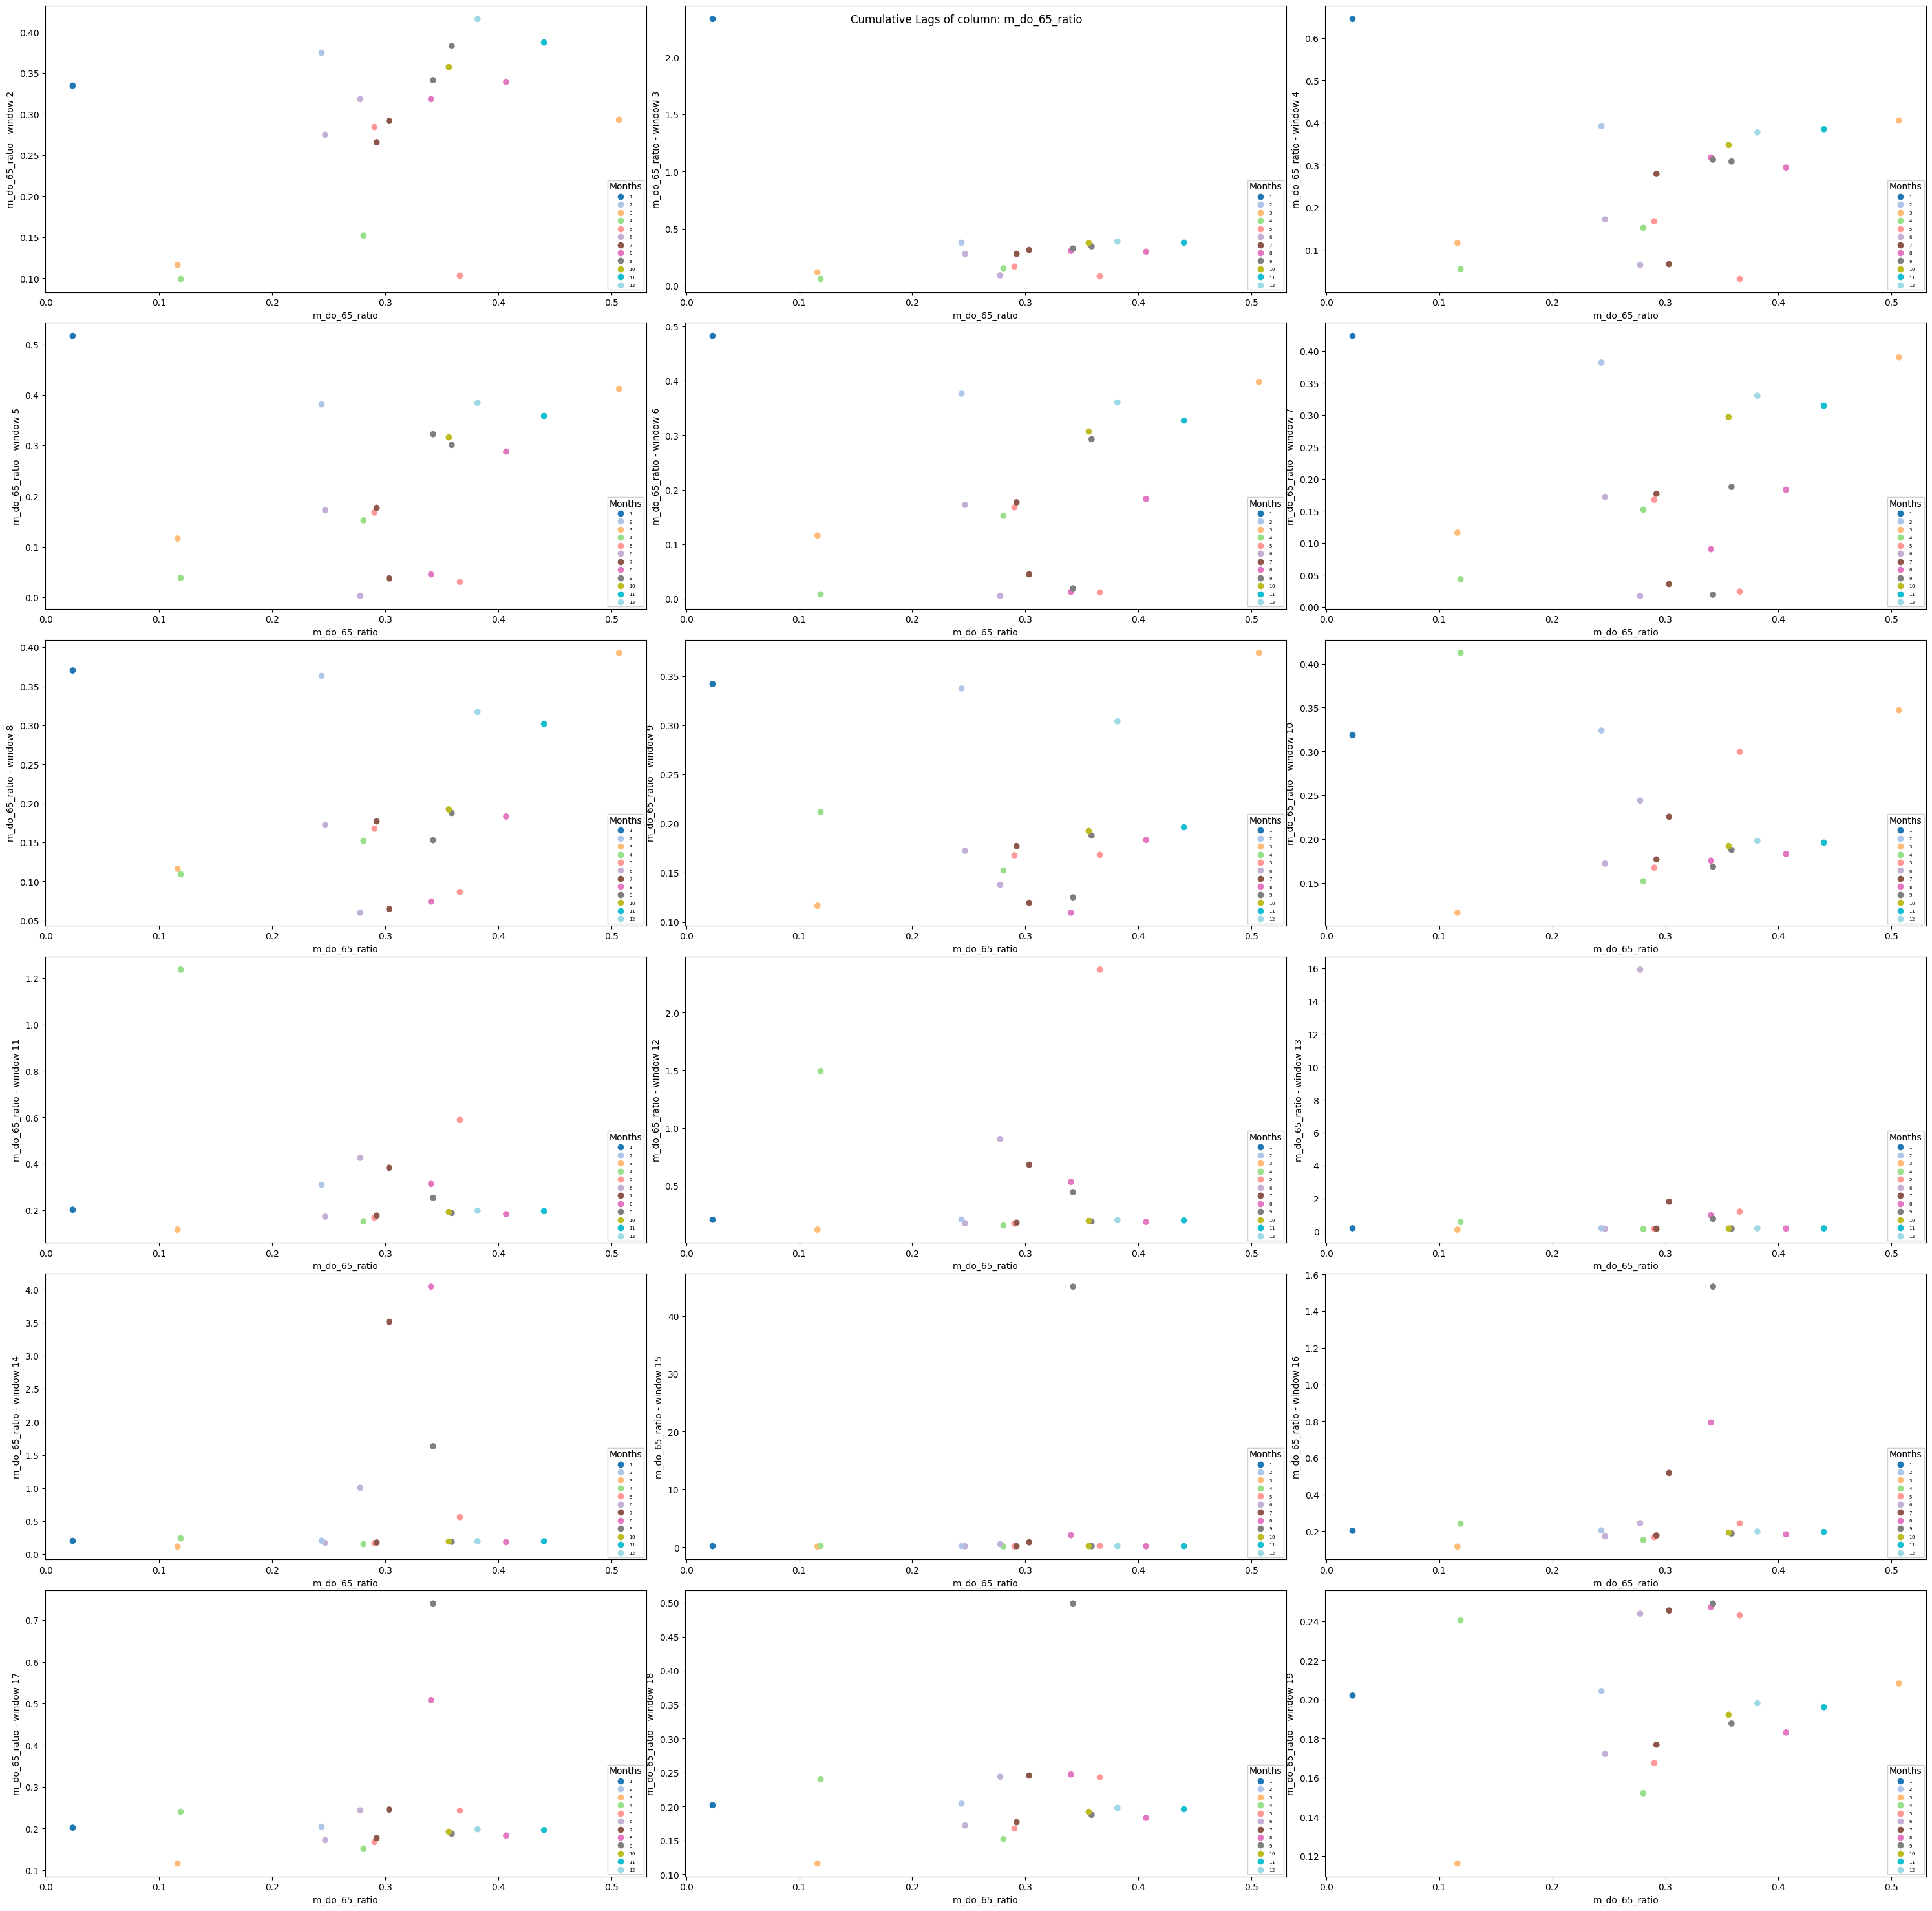

In [185]:
fig = plot_cumulative_lags("m_do_65_ratio", df_refugees_ratio)

<Figure size 6000x6000 with 0 Axes>

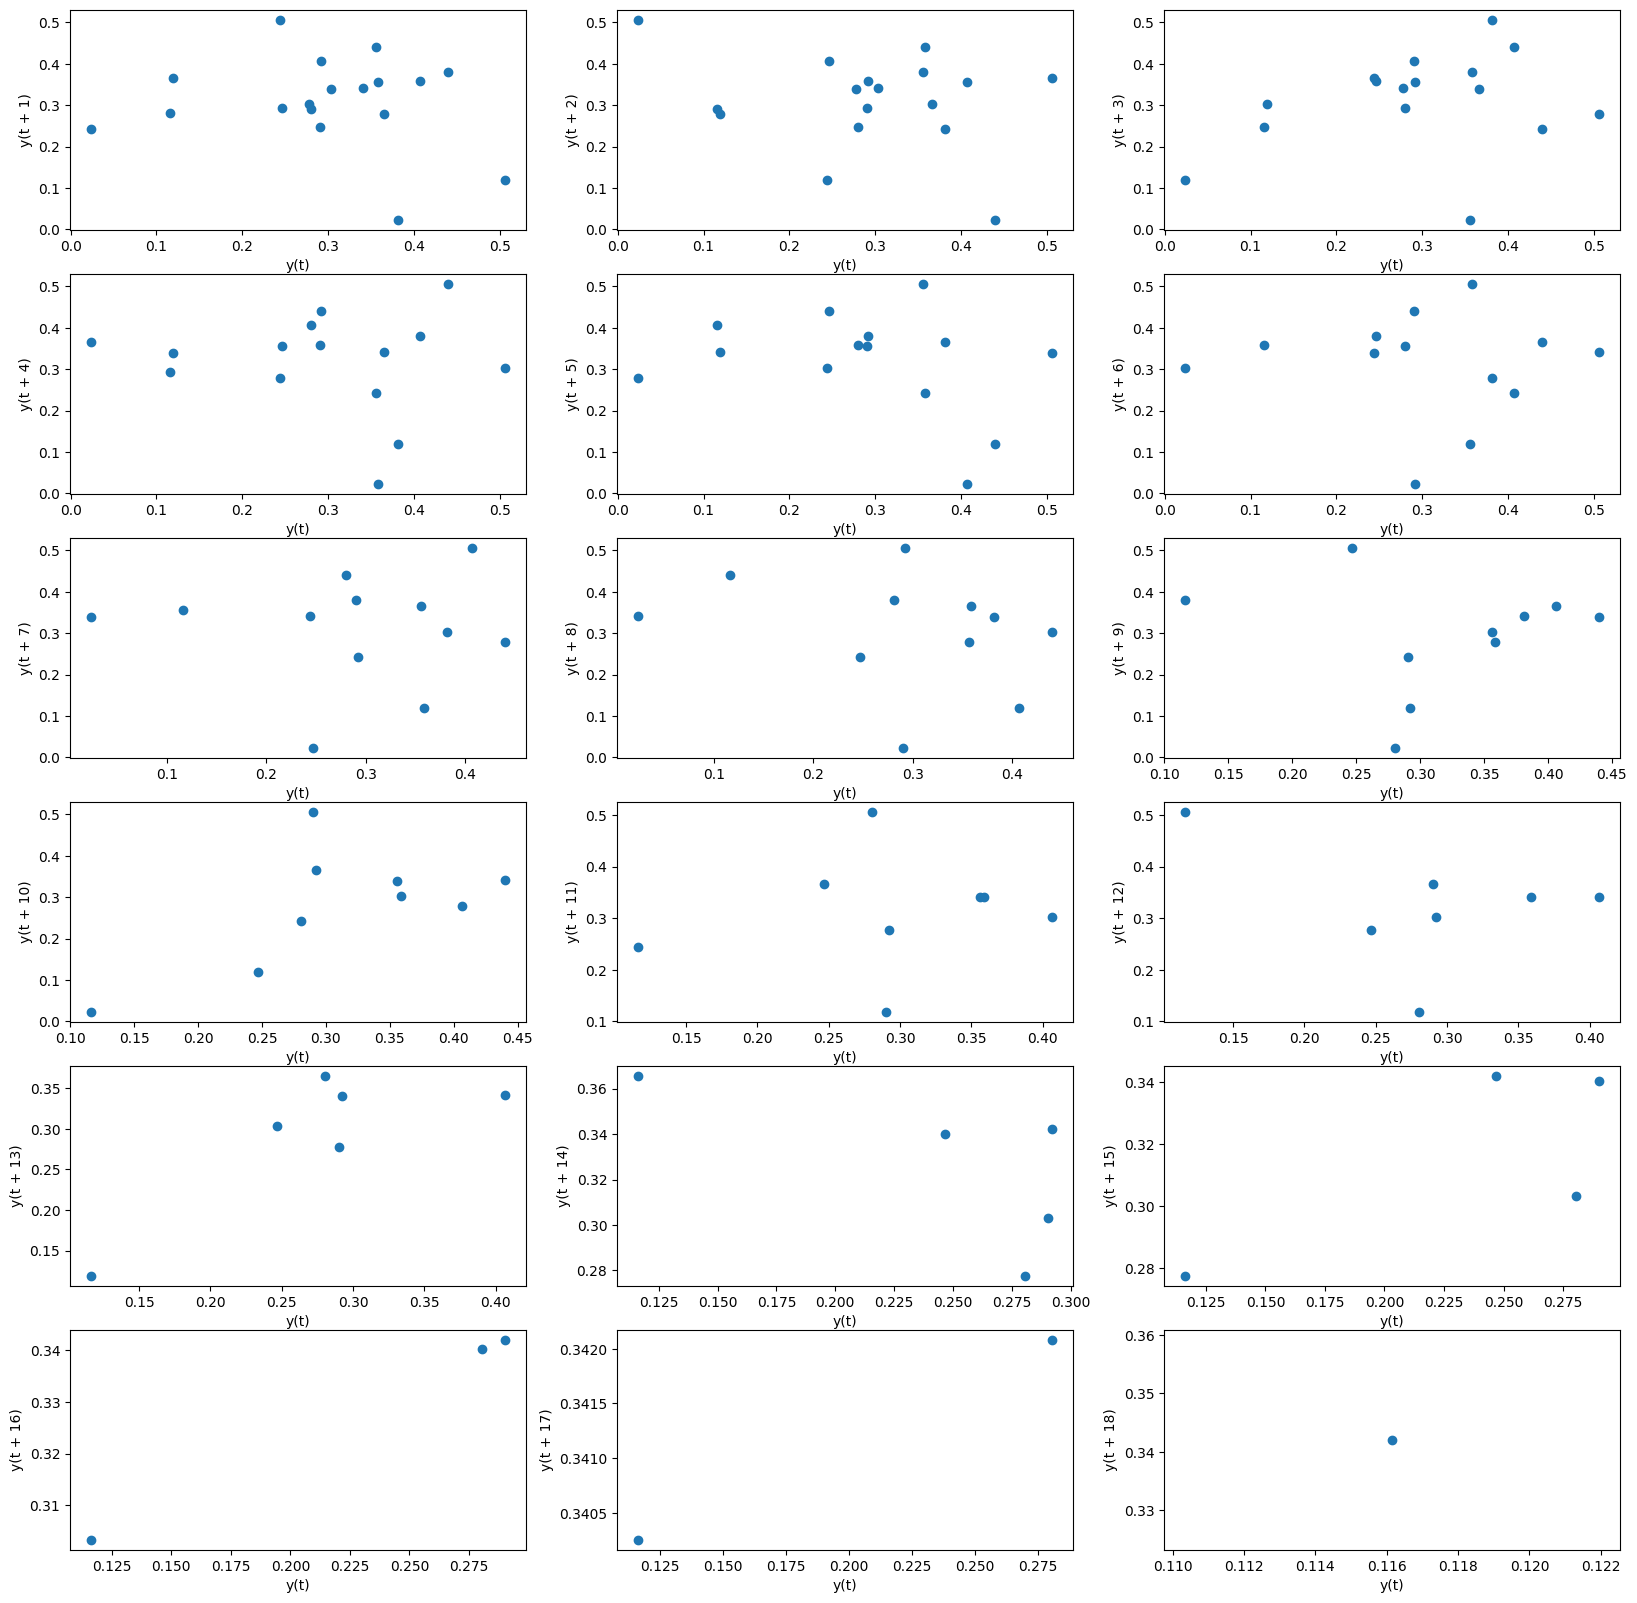

In [229]:
plot_pd_lag_plots(df_refugees_ratio, "m_do_65_ratio")

### Plots of lags of z_do_65/celkem

In [234]:
df_refugees_ratio = add_ratios(df_refugees, "z_do_65", "celkem")
display(df_refugees_ratio.head())

month  year  avg_monthly_salary  monthly_min_wage  \
date                                                            
2022-03-01      3  2022        35604.071429           16200.0   
2022-04-01      4  2022        37914.357143           16200.0   
2022-05-01      5  2022        37914.357143           16200.0   
2022-06-01      6  2022        37914.357143           16200.0   
2022-07-01      7  2022        37790.571429           16200.0   

            monthly_inflation_rate_wrt_last_year    reer  bilance  \
date                                                                
2022-03-01                                  12.7  107.78  -12.741   
2022-04-01                                  14.2  109.83  -29.034   
2022-05-01                                  16.0  109.83  -28.389   
2022-06-01                                  17.2  109.83  -15.803   
2022-07-01                                  17.5  110.11  -22.485   

            avg_energy_price  avg_gasoline_price  avg_natural_gas_price  ...  \
date                                                                     ...   
2022-03-01            187.10              1.9464                 4.9772  ...   
2022-04-01            214.68              1.9054                 6.7753  ...   
2022-05-01            239.92              1.9182                 8.1694  ...   
2022-06-01            261.98              2.0195                 7.5709  ...   
2022-07-01            353.61              1.9516                 7.0963  ...   

            z_do_65_ratio_w10  z_do_65_ratio_w11  z_do_65_ratio_w12  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w13  z_do_65_ratio_w14  z_do_65_ratio_w15  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w16  z_do_65_ratio_w17  z_do_65_ratio_w18  \
date                                                                  
2022-03-01           0.433659           0.433659           0.433659   
2022-04-01           0.430842           0.430842           0.430842   
2022-05-01           0.433733           0.433733           0.433733   
2022-06-01           0.437379           0.437379           0.437379   
2022-07-01           0.438712           0.438712           0.438712   

            z_do_65_ratio_w19  
date                           
2022-03-01           0.433659  
2022-04-01           0.430842  
2022-05-01           0.433733  
2022-06-01           0.437379  
2022-07-01           0.438712  

[5 rows x 93 columns]

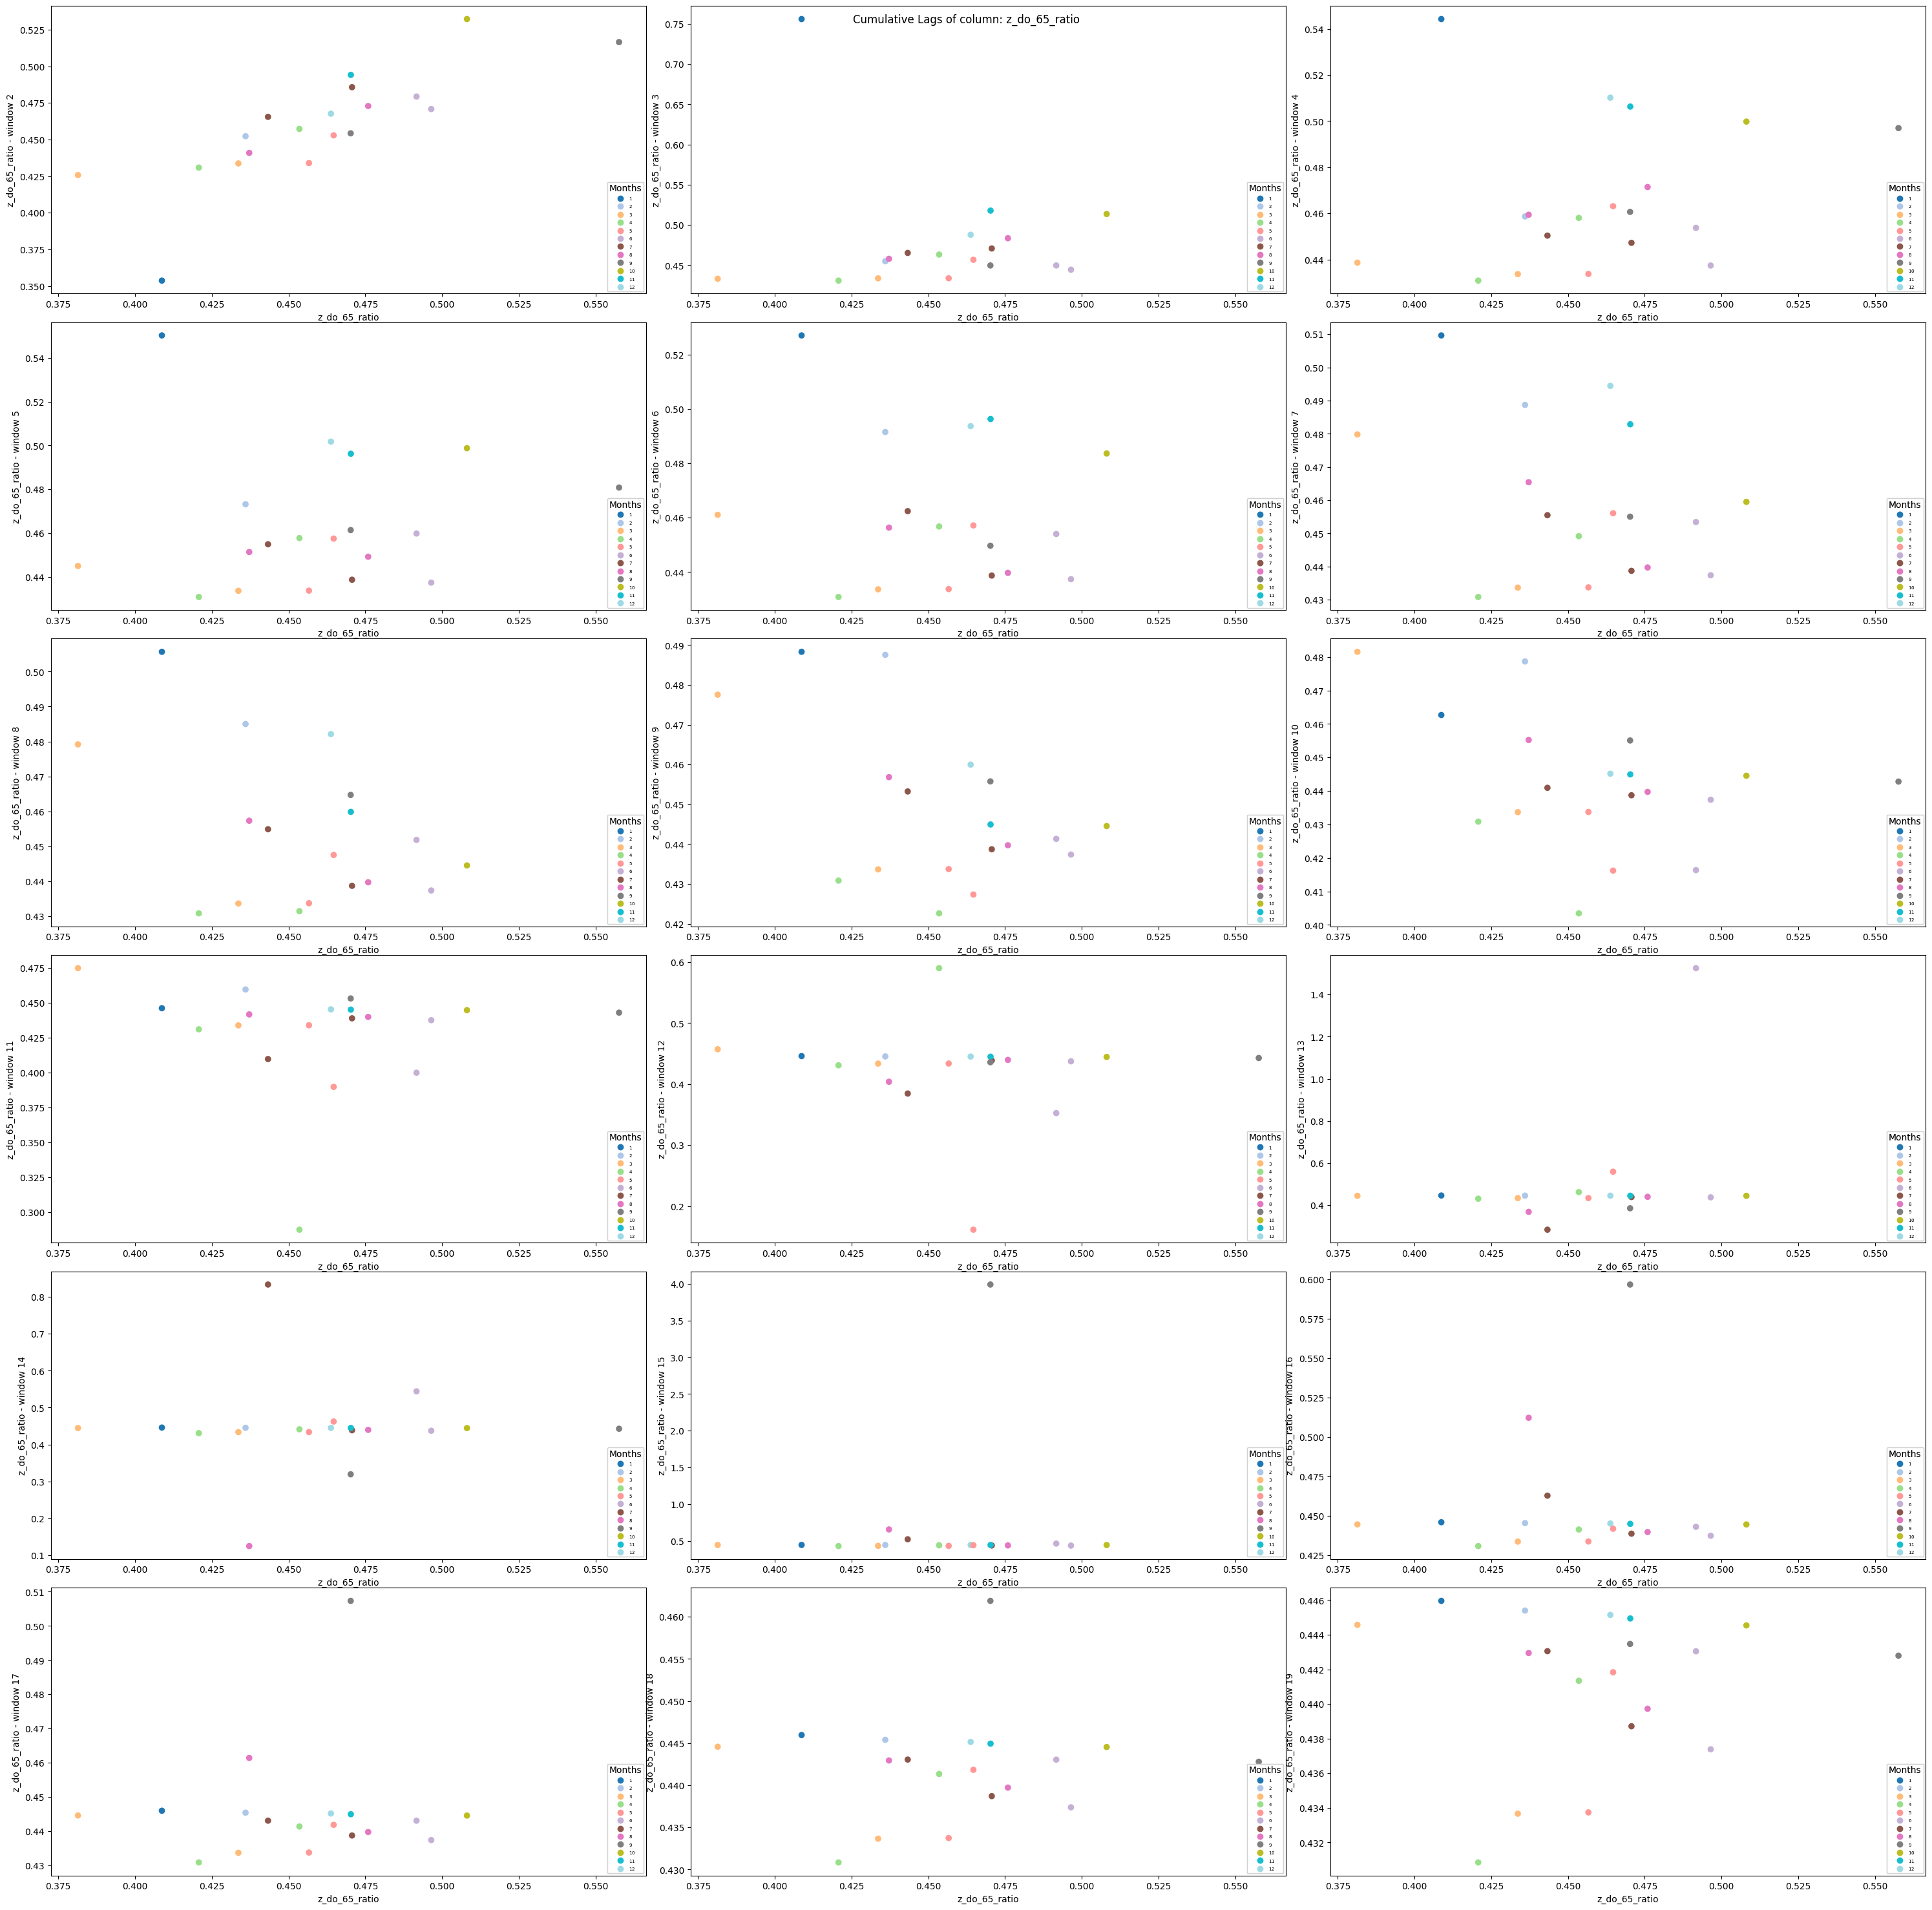

In [235]:
fig = plot_cumulative_lags("z_do_65_ratio", df_refugees_ratio)

<Figure size 6000x6000 with 0 Axes>

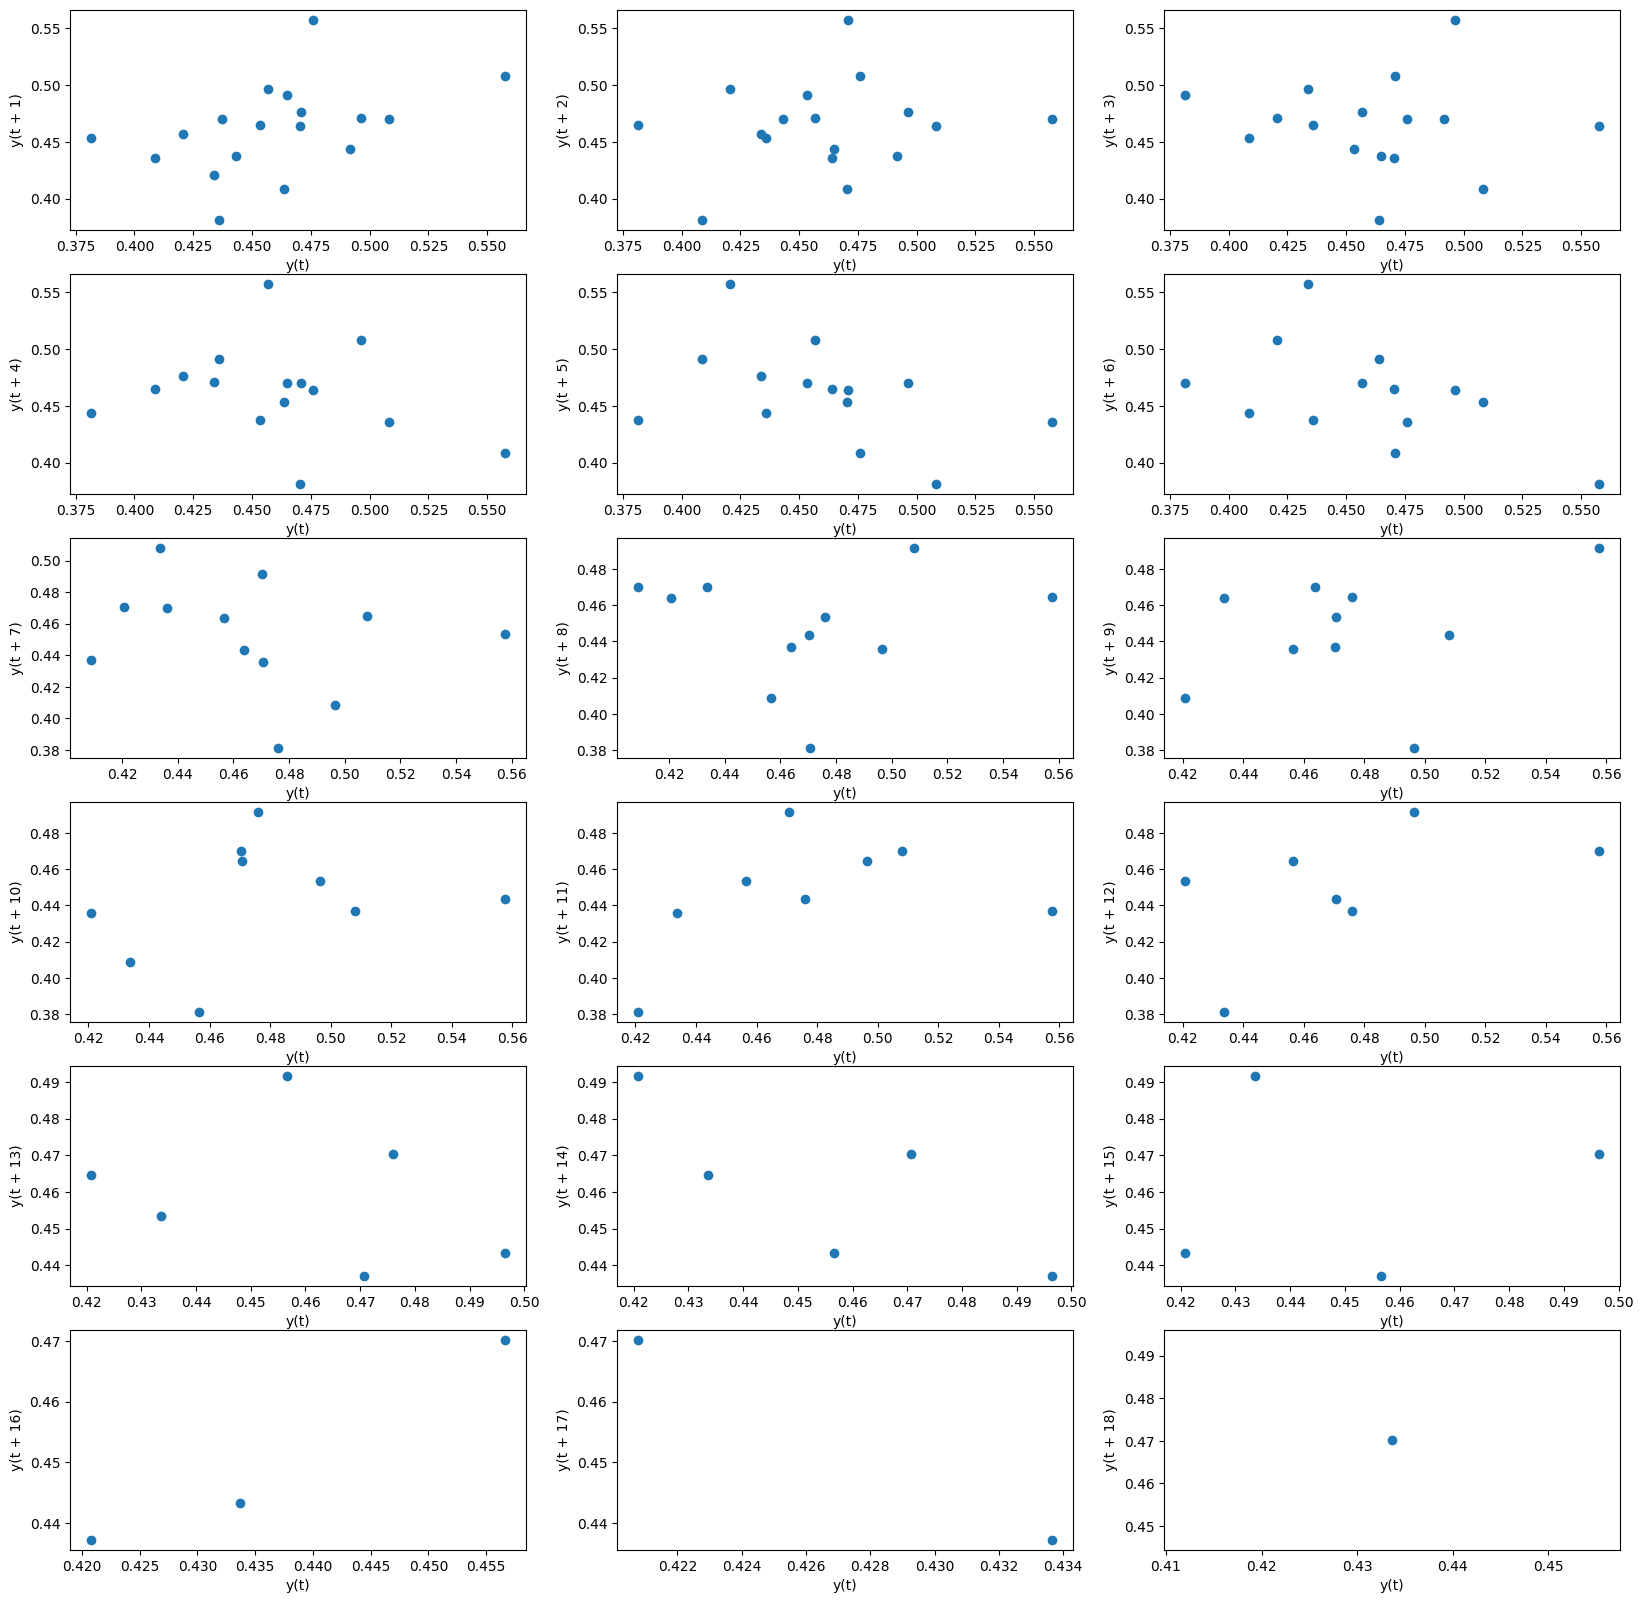

In [232]:
plot_pd_lag_plots(df_refugees_ratio, "z_do_65_ratio")

## Other lags

Try quarter (3 months lags) on all other columns

In [237]:
df.columns

Index(['month', 'year', 'avg_monthly_salary', 'monthly_min_wage',
       'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
       'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price',
       'z_do_65_w8', 'z_do_65_w4', 'celkem_w13', 'celkem_w18', 'm_do_65_w11',
       'celkem_w7', 'm_do_65_w5', 'celkem_w17', 'celkem_w12',
       'noveHlaseniUchazeci', 'celkem_w19', 'uchazeciOZamestnaniUoZ',
       'celkem_w16', 'z_do_65_w15', 'z_do_65_w5', 'celkem_w3', 'm_do_65_w10',
       'z_do_65_w2', 'z_do_65_w17', 'obsazenaAZrusenaVPM', 'celkem_w4',
       'celkem_w14', 'z_do_65_w6', 'z_do_65_w11', 'z_do_65_w12',
       'absolventiSkolAMladistvi', 'noveHlasenaAUvolnenaVPM', 'm_do_65_w18',
       'z_do_65_w10', 'm_do_65_w12', 'celkem_w9', 'celkem_w11', 'm_do_65_w2',
       'm_do_65', 'break_in_thefts', 'celkem_w5', 'm_do_65_w4', 'm_do_65_w19',
       'celkem_w10', 'm_do_65_w15', 'z_do_65_w9', 'm_do_65_w7',
       'general_thefts', 'z_do_65', 'm_do_65_w6', 'z_do_65_w19', 'celke

<Figure size 6000x6000 with 0 Axes>

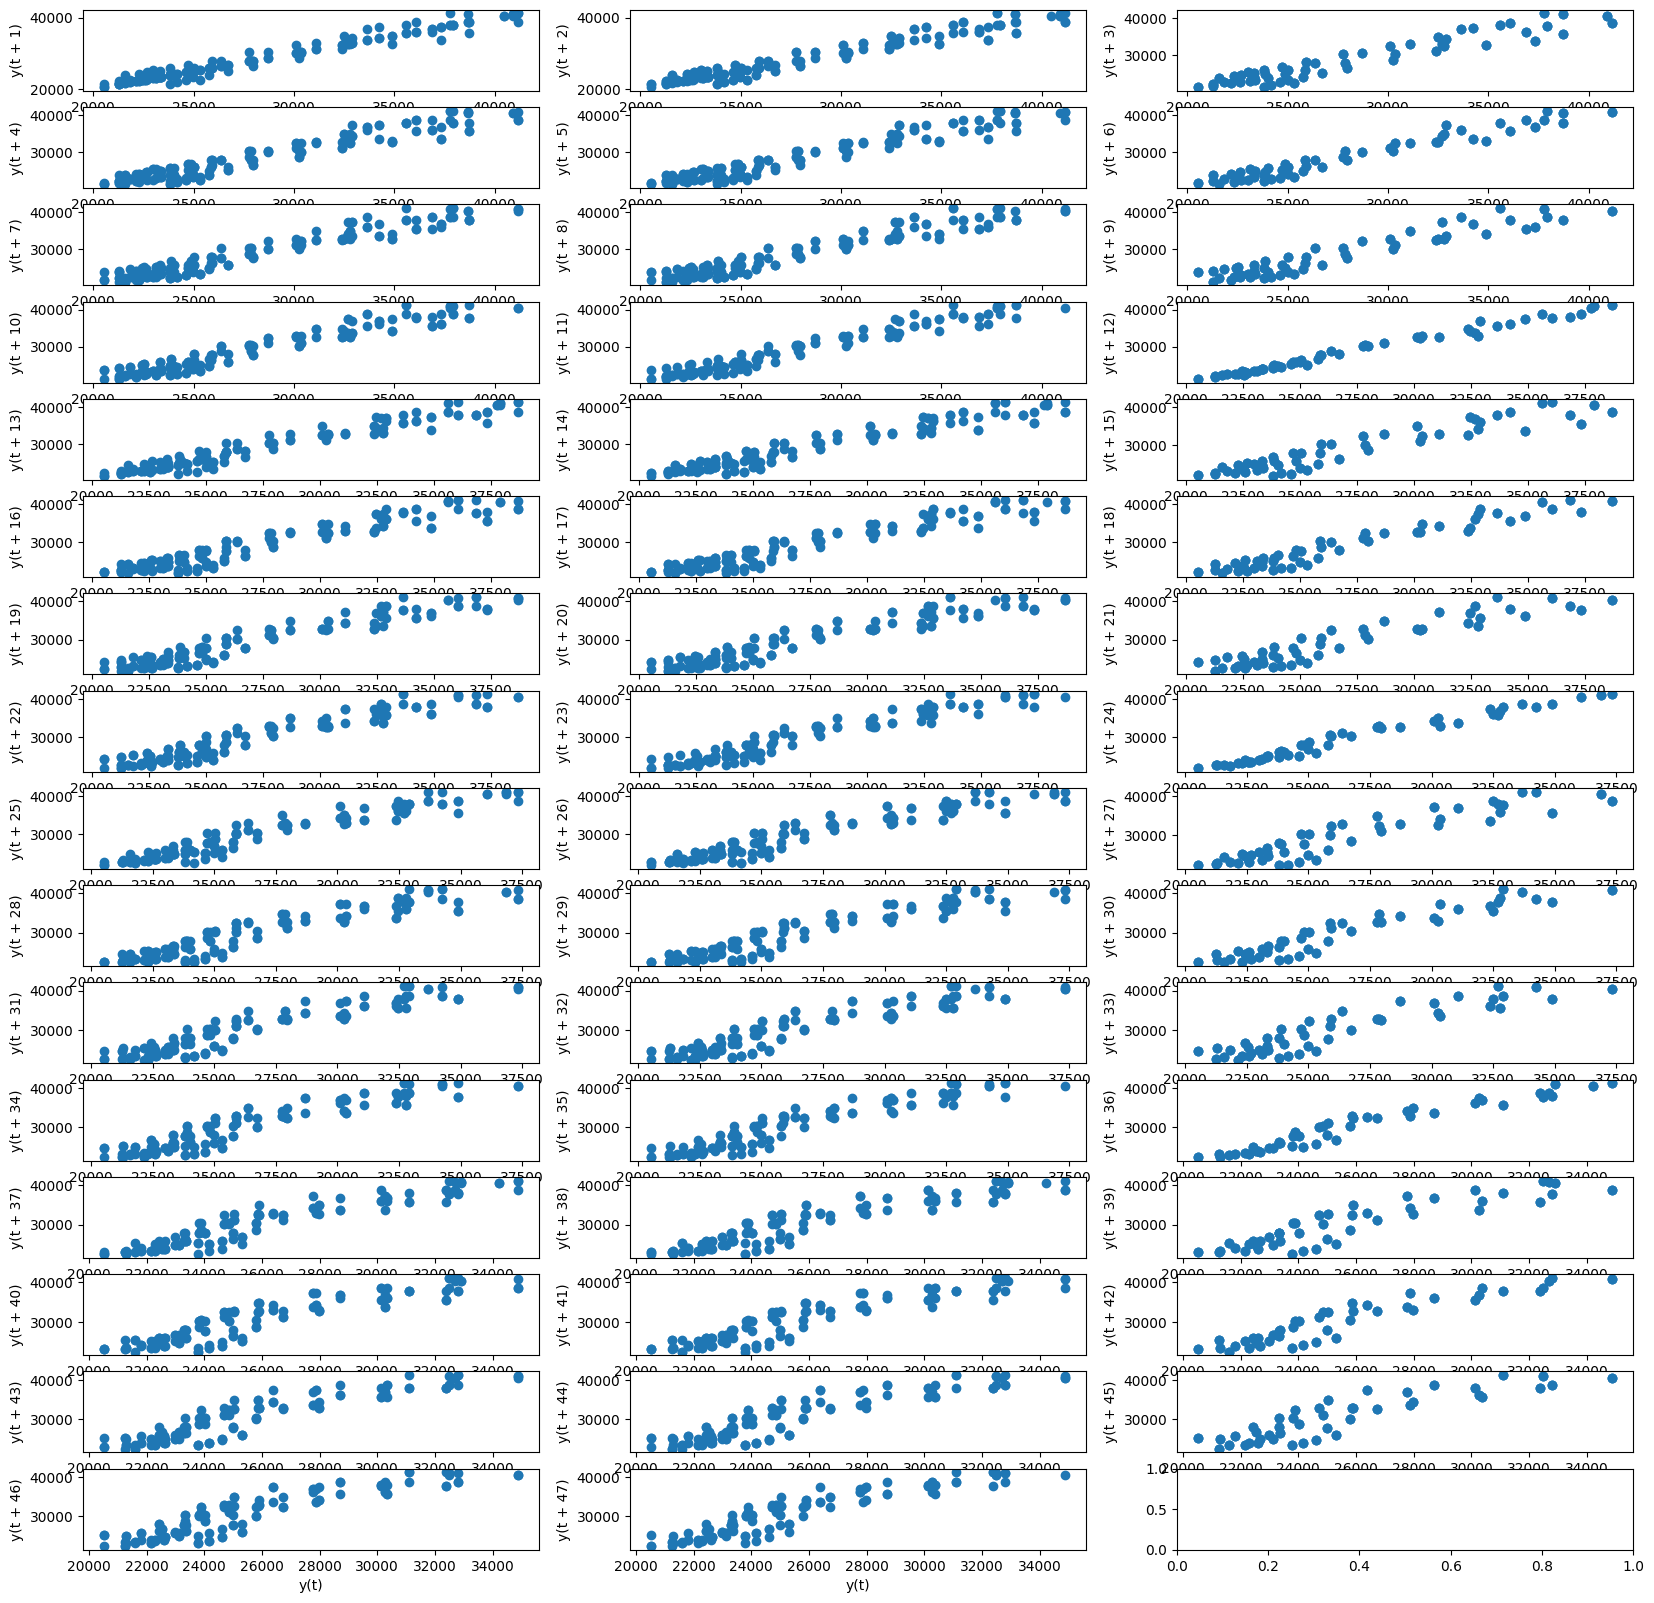

In [247]:
plot_pd_lag_plots(df, "avg_monthly_salary", max_lag=48)

- strong positive correlation in sallaries (they are probably rising all the time) (in the end nonlinear trend)

IndexError: index 6 is out of bounds for axis 0 with size 6

<Figure size 6000x6000 with 0 Axes>

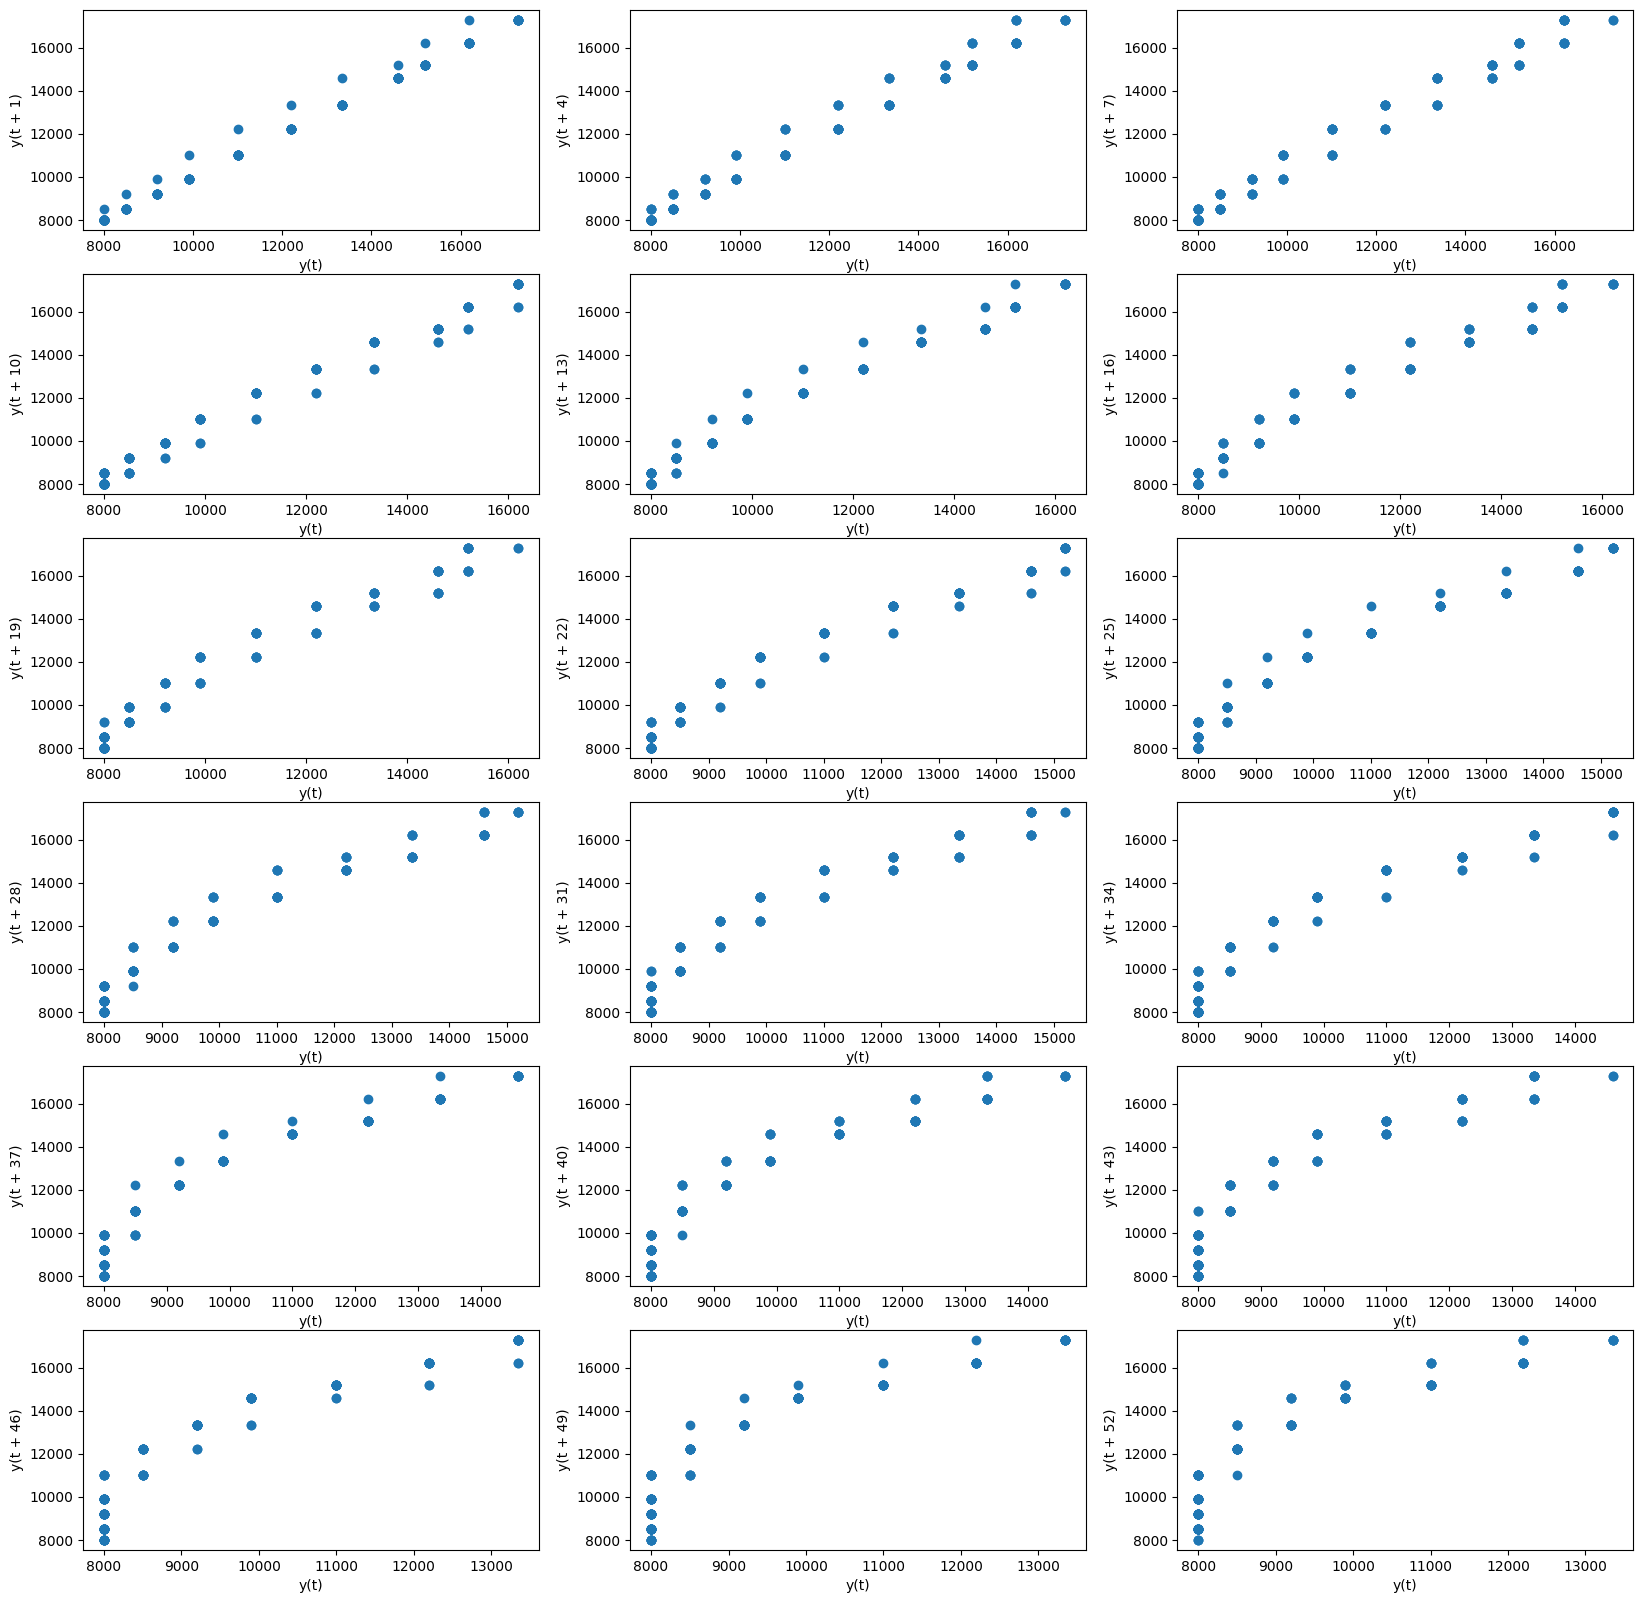

In [261]:
plot_pd_lag_plots(df, "monthly_min_wage", max_lag=60, lag_step=3)

IndexError: index 3 is out of bounds for axis 0 with size 3

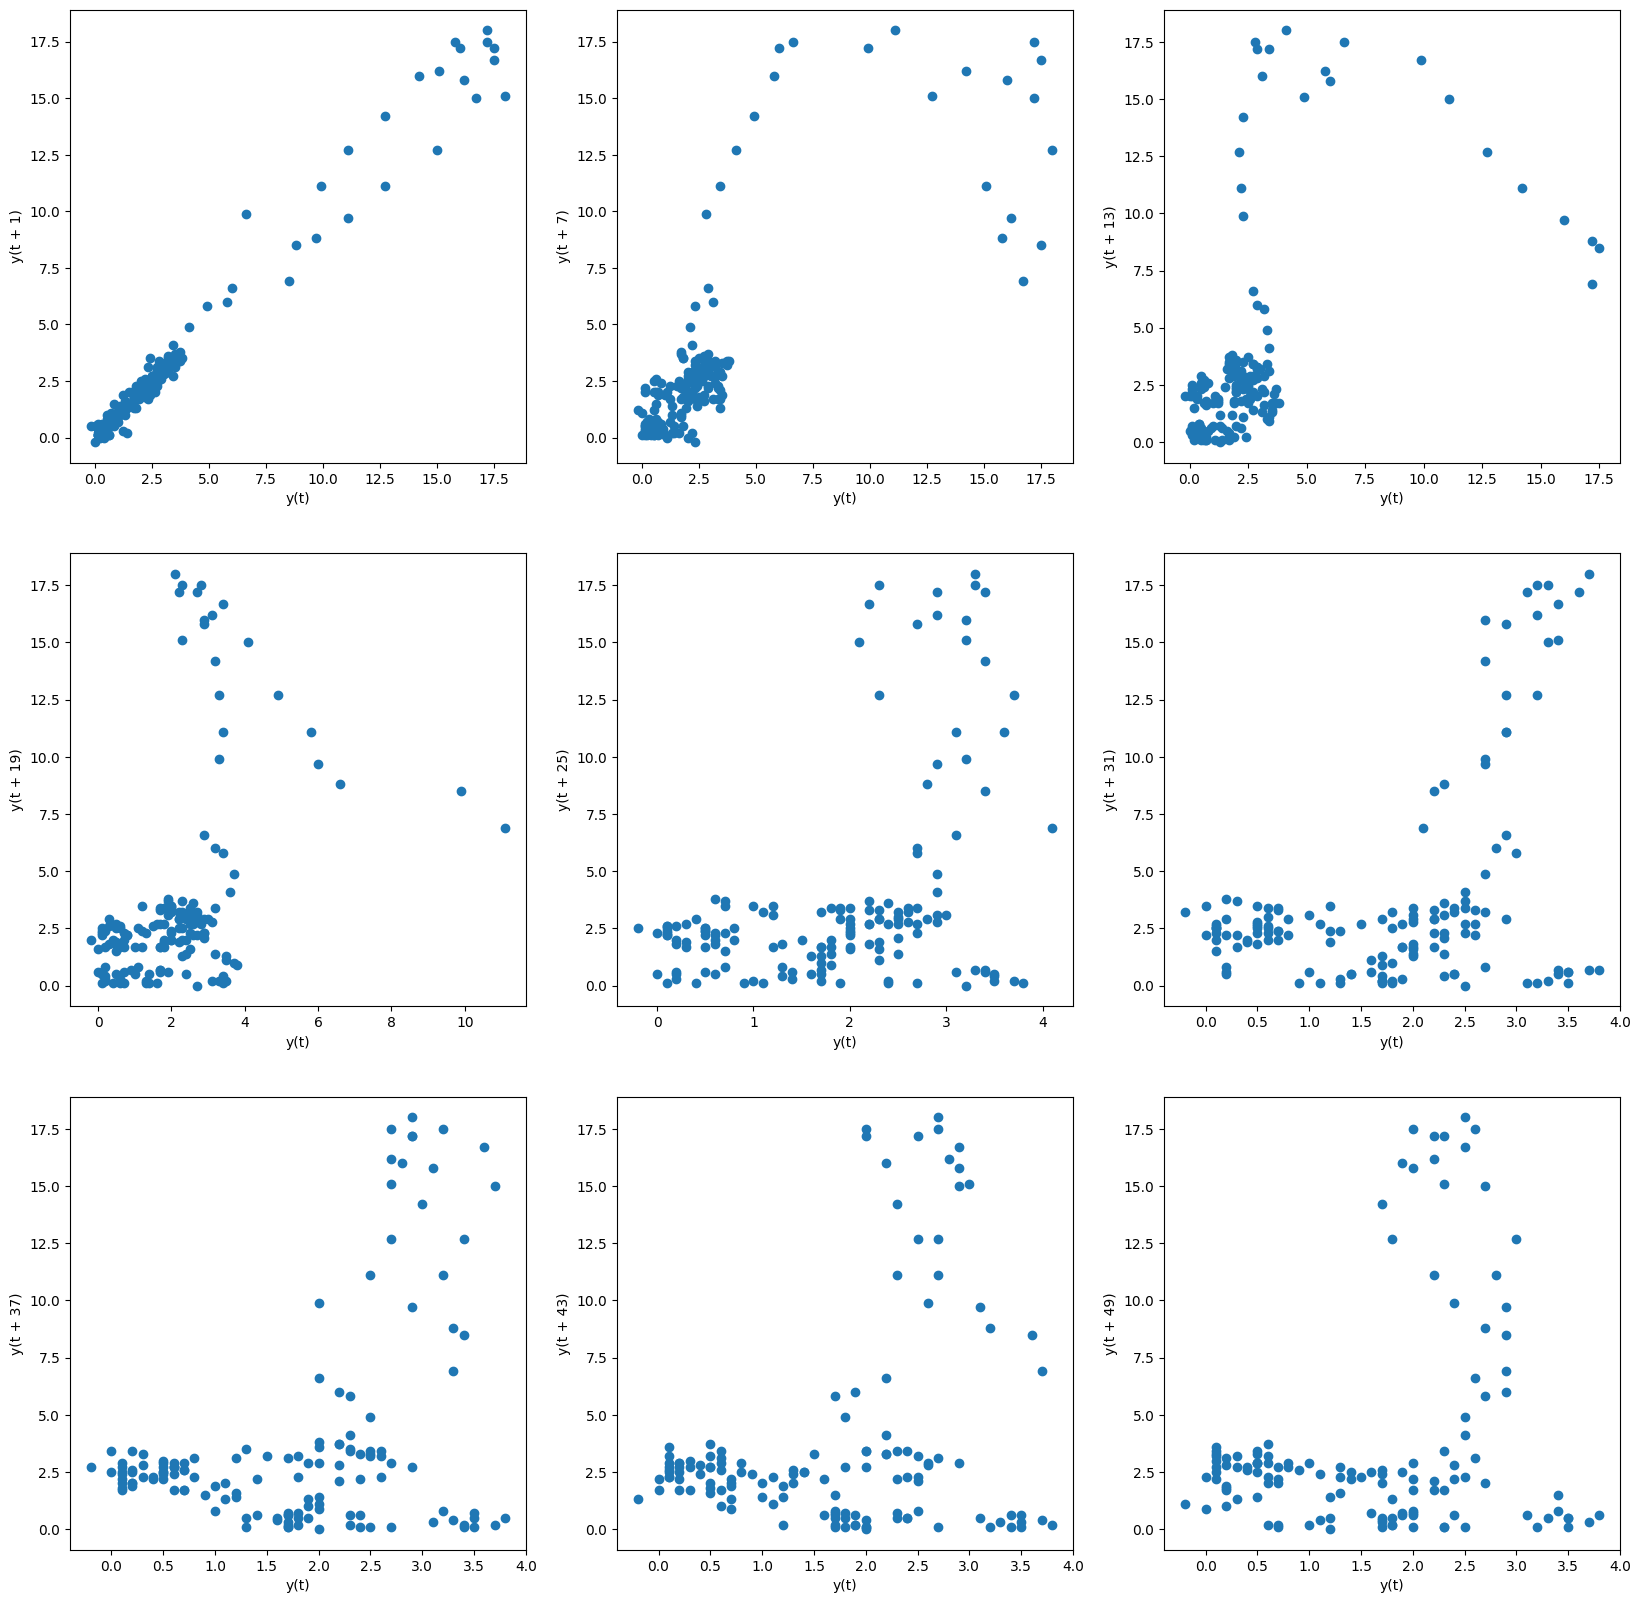

In [267]:
plot_pd_lag_plots(df, "monthly_inflation_rate_wrt_last_year", max_lag=60, lag_step=6)

-  random with some strange pattern -> maybe good to add as predictor?

IndexError: index 6 is out of bounds for axis 0 with size 6

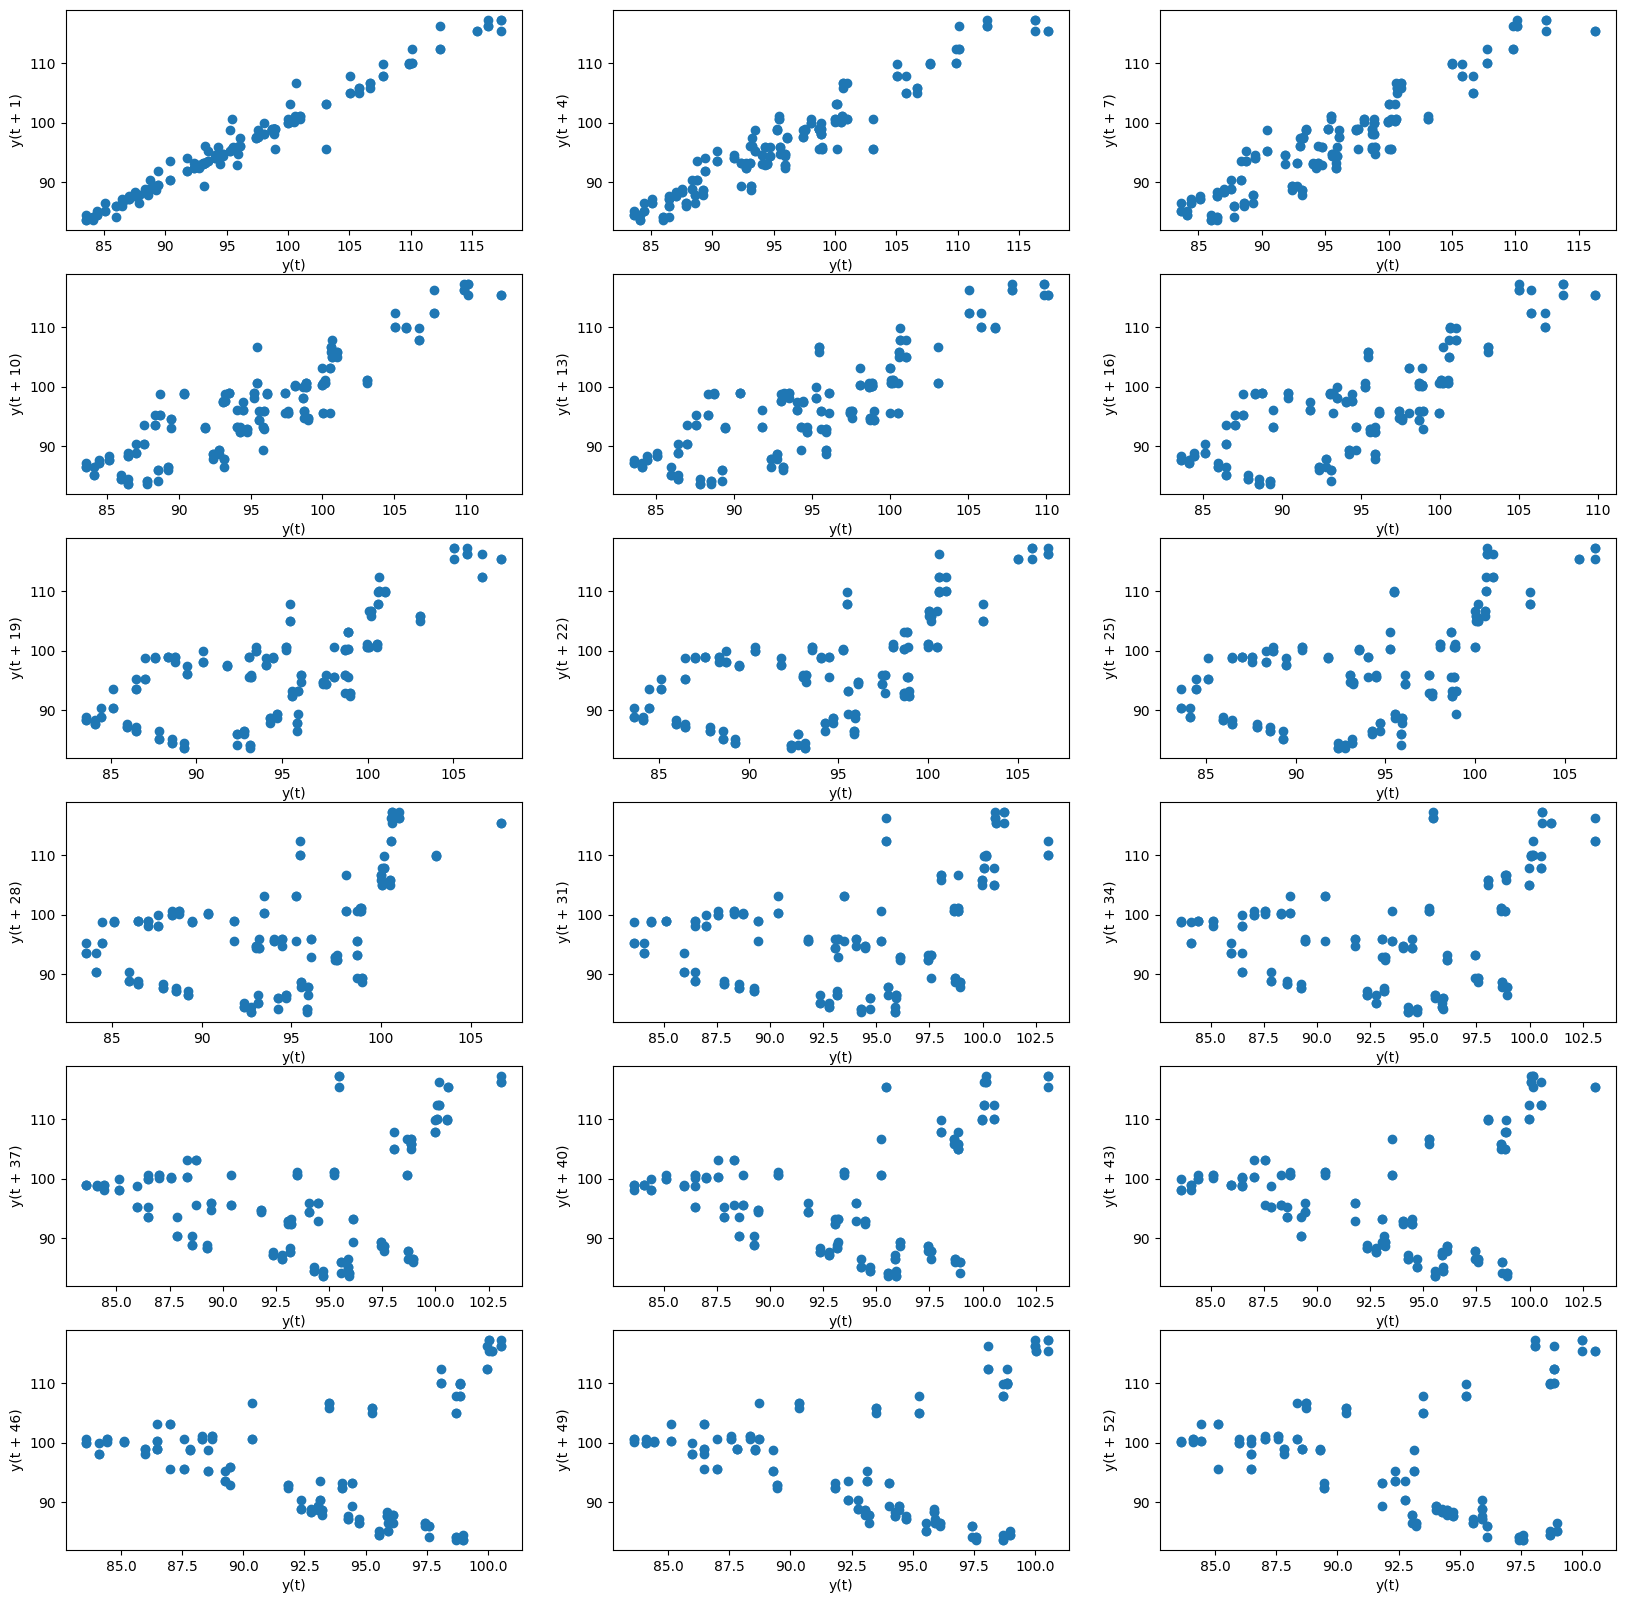

In [269]:
plot_pd_lag_plots(df, "reer", max_lag=60, lag_step=3)

- no seasonality, randomness

In [271]:
df.bilance

date
2009-01-01    -2.730
2009-02-01   -74.000
2009-03-01     9.819
2009-04-01     2.739
2009-05-01     2.499
               ...  
2023-05-01     9.370
2023-06-01    19.236
2023-07-01    -6.421
2023-08-01    -5.628
2023-09-01    11.874
Name: bilance, Length: 177, dtype: float64

IndexError: index 6 is out of bounds for axis 0 with size 6

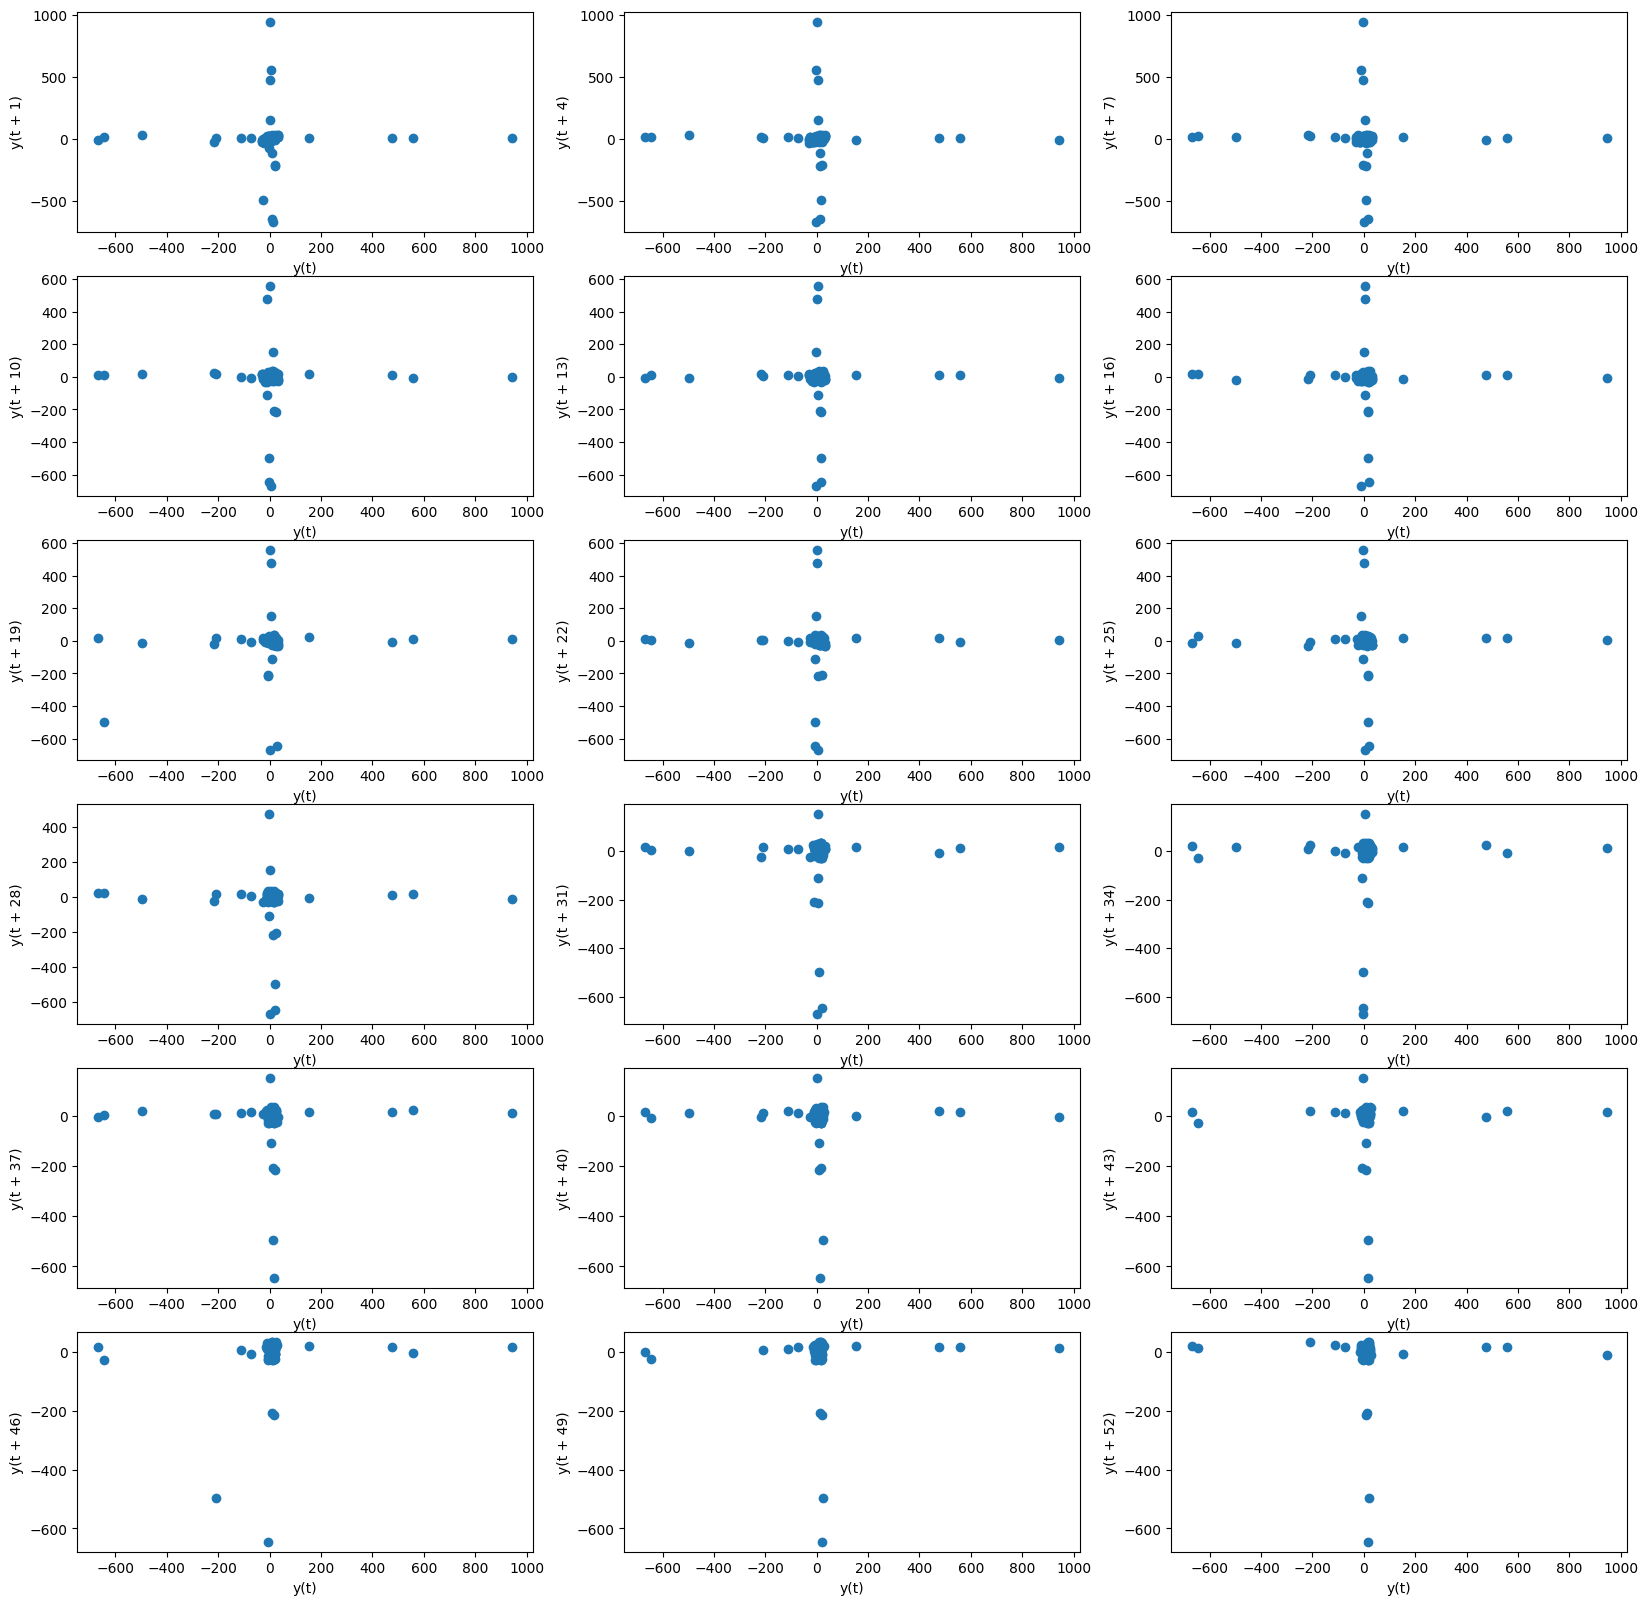

In [270]:
plot_pd_lag_plots(df, "bilance", max_lag=60, lag_step=3)

- strong outliers in bilance -> see time plots

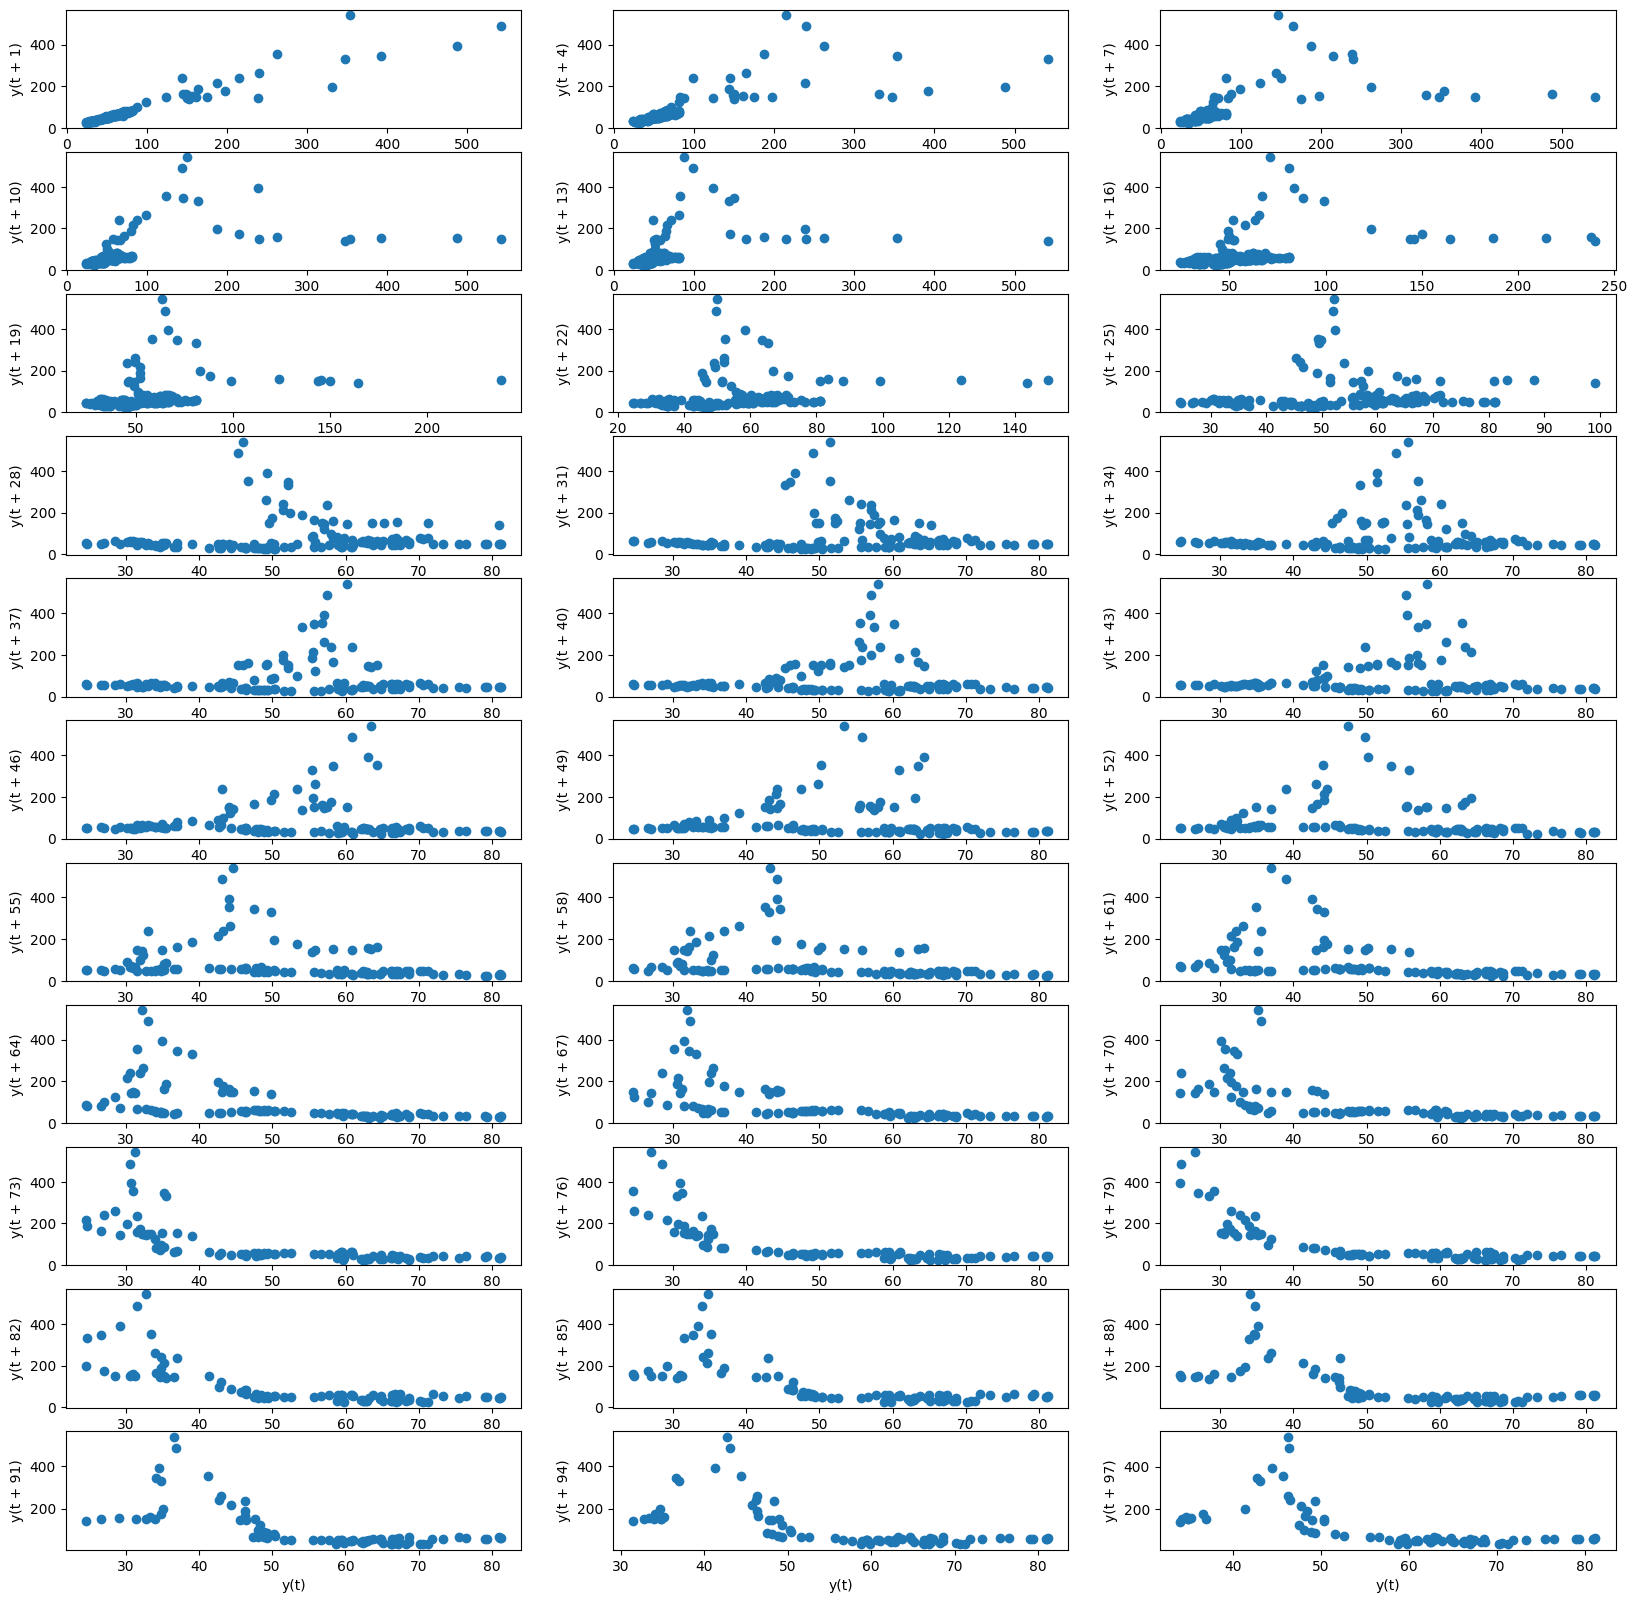

In [274]:
plot_pd_lag_plots(df, "avg_energy_price", max_lag=100, lag_step=3)

<Figure size 100000x12000 with 0 Axes>

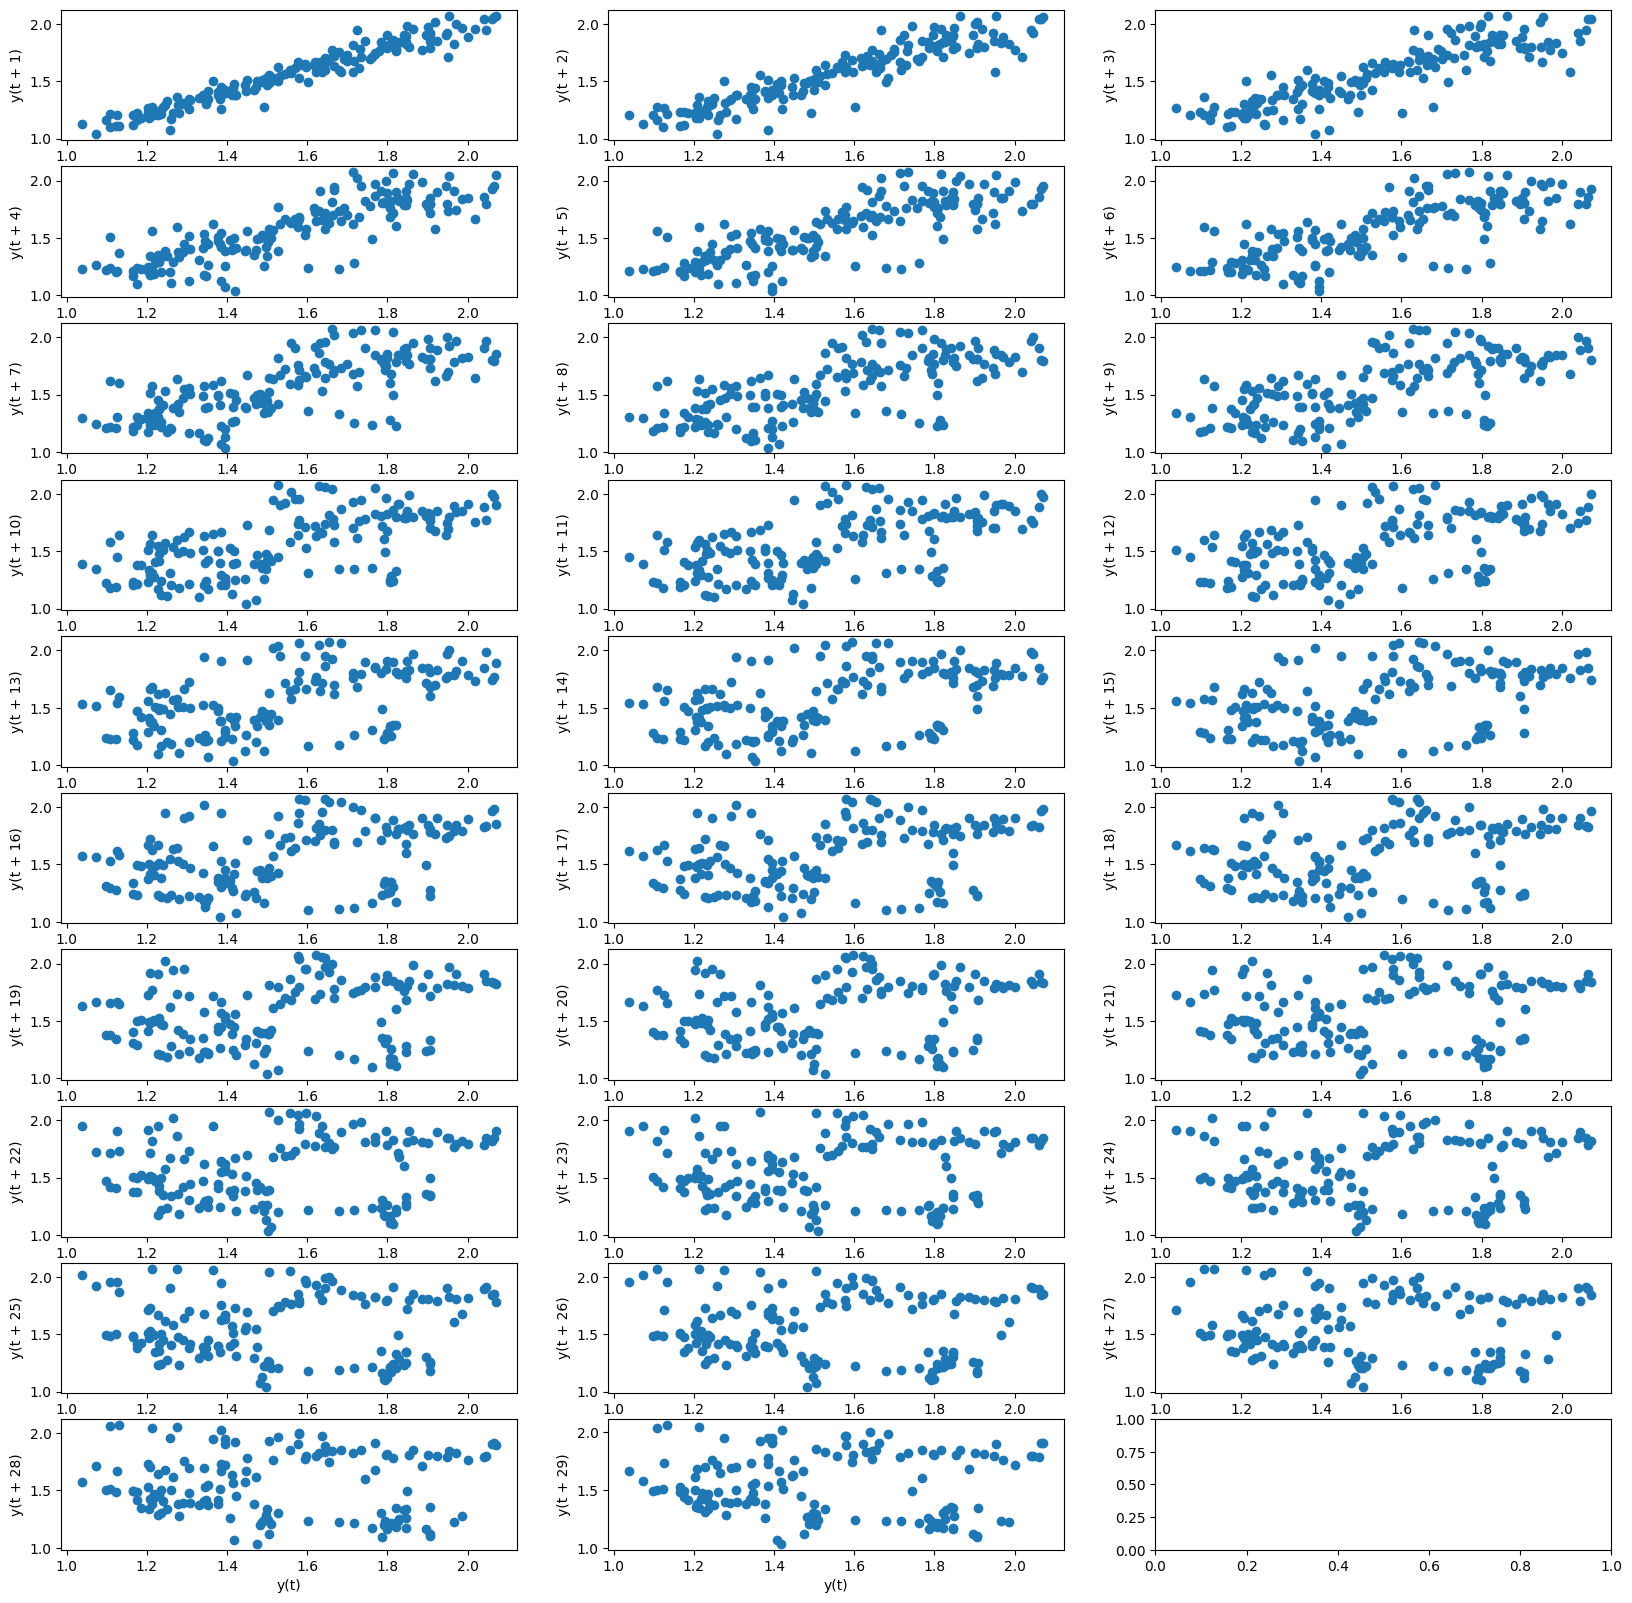

In [287]:
plot_pd_lag_plots(df, "avg_gasoline_price", max_lag=30, lag_step=1)

<Figure size 100000x12000 with 0 Axes>

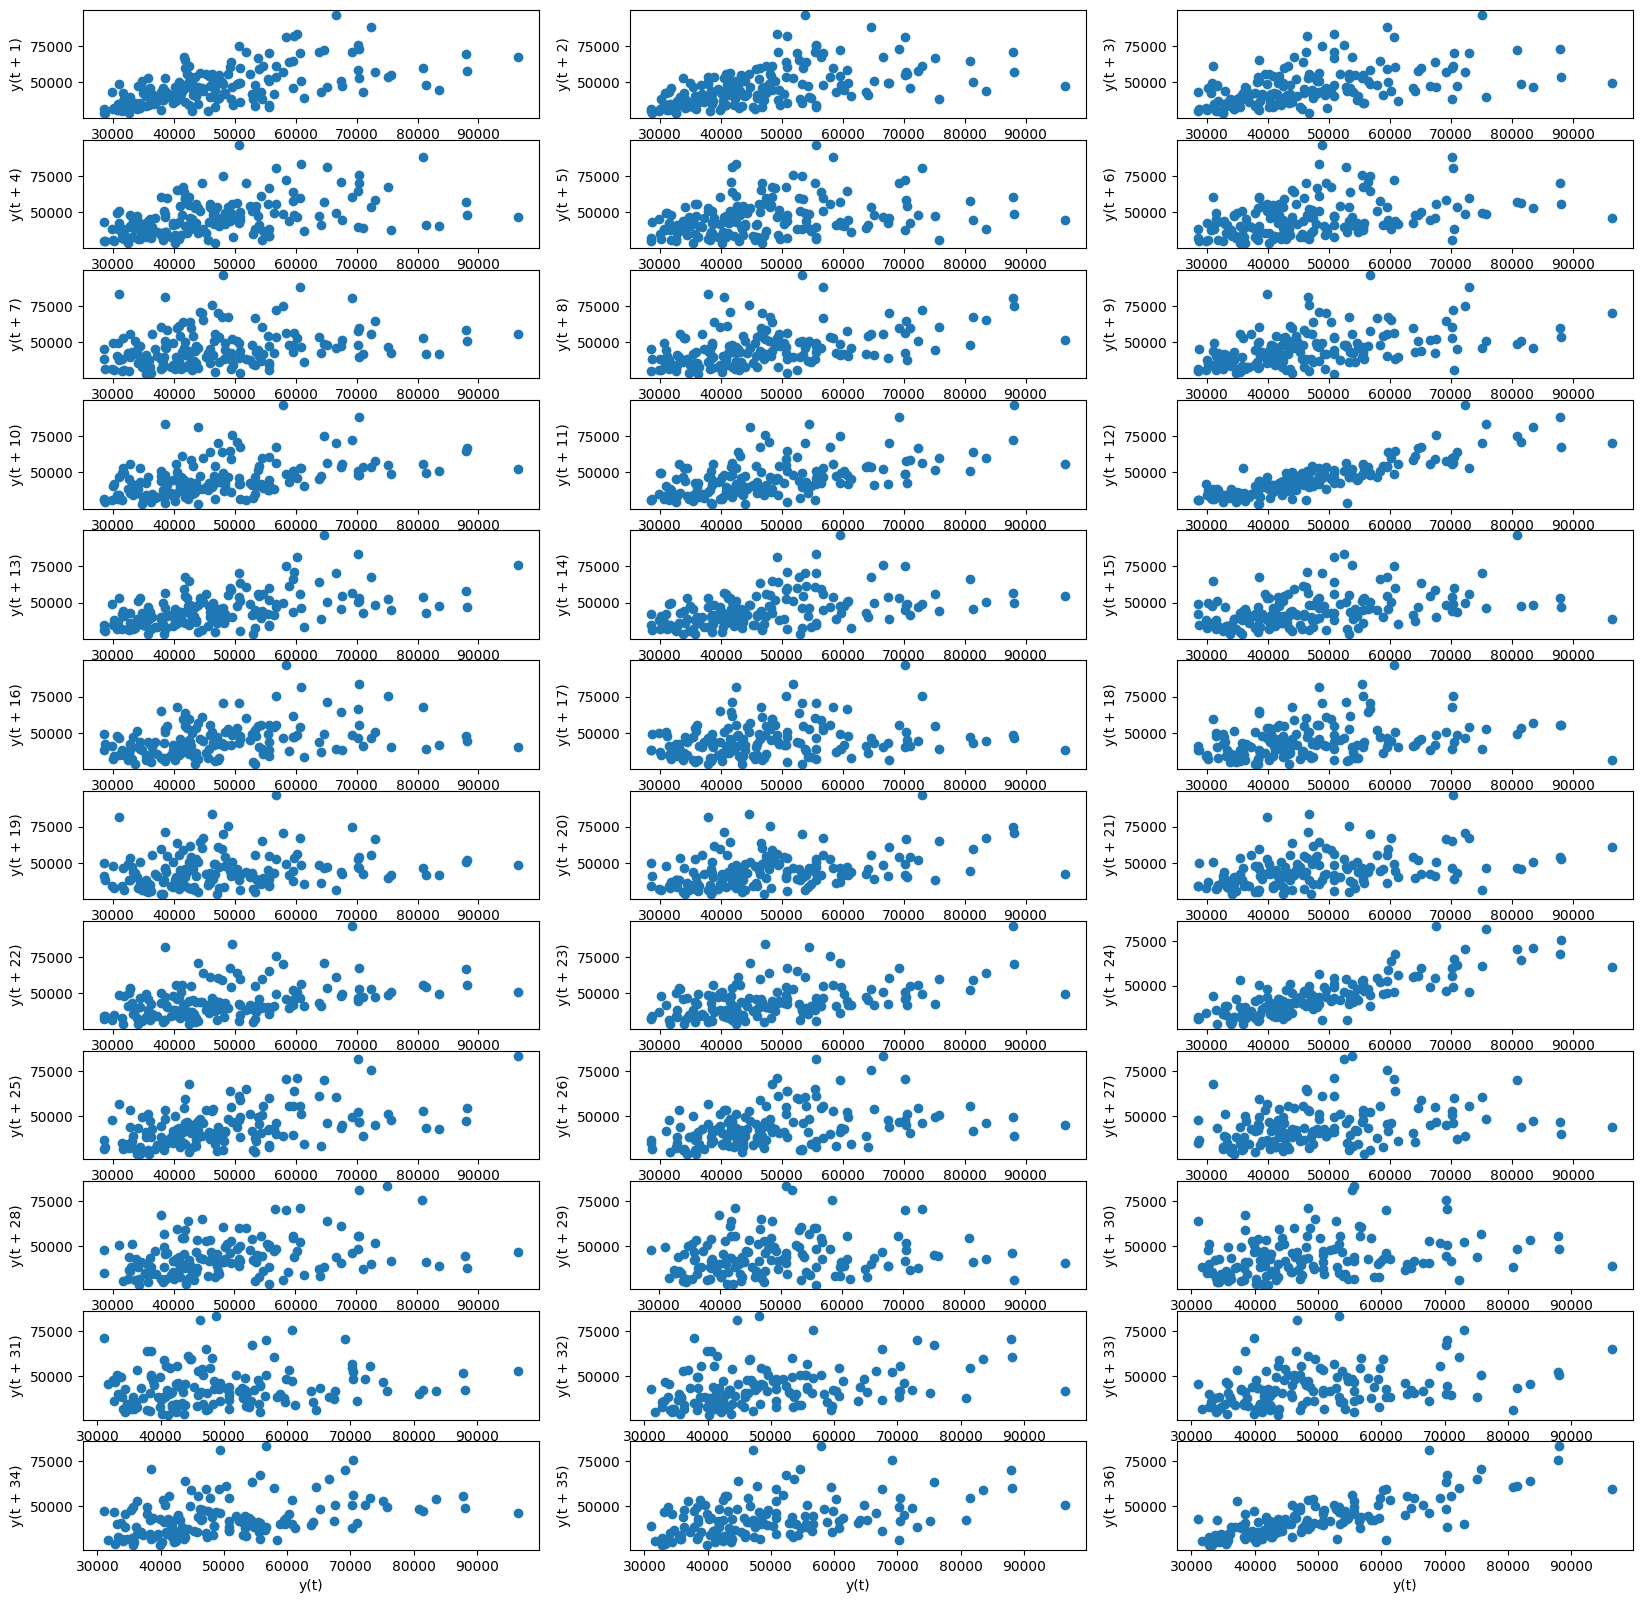

In [294]:
plot_pd_lag_plots(df, "noveHlaseniUchazeci", max_lag=37, lag_step=1)

- strong year seasonality!

IndexError: index 3 is out of bounds for axis 0 with size 3

Error in callback <function _draw_all_if_interactive at 0x7b9d73150160> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 100000x12000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 100000x12000 with 0 Axes>

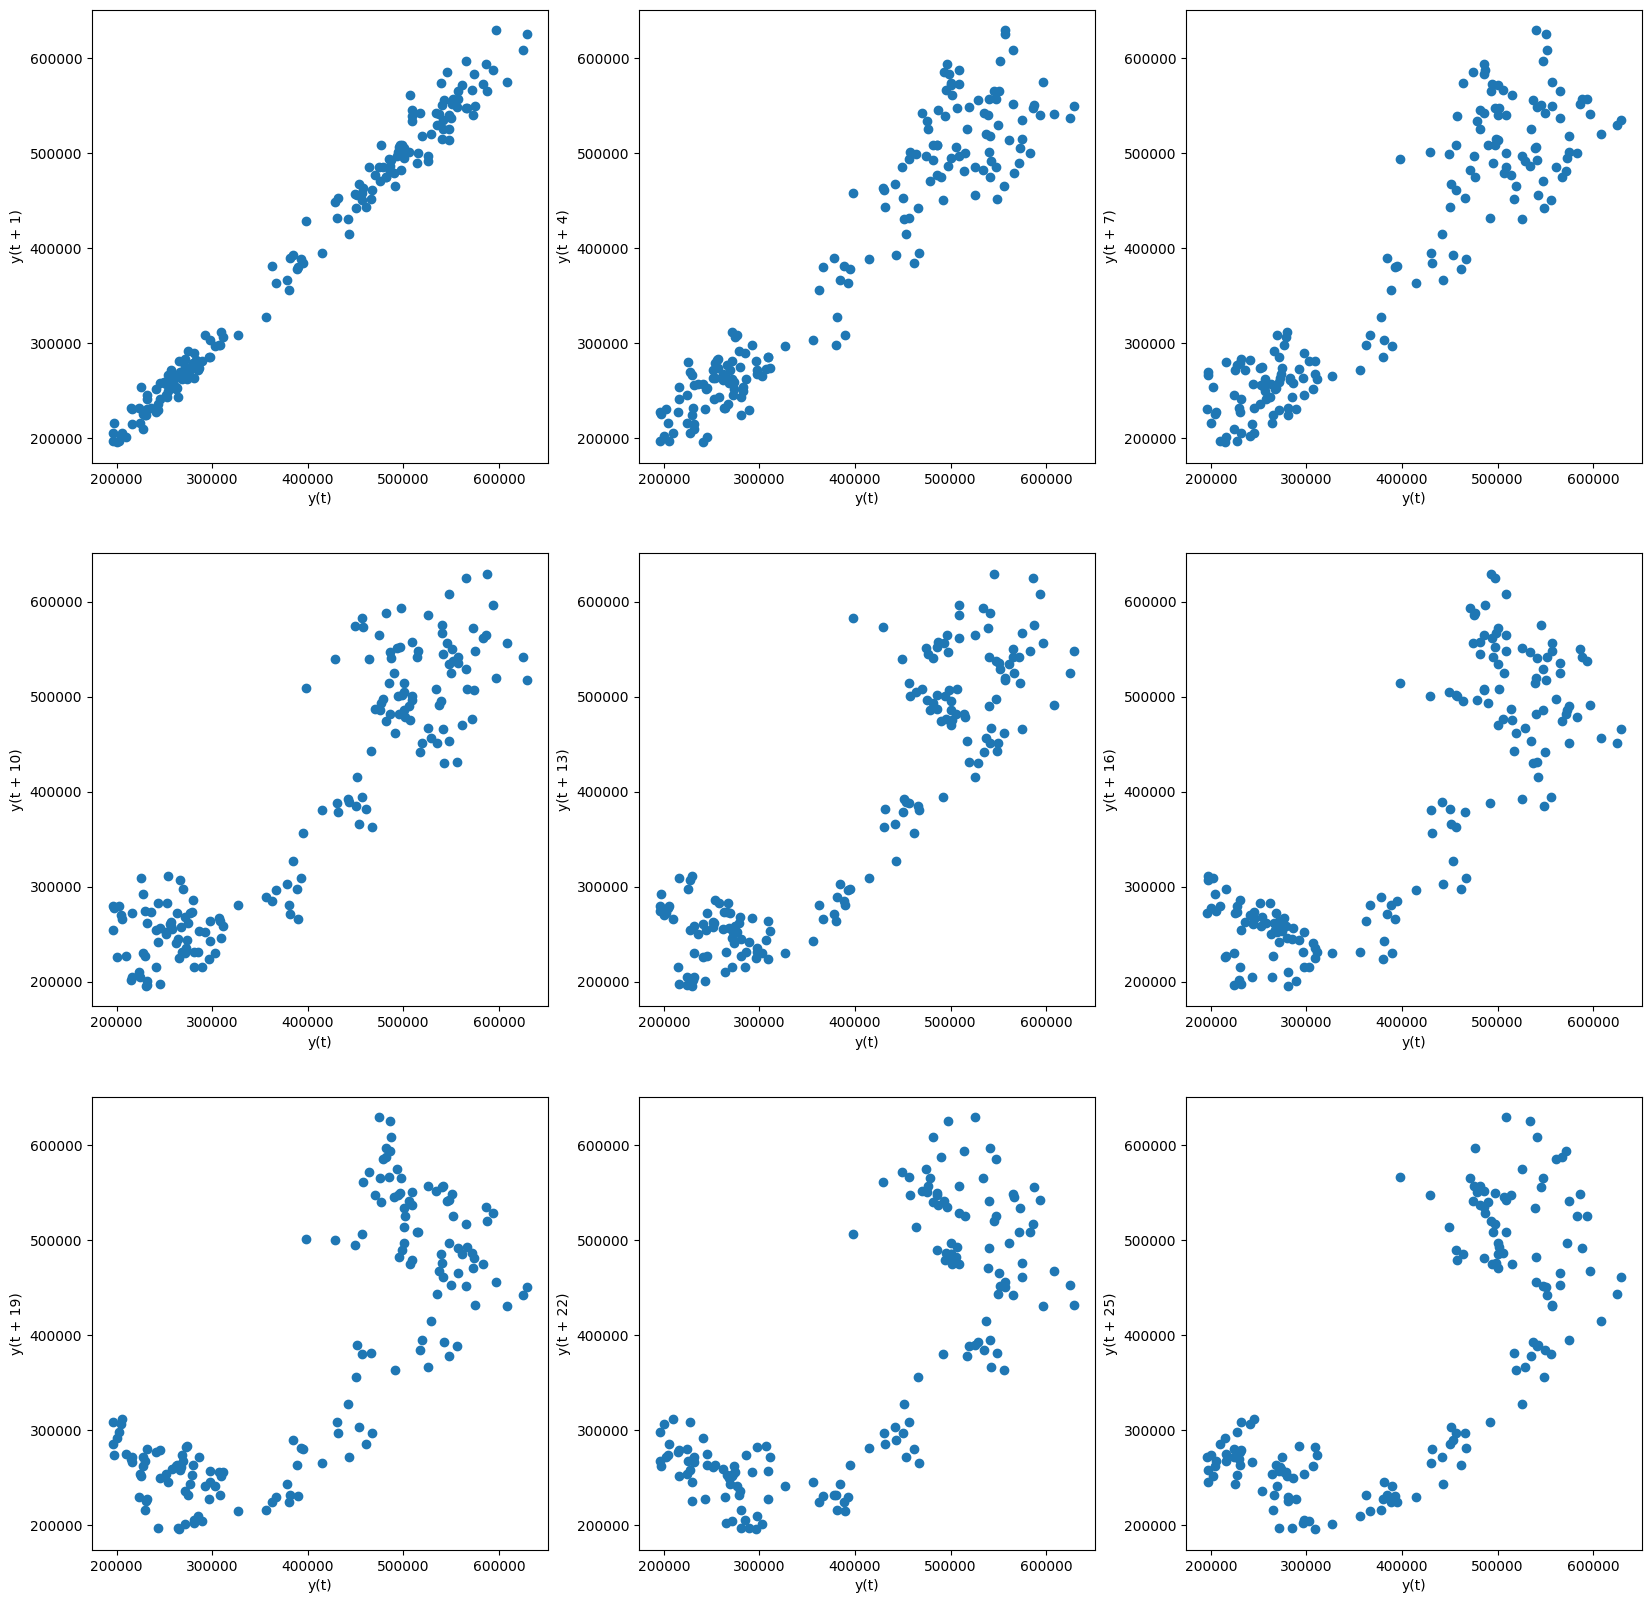

In [292]:
plot_pd_lag_plots(df, "uchazeciOZamestnaniUoZ", max_lag=30, lag_step=3)

In [295]:
df.columns

Index(['month', 'year', 'avg_monthly_salary', 'monthly_min_wage',
       'monthly_inflation_rate_wrt_last_year', 'reer', 'bilance',
       'avg_energy_price', 'avg_gasoline_price', 'avg_natural_gas_price',
       'z_do_65_w8', 'z_do_65_w4', 'celkem_w13', 'celkem_w18', 'm_do_65_w11',
       'celkem_w7', 'm_do_65_w5', 'celkem_w17', 'celkem_w12',
       'noveHlaseniUchazeci', 'celkem_w19', 'uchazeciOZamestnaniUoZ',
       'celkem_w16', 'z_do_65_w15', 'z_do_65_w5', 'celkem_w3', 'm_do_65_w10',
       'z_do_65_w2', 'z_do_65_w17', 'obsazenaAZrusenaVPM', 'celkem_w4',
       'celkem_w14', 'z_do_65_w6', 'z_do_65_w11', 'z_do_65_w12',
       'absolventiSkolAMladistvi', 'noveHlasenaAUvolnenaVPM', 'm_do_65_w18',
       'z_do_65_w10', 'm_do_65_w12', 'celkem_w9', 'celkem_w11', 'm_do_65_w2',
       'm_do_65', 'break_in_thefts', 'celkem_w5', 'm_do_65_w4', 'm_do_65_w19',
       'celkem_w10', 'm_do_65_w15', 'z_do_65_w9', 'm_do_65_w7',
       'general_thefts', 'z_do_65', 'm_do_65_w6', 'z_do_65_w19', 'celke

<Figure size 100000x12000 with 0 Axes>

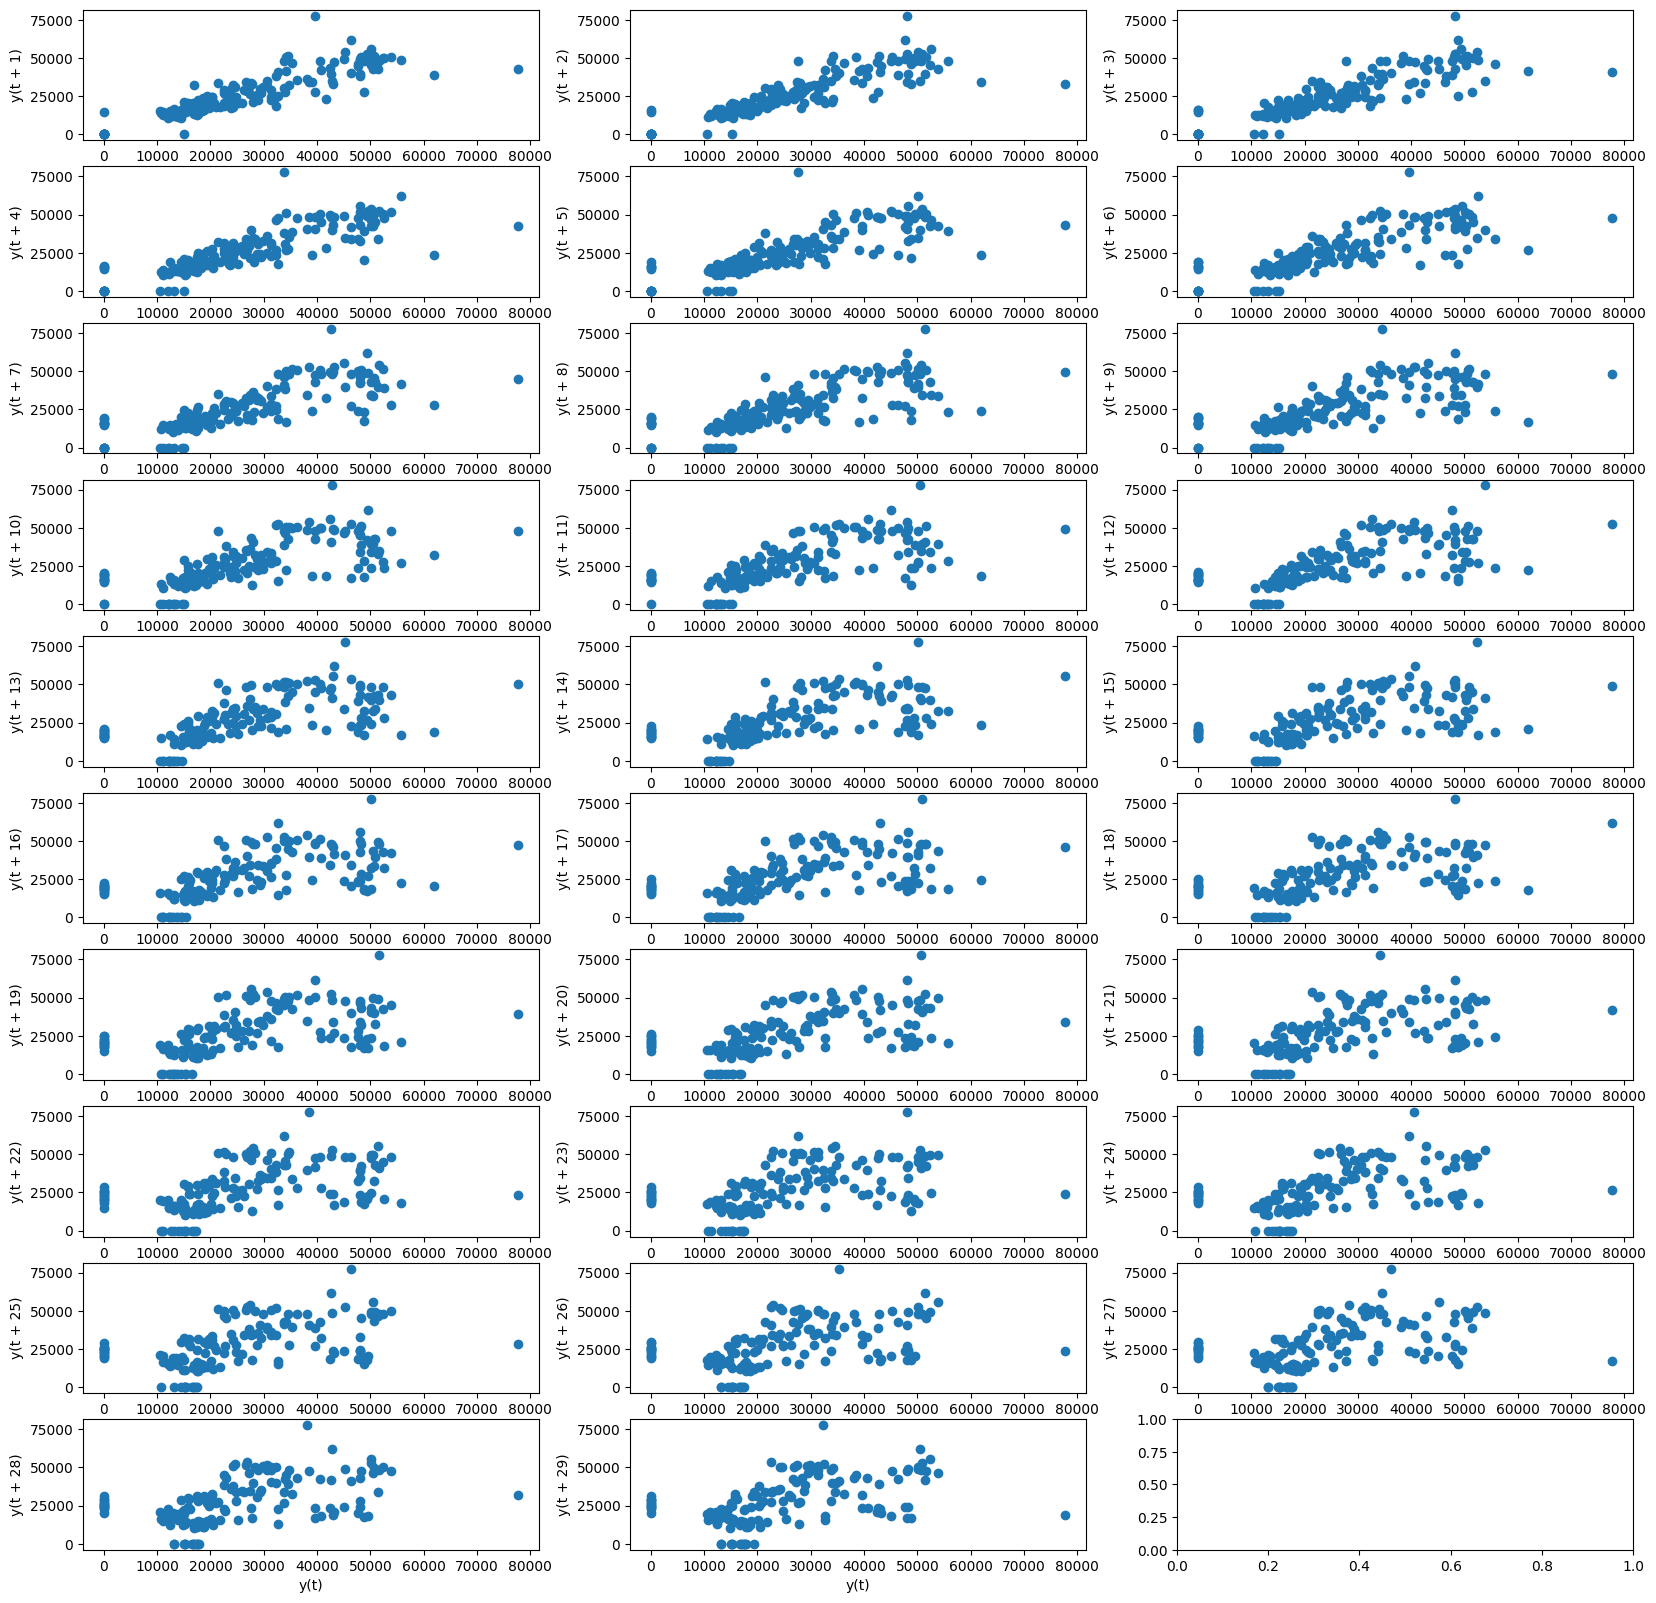

In [297]:
plot_pd_lag_plots(df, "obsazenaAZrusenaVPM", max_lag=30, lag_step=1)

<Figure size 100000x12000 with 0 Axes>

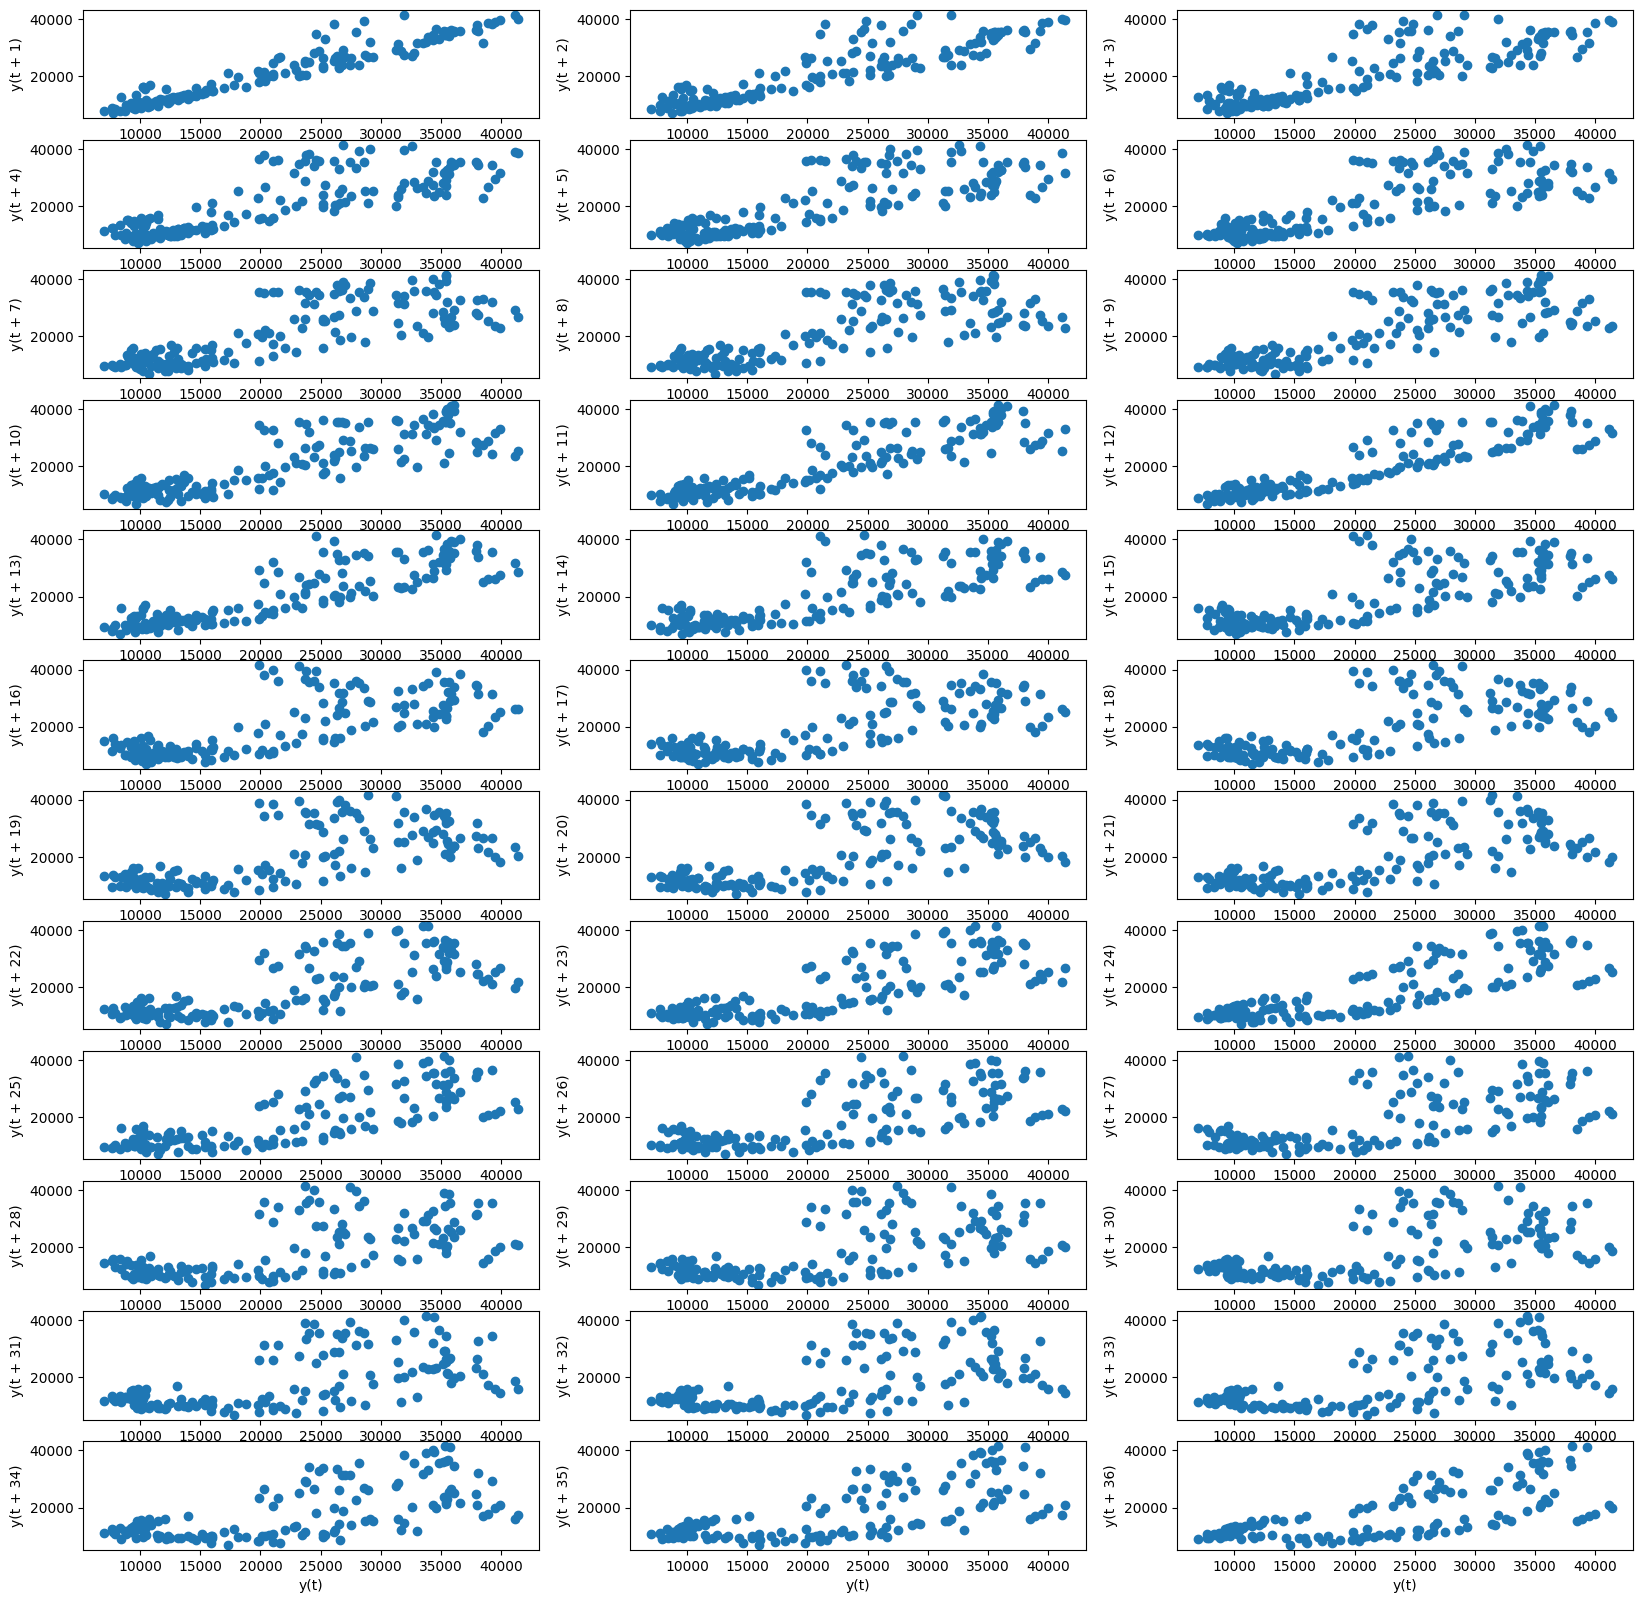

In [300]:
plot_pd_lag_plots(df, "absolventiSkolAMladistvi", max_lag=37, lag_step=1)

- weak seasonality - see time plots

<Figure size 100000x12000 with 0 Axes>

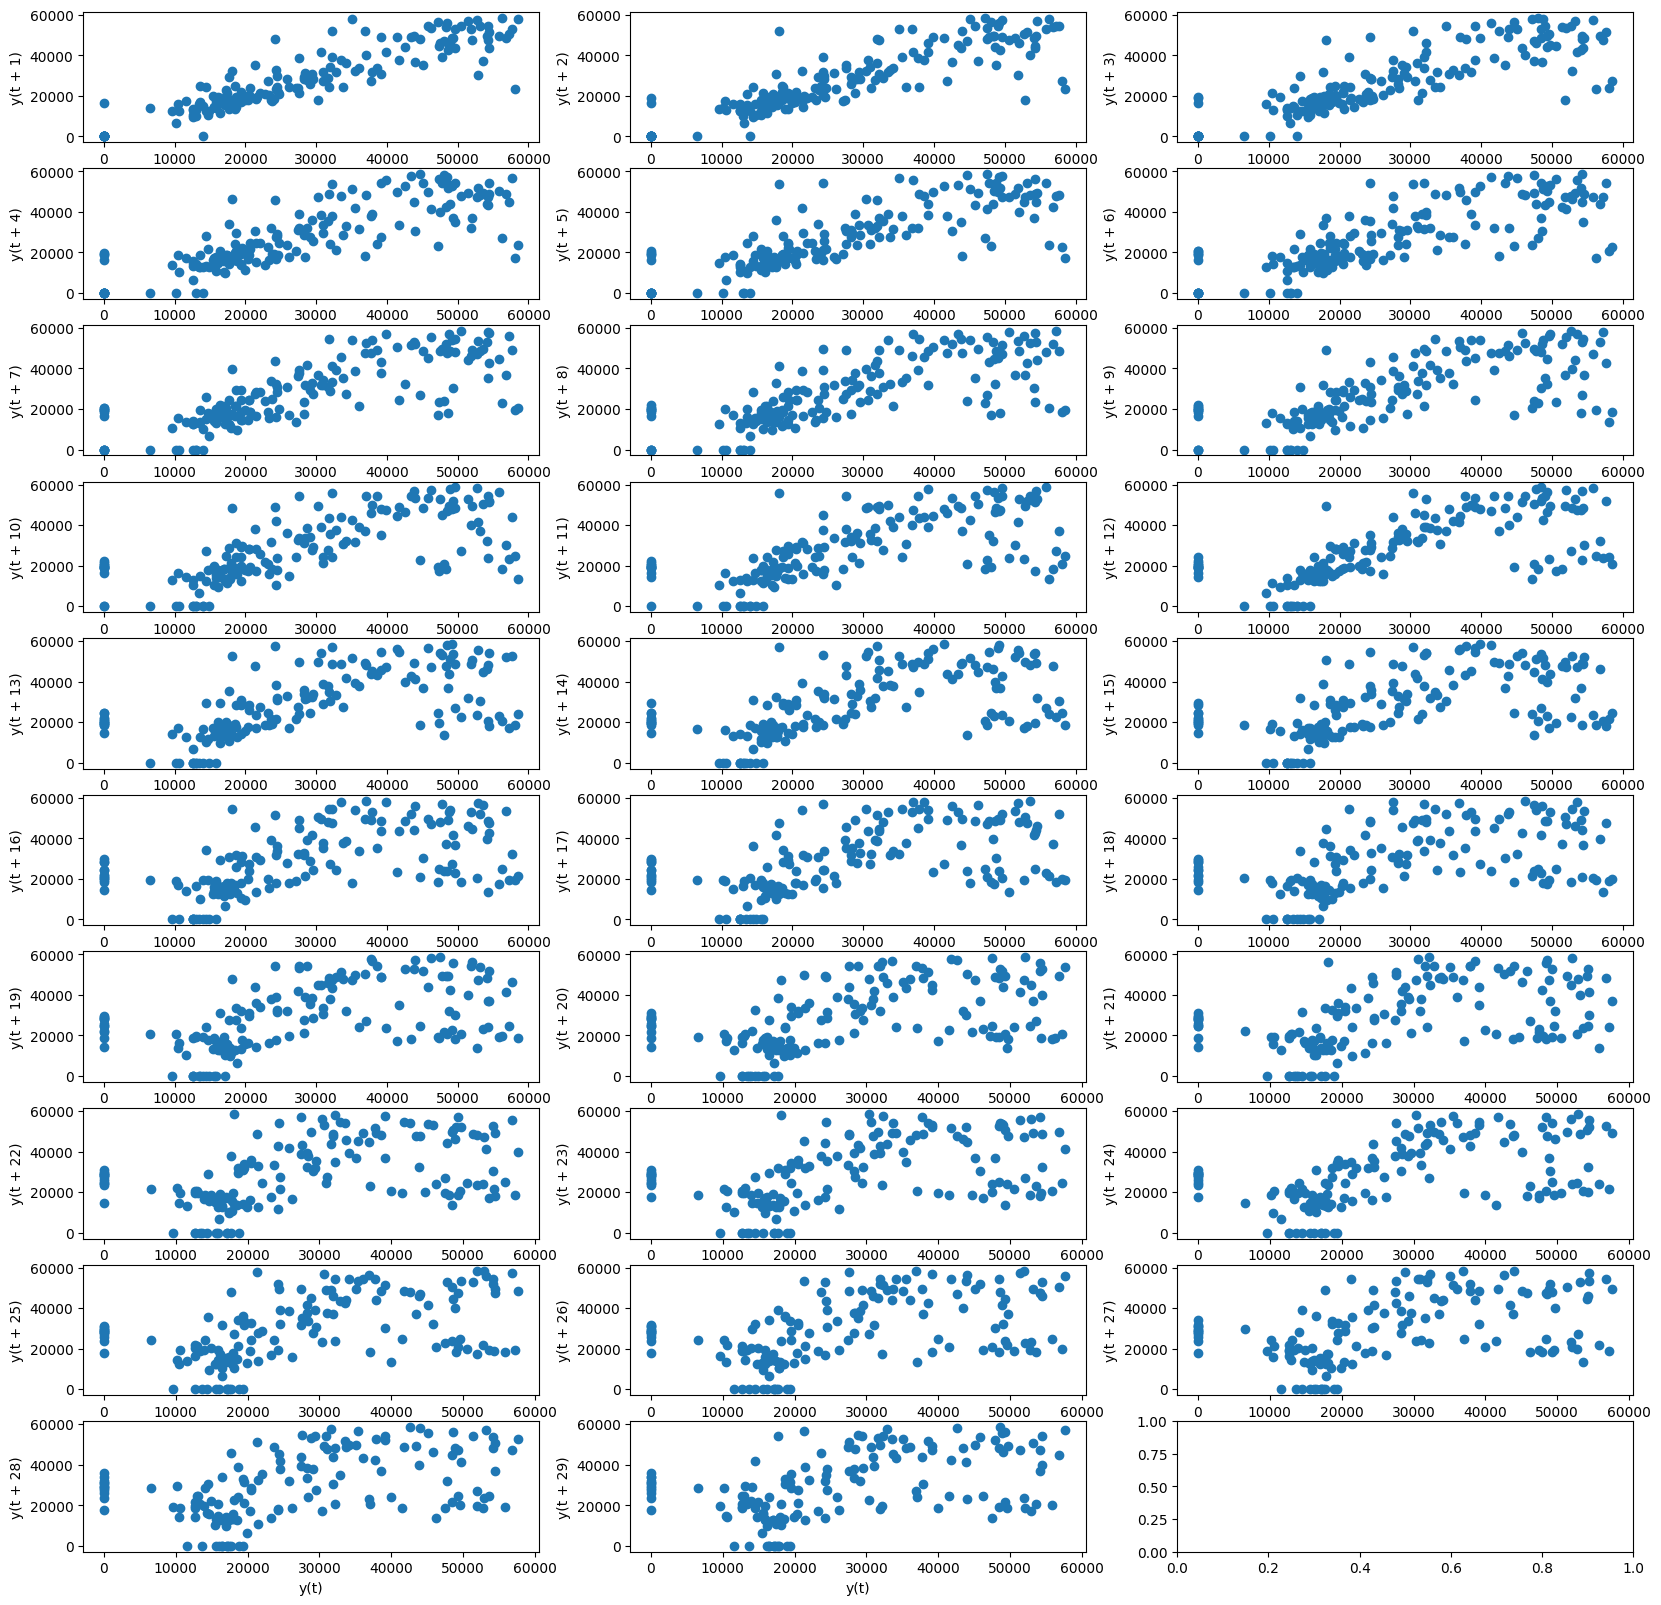

In [302]:
plot_pd_lag_plots(df, "noveHlasenaAUvolnenaVPM", max_lag=30, lag_step=1)

<Figure size 100000x12000 with 0 Axes>

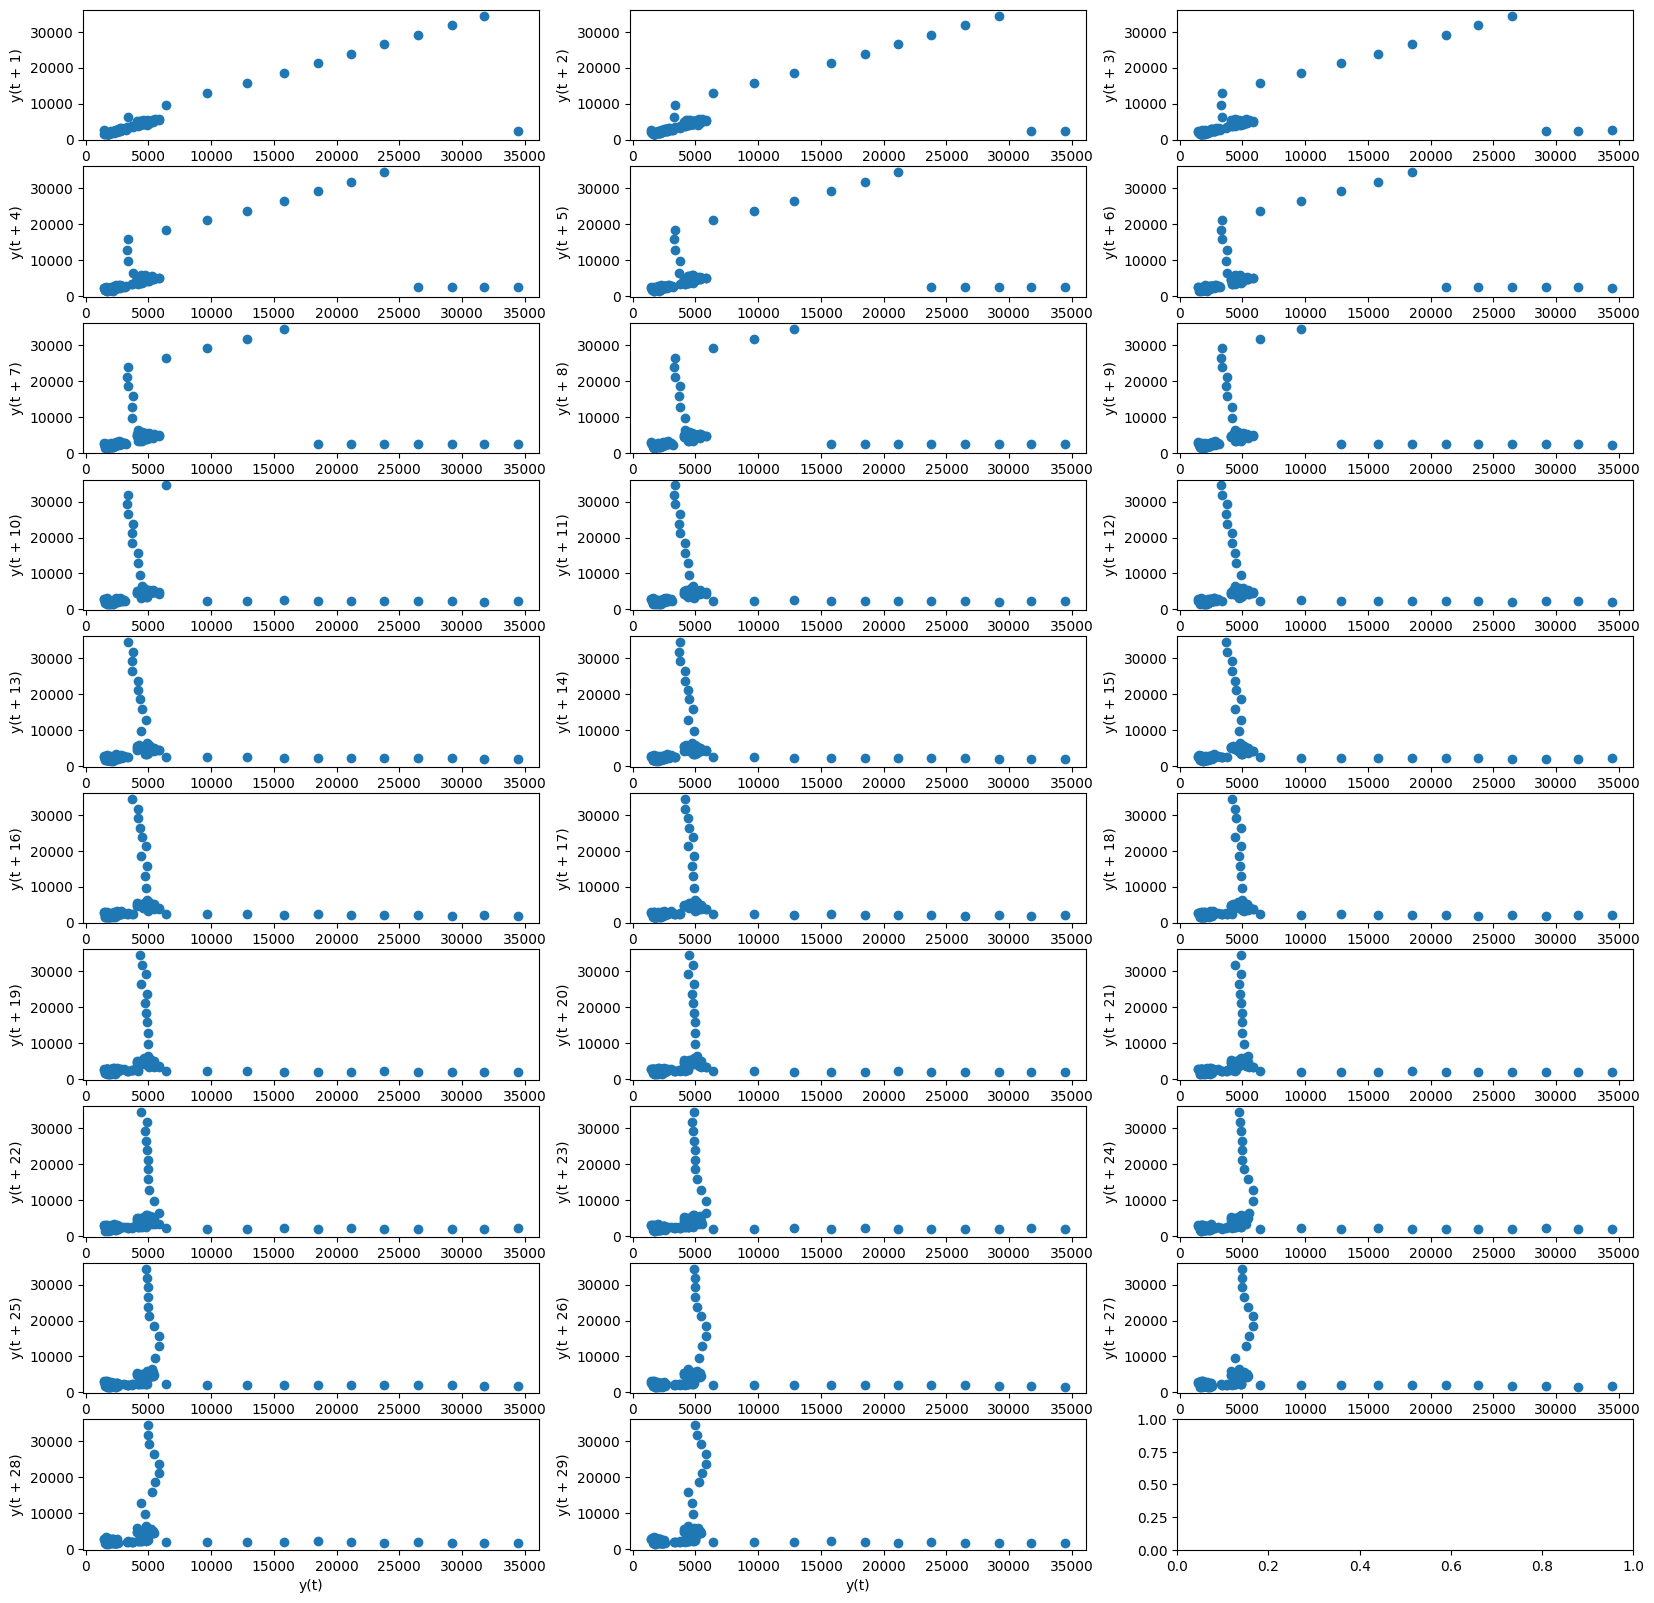

In [303]:
plot_pd_lag_plots(df, "break_in_thefts", max_lag=30, lag_step=1)

<Figure size 100000x12000 with 0 Axes>

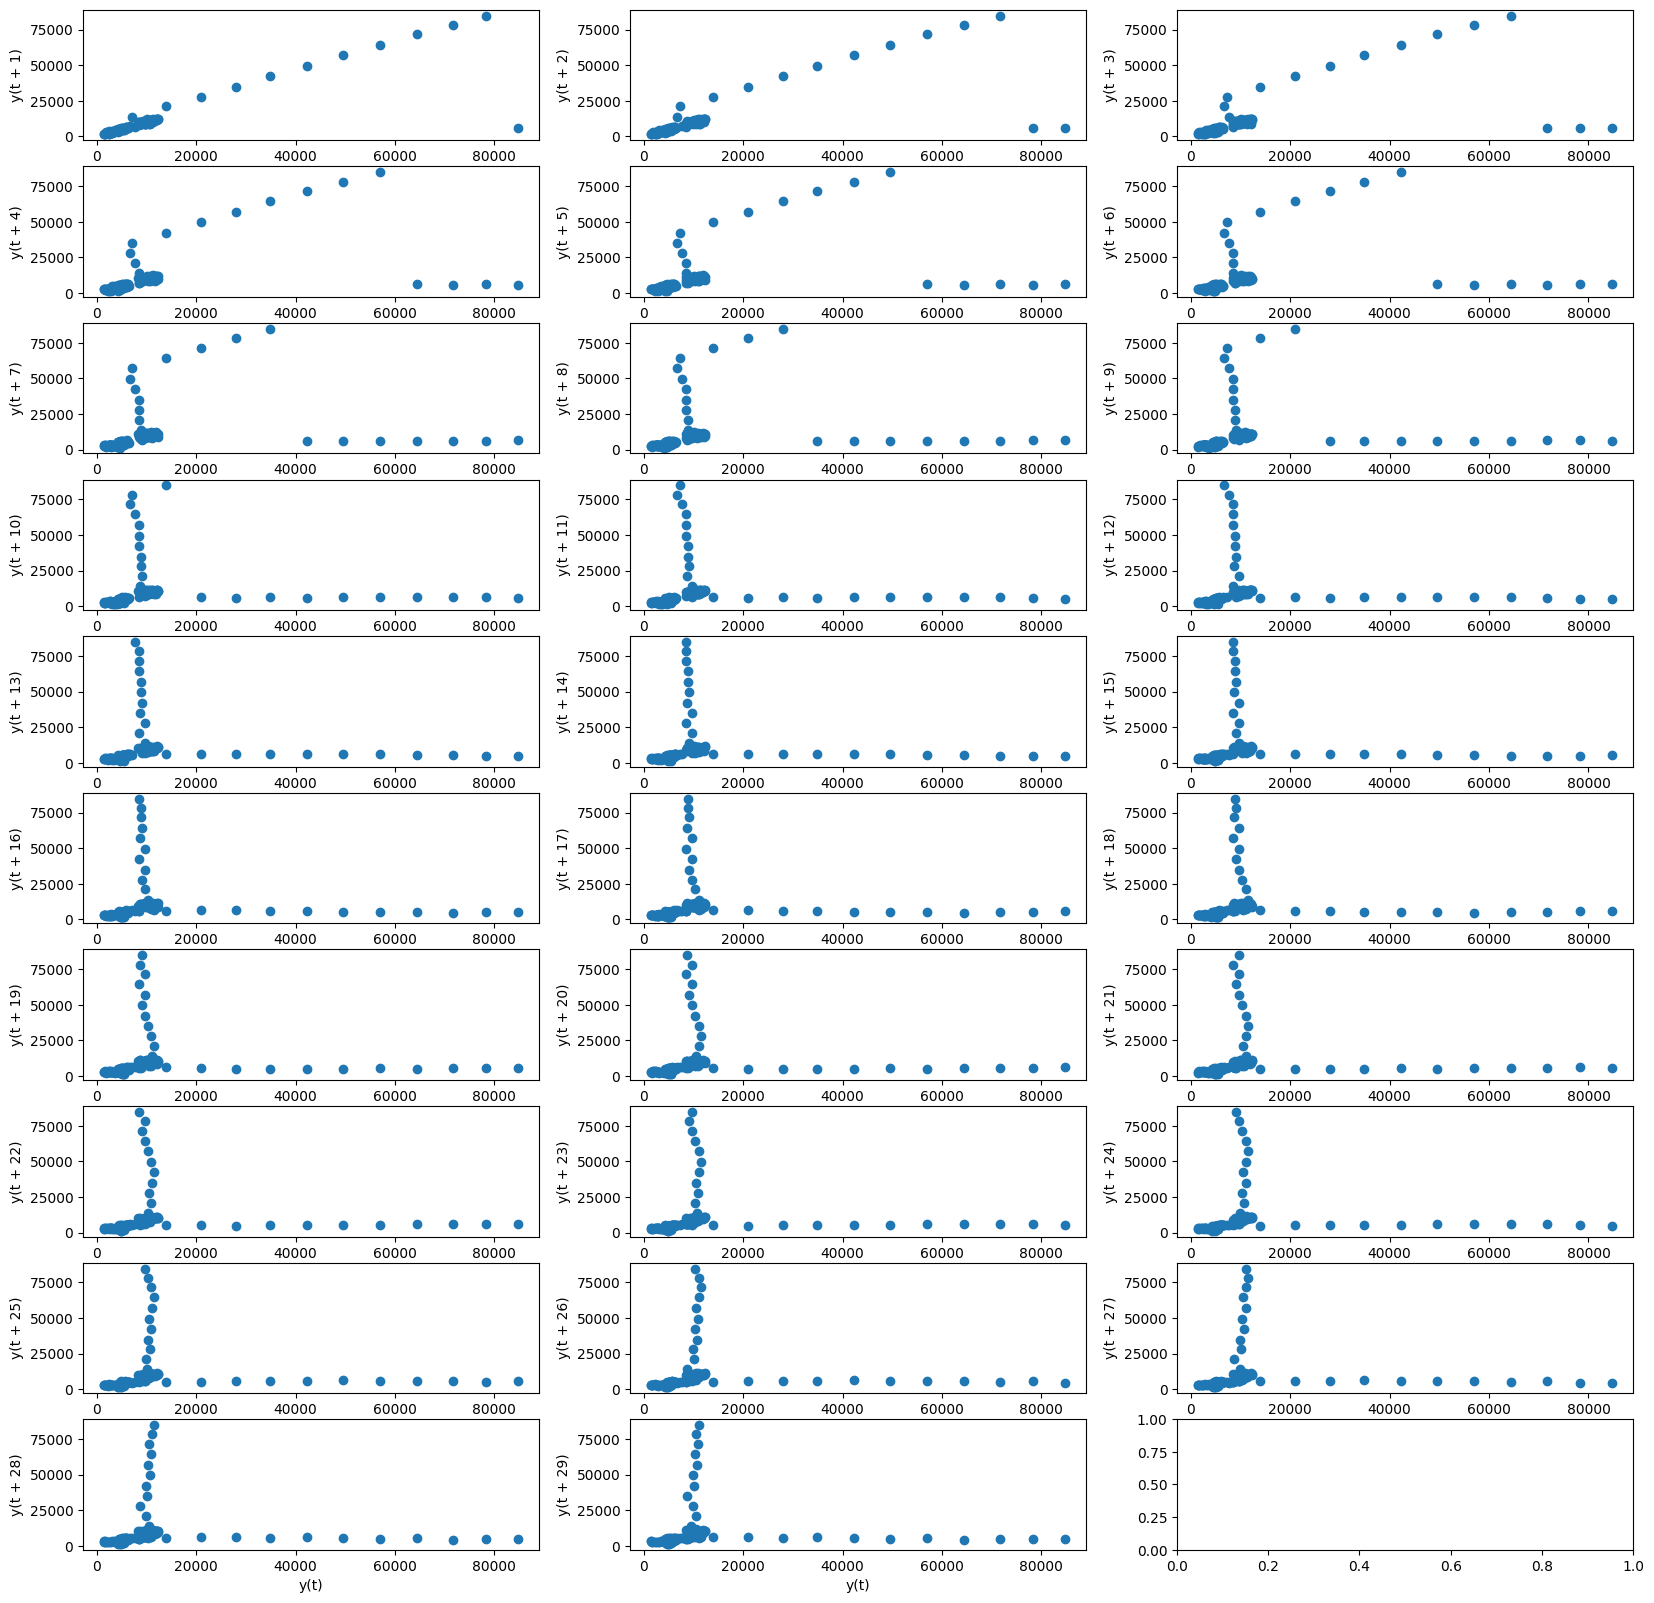

In [304]:
plot_pd_lag_plots(df, "general_thefts", max_lag=30, lag_step=1)

<Axes: xlabel='date'>

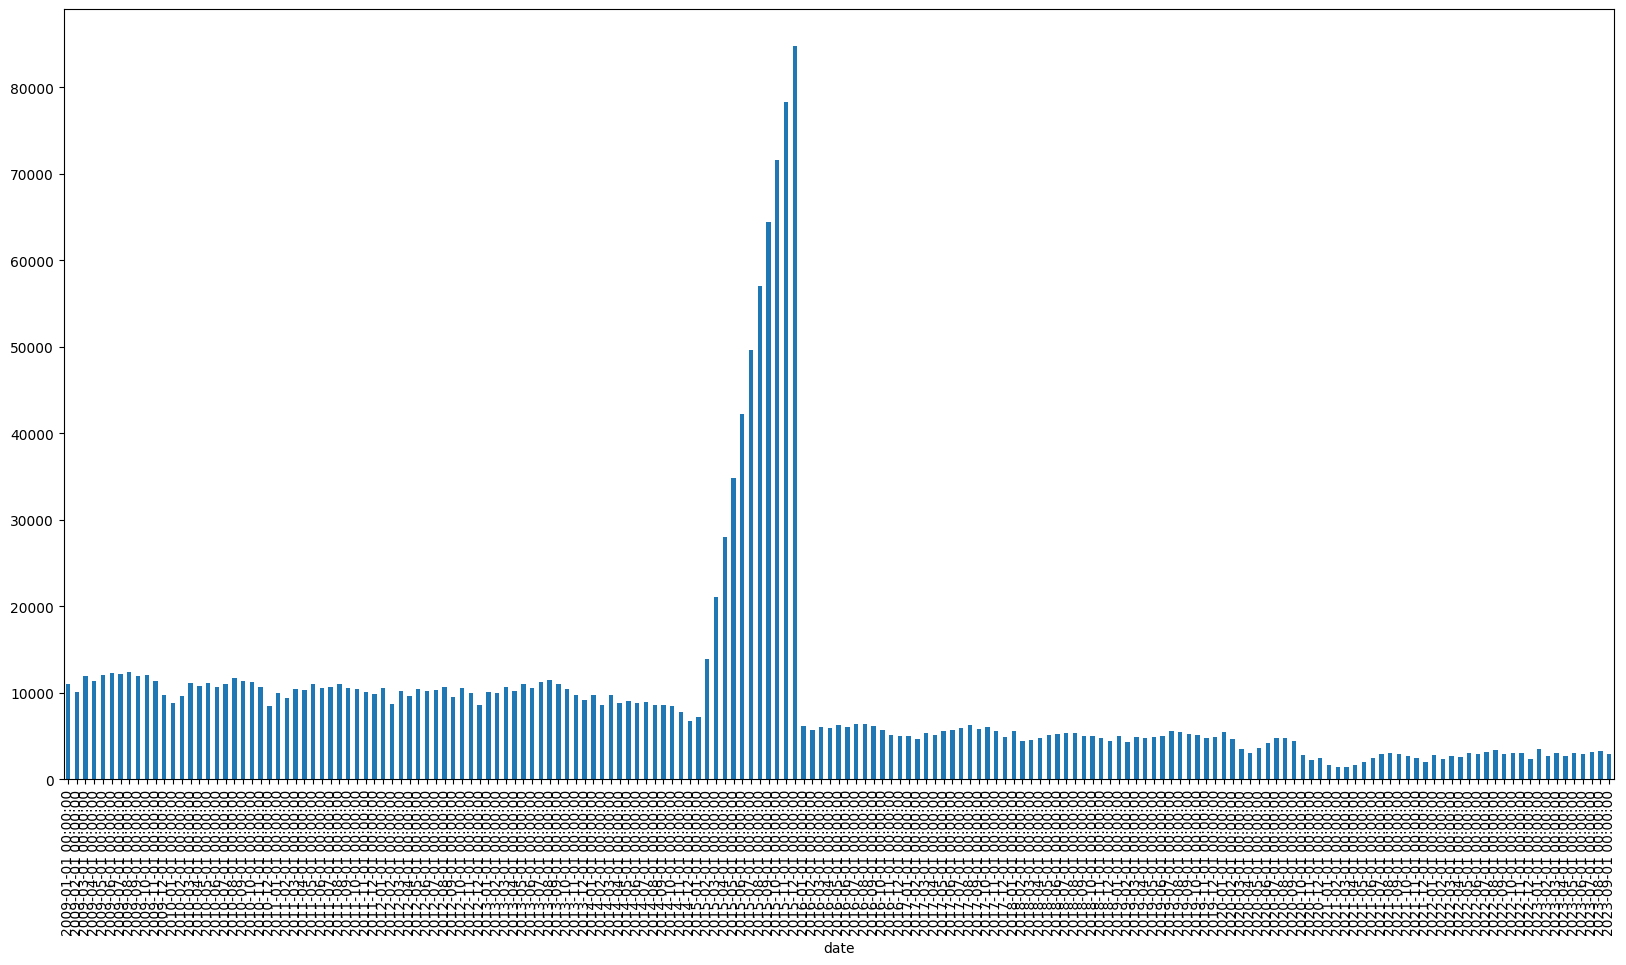

In [309]:
df.general_thefts.plot(kind="bar", figsize=(20,10))